# Rainfall Weather Forecasting

## Project Description

Weather forecasting is the application of science and technology to predict the conditions of the atmosphere for a given location and time. Weather forecasts are made by collecting quantitative data about the current state of the atmosphere at a given place and using meteorology to project how the atmosphere will change.

Rain Dataset is to predict whether or not it will rain tomorrow. The Dataset contains about 10 years of daily weather observations of different locations in Australia. Here, predict two things:

## 1. Problem Statement: 
    
a) Design a predictive model with the use of machine learning algorithms to forecast whether or not it will rain tomorrow.

b) Design a predictive model with the use of machine learning algorithms to predict how much rainfall could be there.

## Dataset Description:
    
Number of columns: 23

Date  - The date of observation

Location  -The common name of the location of the weather station

MinTemp  -The minimum temperature in degrees celsius

MaxTemp -The maximum temperature in degrees celsius

Rainfall  -The amount of rainfall recorded for the day in mm

Evaporation  -The so-called Class A pan evaporation (mm) in the 24 hours to 9am

Sunshine  -The number of hours of bright sunshine in the day

WindGustDi r- The direction of the strongest wind gust in the 24 hours to midnight

WindGustSpeed -The speed (km/h) of the strongest wind gust in the 24 hours to midnight

WindDir9am -Direction of the wind at 9am

WindDir3pm -Direction of the wind at 3pm

WindSpeed9am -Wind speed (km/hr) averaged over 10 minutes prior to 9am

WindSpeed3pm -Wind speed (km/hr) averaged over 10 minutes prior to 3pm

Humidity9am -Humidity (percent) at 9am

Humidity3pm -Humidity (percent) at 3pm

Pressure9am -Atmospheric pressure (hpa) reduced to mean sea level at 9am

Pressure3pm -Atmospheric pressure (hpa) reduced to mean sea level at 3pm

Cloud9am - Fraction of sky obscured by cloud at 9am

Cloud3pm -Fraction of sky obscured by cloud

Temp9am-Temperature (degrees C) at 9am

Temp3pm -Temperature (degrees C) at 3pm

RainToday -Boolean: 1 if precipitation (mm) in the 24 hours to 9am exceeds 1mm, otherwise 0
    
RainTomorrow -The amount of next day rain in mm. Used to create response variable . A kind of measure of the "risk"

In [235]:
# Importing required libraries

import pandas as pd
import numpy as np
import sklearn
from sklearn import preprocessing

import matplotlib.pyplot as plt
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

In [236]:
# Importing the dataset

weather = pd.read_csv('weatherAUS.csv',skipinitialspace=True)
weather.head(3)

Date Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
0  2008-12-01   Albury     13.4     22.9       0.6          NaN       NaN   
1  2008-12-02   Albury      7.4     25.1       0.0          NaN       NaN   
2  2008-12-03   Albury     12.9     25.7       0.0          NaN       NaN   

  WindGustDir  WindGustSpeed WindDir9am  ... Humidity9am  Humidity3pm  \
0           W           44.0          W  ...        71.0         22.0   
1         WNW           44.0        NNW  ...        44.0         25.0   
2         WSW           46.0          W  ...        38.0         30.0   

   Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
0       1007.7       1007.1       8.0       NaN     16.9     21.8         No   
1       1010.6       1007.8       NaN       NaN     17.2     24.3         No   
2       1007.6       1008.7       NaN       2.0     21.0     23.2         No   

   RainTomorrow  
0            No  
1            No  
2            No  

[3 rows x 23 columns]

# Exploratory Data Analysis (EDA)

## Data Preprocessing

In [237]:
# Checking the dimension of the dataset

weather.shape

(8425, 23)

In [238]:
# Checking the features present in the dataset

weather.columns

Index(['Date', 'Location', 'MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation',
       'Sunshine', 'WindGustDir', 'WindGustSpeed', 'WindDir9am', 'WindDir3pm',
       'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm',
       'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am',
       'Temp3pm', 'RainToday', 'RainTomorrow'],
      dtype='object')

In [239]:
# Checking the information about the dataset

weather.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8425 entries, 0 to 8424
Data columns (total 23 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Date           8425 non-null   object 
 1   Location       8425 non-null   object 
 2   MinTemp        8350 non-null   float64
 3   MaxTemp        8365 non-null   float64
 4   Rainfall       8185 non-null   float64
 5   Evaporation    4913 non-null   float64
 6   Sunshine       4431 non-null   float64
 7   WindGustDir    7434 non-null   object 
 8   WindGustSpeed  7434 non-null   float64
 9   WindDir9am     7596 non-null   object 
 10  WindDir3pm     8117 non-null   object 
 11  WindSpeed9am   8349 non-null   float64
 12  WindSpeed3pm   8318 non-null   float64
 13  Humidity9am    8366 non-null   float64
 14  Humidity3pm    8323 non-null   float64
 15  Pressure9am    7116 non-null   float64
 16  Pressure3pm    7113 non-null   float64
 17  Cloud9am       6004 non-null   float64
 18  Cloud3pm

In [240]:
# Checking for any duplicate rows present in the dataset

dup = weather[weather.duplicated()]
dup.shape

(1663, 23)

In [241]:
# Removing duplicate rows from the dataset

weather = weather.drop_duplicates()
weather.shape

(6762, 23)

In [242]:
# Checking for null values

weather.isnull().sum()

Date                0
Location            0
MinTemp            70
MaxTemp            57
Rainfall          138
Evaporation      2921
Sunshine         3236
WindGustDir       942
WindGustSpeed     942
WindDir9am        794
WindDir3pm        294
WindSpeed9am       63
WindSpeed3pm      100
Humidity9am        54
Humidity3pm        96
Pressure9am      1308
Pressure3pm      1311
Cloud9am         1866
Cloud3pm         1902
Temp9am            51
Temp3pm            92
RainToday         138
RainTomorrow      138
dtype: int64

In [243]:
# Checking the null/missing ratio of the dataset

rain = (weather.isnull().sum()/len(weather)*100).sort_values(ascending=False)
rain

Sunshine         47.855664
Evaporation      43.197279
Cloud3pm         28.127773
Cloud9am         27.595386
Pressure3pm      19.387755
Pressure9am      19.343390
WindGustDir      13.930790
WindGustSpeed    13.930790
WindDir9am       11.742088
WindDir3pm        4.347826
Rainfall          2.040816
RainToday         2.040816
RainTomorrow      2.040816
WindSpeed3pm      1.478852
Humidity3pm       1.419698
Temp3pm           1.360544
MinTemp           1.035197
WindSpeed9am      0.931677
MaxTemp           0.842946
Humidity9am       0.798580
Temp9am           0.754215
Location          0.000000
Date              0.000000
dtype: float64

In [244]:
# Checking the unique values present in the dataset

weather.nunique()

Date             3004
Location           12
MinTemp           285
MaxTemp           331
Rainfall          250
Evaporation       116
Sunshine          140
WindGustDir        16
WindGustSpeed      52
WindDir9am         16
WindDir3pm         16
WindSpeed9am       34
WindSpeed3pm       35
Humidity9am        90
Humidity3pm        94
Pressure9am       384
Pressure3pm       374
Cloud9am            9
Cloud3pm            9
Temp9am           304
Temp3pm           328
RainToday           2
RainTomorrow        2
dtype: int64

In [245]:
# Checking the count of values present in features to check any unknown value present in the dataset

for i in weather.columns:
        print(weather[i].value_counts())
        print('****************************')

2011-02-11    4
2011-02-18    4
2011-03-18    4
2011-03-19    4
2011-03-20    4
2011-03-21    4
2011-03-22    4
2011-03-23    4
2011-03-24    4
2011-03-25    4
2011-03-26    4
2011-03-27    4
2011-03-28    4
2011-03-29    4
2011-03-30    4
2011-03-31    4
2011-05-01    4
2011-05-02    4
2011-05-03    4
2011-05-04    4
2011-05-05    4
2011-05-06    4
2011-05-07    4
2011-05-08    4
2011-05-09    4
2011-03-17    4
2011-03-16    4
2011-03-15    4
2011-03-02    4
2011-02-20    4
2011-02-21    4
2011-02-22    4
2011-02-23    4
2011-02-24    4
2011-02-25    4
2011-02-26    4
2011-02-27    4
2011-02-28    4
2011-03-01    4
2011-03-03    4
2011-03-14    4
2011-03-04    4
2011-03-05    4
2011-03-06    4
2011-03-07    4
2011-03-08    4
2011-03-09    4
2011-03-10    4
2011-03-11    4
2011-03-12    4
2011-03-13    4
2011-05-10    4
2011-05-11    4
2011-05-12    4
2011-06-20    4
2011-06-10    4
2011-06-11    4
2011-06-12    4
2011-06-13    4
2011-06-14    4
2011-06-15    4
2011-06-16    4
2011-06-

In [246]:
# Splitting the Date column to 'Year', 'Month' and 'Day'

weather['Year'] = pd.DatetimeIndex(weather['Date']).year
weather['Month'] = pd.DatetimeIndex(weather['Date']).month
weather['Day'] = pd.DatetimeIndex(weather['Date']).day

In [247]:
# Dropping the column 'Date'

weather.drop(['Date'],axis=1,inplace = True)

In [248]:
# Dropping the column 'Day'

weather.drop(['Day'],axis=1,inplace = True)

In [249]:
weather.shape

(6762, 24)

In [250]:
# Splitting Categorical and Numerical Columns

weather_cat=[]

for i in weather.columns:
    if weather[i].dtypes == 'object':
        weather_cat.append(i)
         
weather_num=[]

for i in weather.columns:
    if weather[i].dtypes != 'object':
        weather_num.append(i)
    
print('Categorical Features:', weather_cat)
print('Numerical Features:', weather_num)

Categorical Features: ['Location', 'WindGustDir', 'WindDir9am', 'WindDir3pm', 'RainToday', 'RainTomorrow']
Numerical Features: ['MinTemp', 'MaxTemp', 'Rainfall', 'Evaporation', 'Sunshine', 'WindGustSpeed', 'WindSpeed9am', 'WindSpeed3pm', 'Humidity9am', 'Humidity3pm', 'Pressure9am', 'Pressure3pm', 'Cloud9am', 'Cloud3pm', 'Temp9am', 'Temp3pm', 'Year', 'Month']


### Observations

Imported required libraries and dataset

Dataset contains 8425 rows and 23 columns 

Data types present in the dataset are float64 – 16 and object – 7

Null values are present in the dataset, listing the features with missing values in descending order Sunshine, Evaporation, Cloud3pm, Cloud9am, Pressure3pm, Pressure9am, WindGustDir, WindGustSpeed, WindDir9am, WindDir3pm, Rainfall, RainToday, RainTomorrow, WindSpeed3pm, Humidity3pm, Temp3pm, MinTemp, WindSpeed9am, MaxTemp, Humidity9am and Temp9am

1663 Duplicate rows are present in the dataset, which has been dropped 

Analysed each feature and verified there are no unknown values in the dataset apart from null values

Splitted the feature 'Date' into 'Year', 'Month' and 'Day'

Dropped duplicate rows and Date column, also dropped column Day as we have the required deatils in year and month, dropping 
these features  will improve the performance of the Model

Splitted the dataset into Categorical and Numerical features

Replacing null values will be done after Data Visualization with actual data

Rainfall and RainTomorrow are the two target variable

Regression machine learning algorithms will be used to build and predict Rainfall

Classification machine learning algorithms will be used to build and predict RainTomorrow

## Data Visualization

<AxesSubplot:>

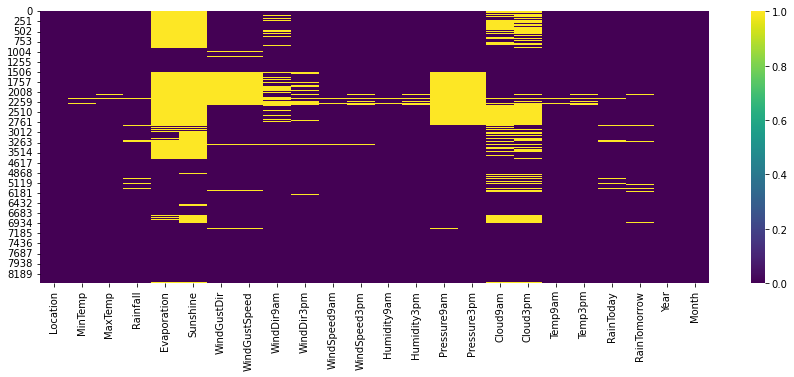

In [251]:
# Visualizing null values in heatmap

plt.figure(figsize=(15,5))
sns.heatmap(weather.isnull(),cmap='viridis')

### Observations

Above heatmap shows null values present in the dataset

## Univariate Analysis

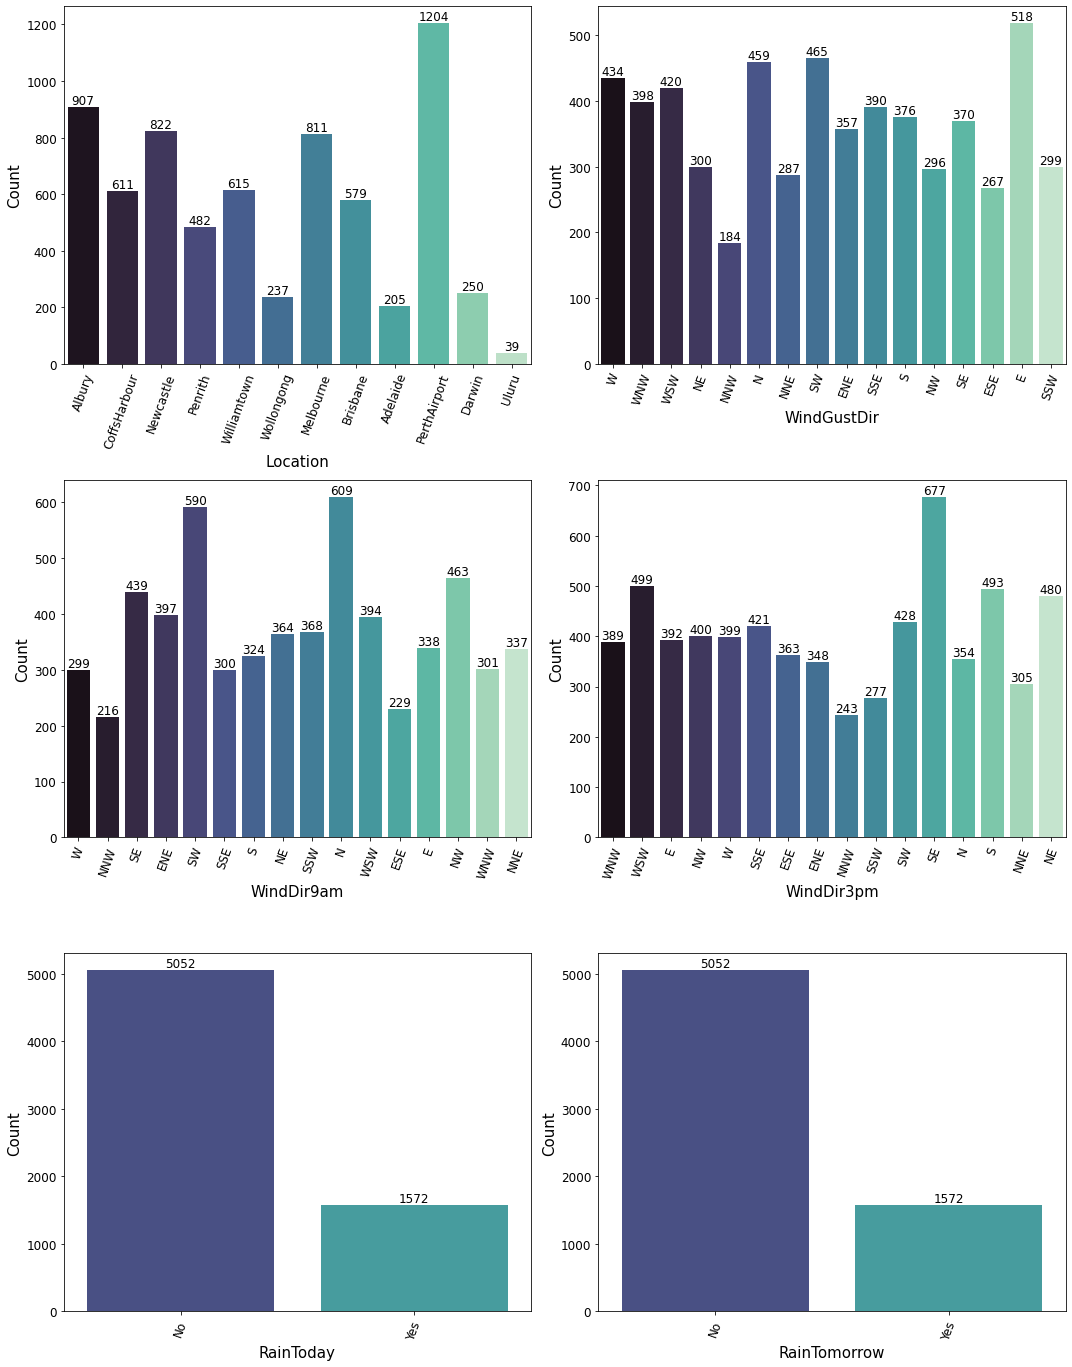

In [252]:
# Visualizing the Categorical columns with countplot

plt.figure(figsize=(15,25))
plot_cat = 1

for i in weather_cat:
    if plot_cat <=7:
        st = plt.subplot(4,2,plot_cat)
        sns.countplot(weather[i], palette='mako')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Count',fontsize =15)
        plt.xticks(rotation=70,fontsize=12)
        plt.yticks(fontsize=12)
    plot_cat+=1
    
    for j in st.containers:
        st.bar_label(j,fontsize=12)
        
plt.tight_layout()

### Observations

Perth Airport has documented maximum occurrence of rainfall weather report from 2008 to 2017, followed by Albury, Newcastle and Melbourne

Maximum WindGustDir is recorded towards East, followed by South West - SW and North – N

Wind Direction at 9am is maximum towards North- N and South West – SW

Wind Direction at 3pm is maximum towards South East – SE,   West-Southwest  – WSW and South - S

Most of the occurrence is recorded as No Rainfall for Rain Today and Rain Tomorrow

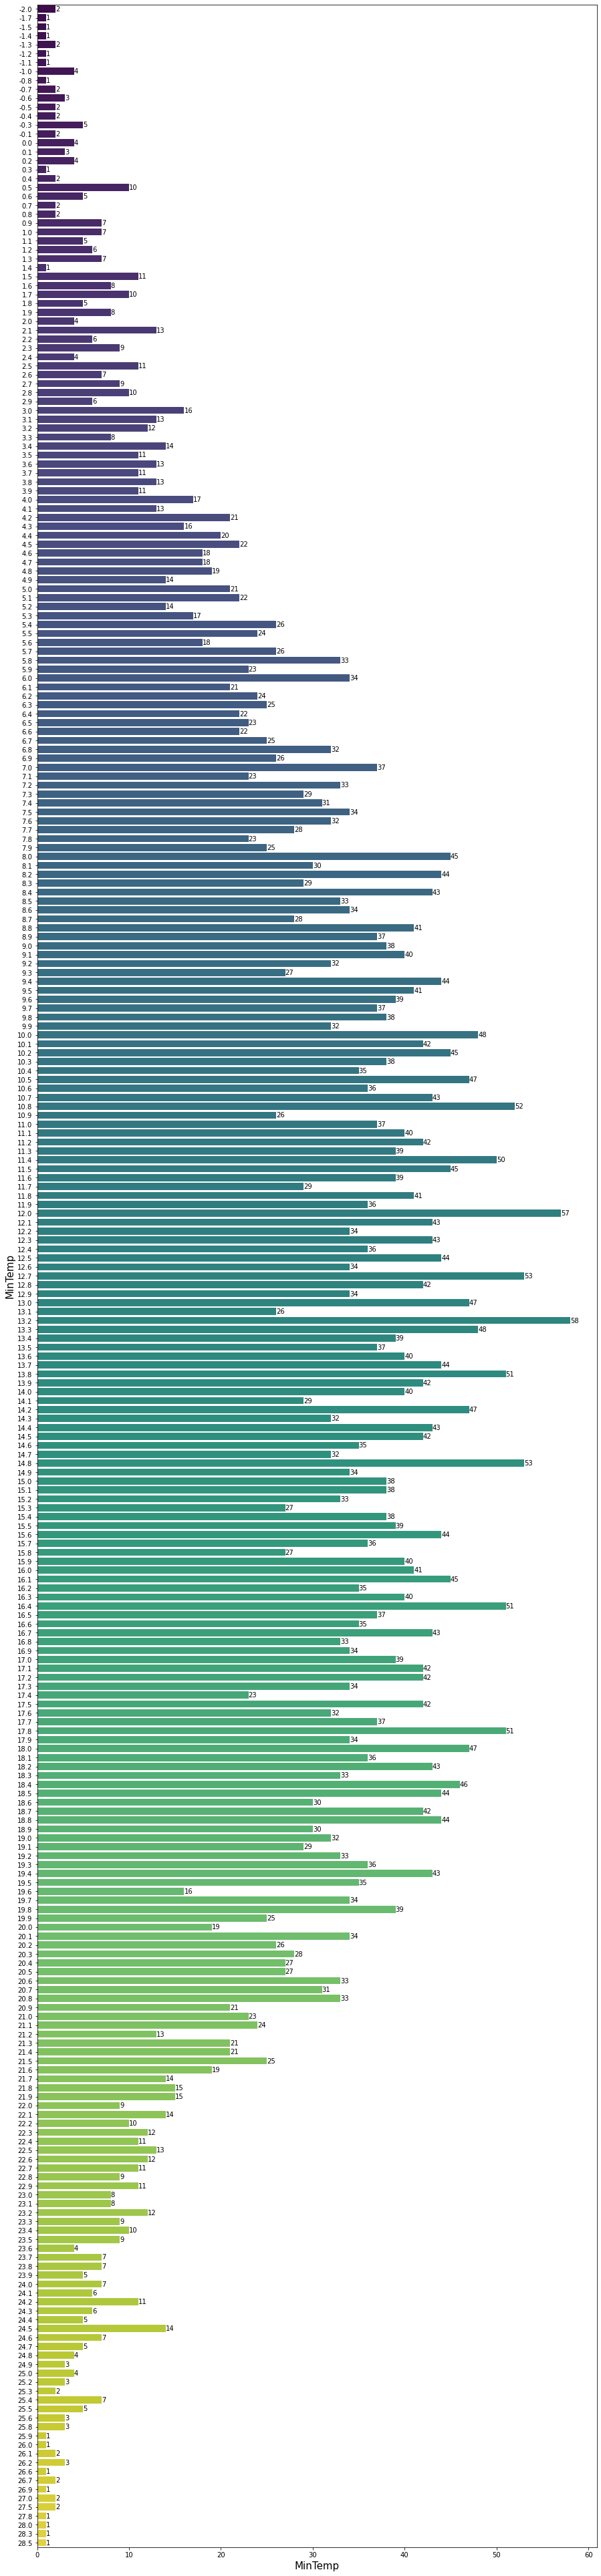

In [253]:
# Visualizing feature 'MinTemp' with countplot

plt.figure(figsize=(15,70))
ab = sns.countplot(y=weather['MinTemp'],palette="viridis")
plt.xlabel('MinTemp',fontsize = 15)
plt.yticks(fontsize=10)
plt.ylabel('MinTemp',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

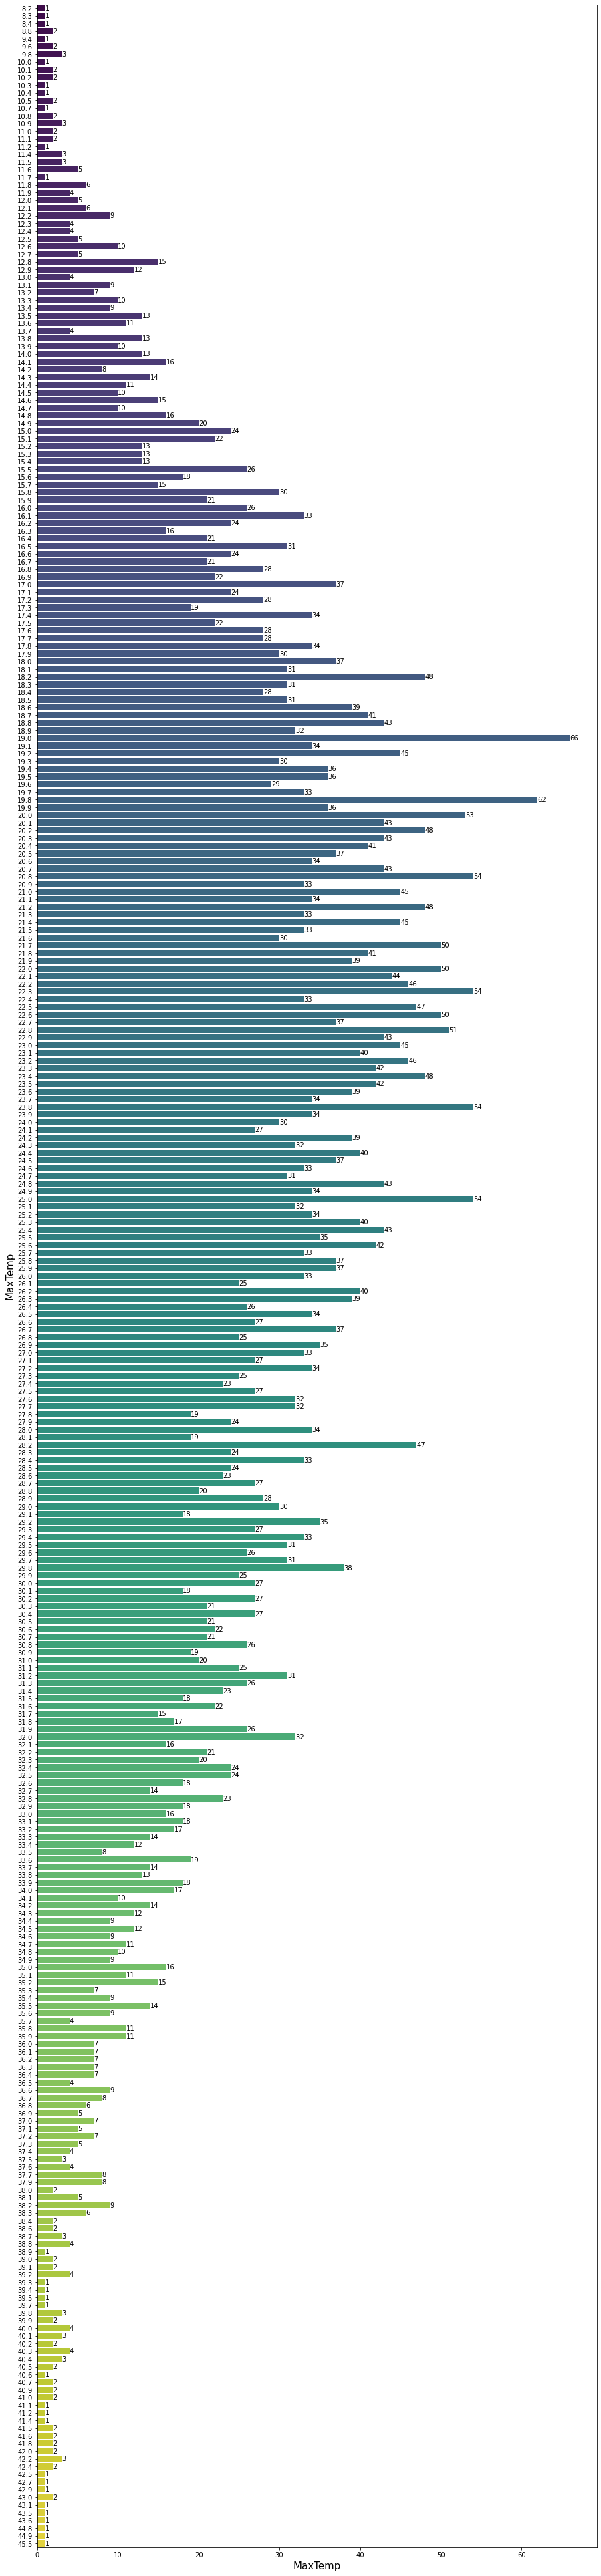

In [254]:
# Visualizing feature 'MaxTemp' with countplot

plt.figure(figsize=(15,70))
ab = sns.countplot(y=weather['MaxTemp'],palette="viridis")
plt.xlabel('MaxTemp',fontsize = 15)
plt.yticks(fontsize=10)
plt.ylabel('MaxTemp',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

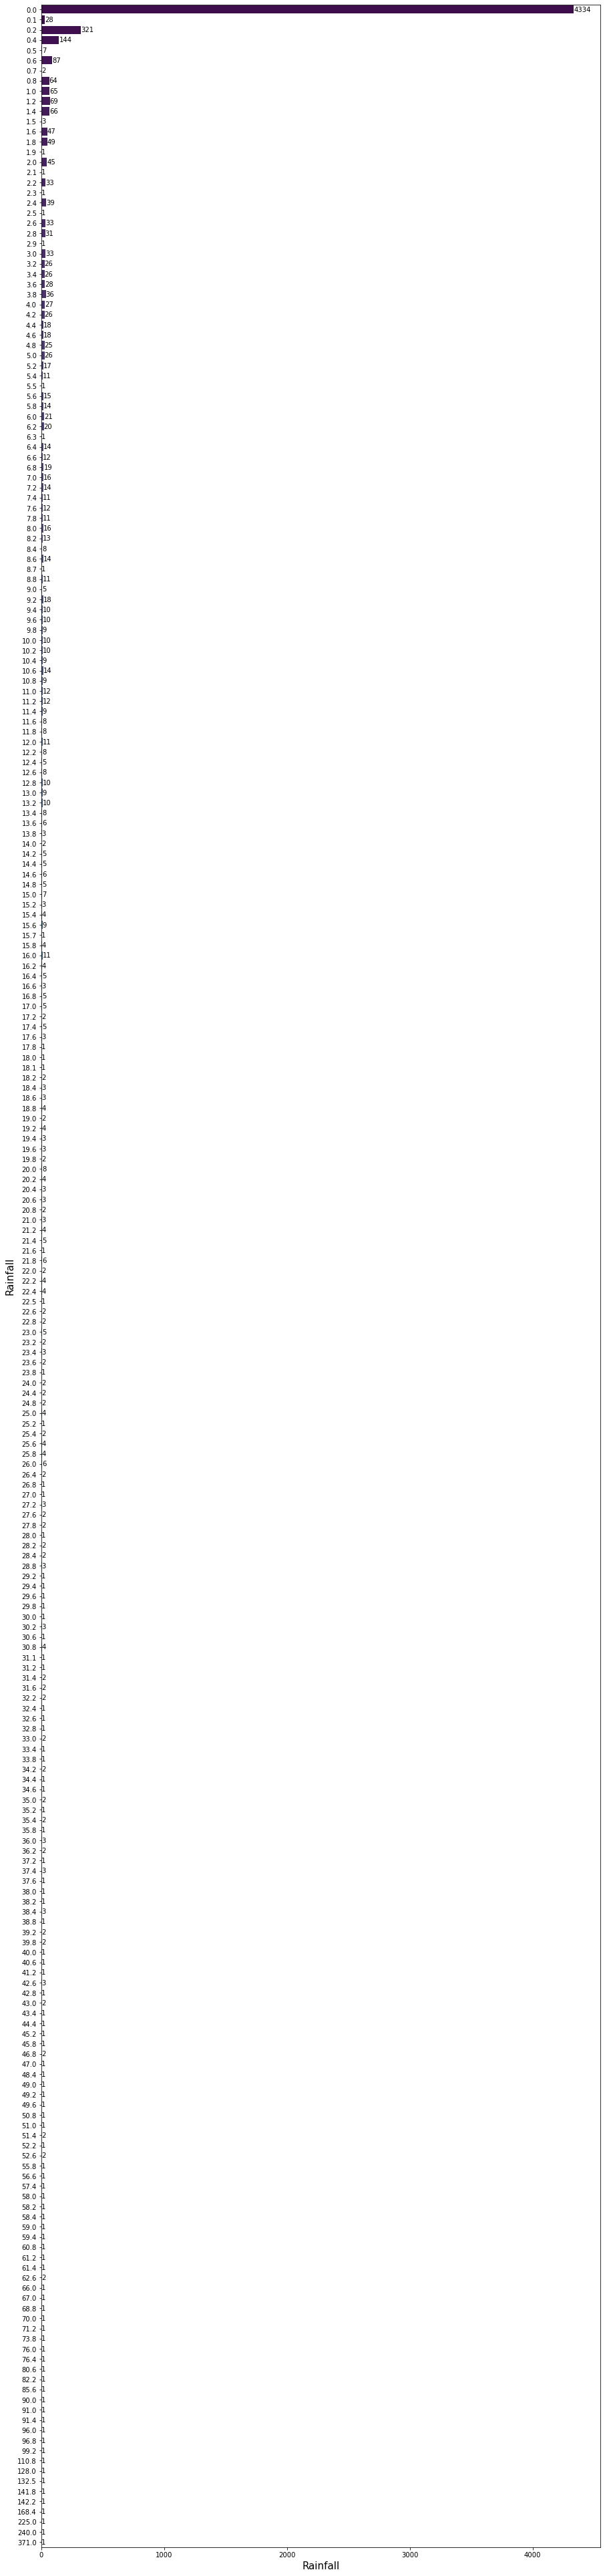

In [255]:
# Visualizing feature 'Rainfall' with countplot

plt.figure(figsize=(15,70))
ab = sns.countplot(y=weather['Rainfall'],palette="viridis")
plt.xlabel('Rainfall',fontsize = 15)
plt.yticks(fontsize=10)
plt.ylabel('Rainfall',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

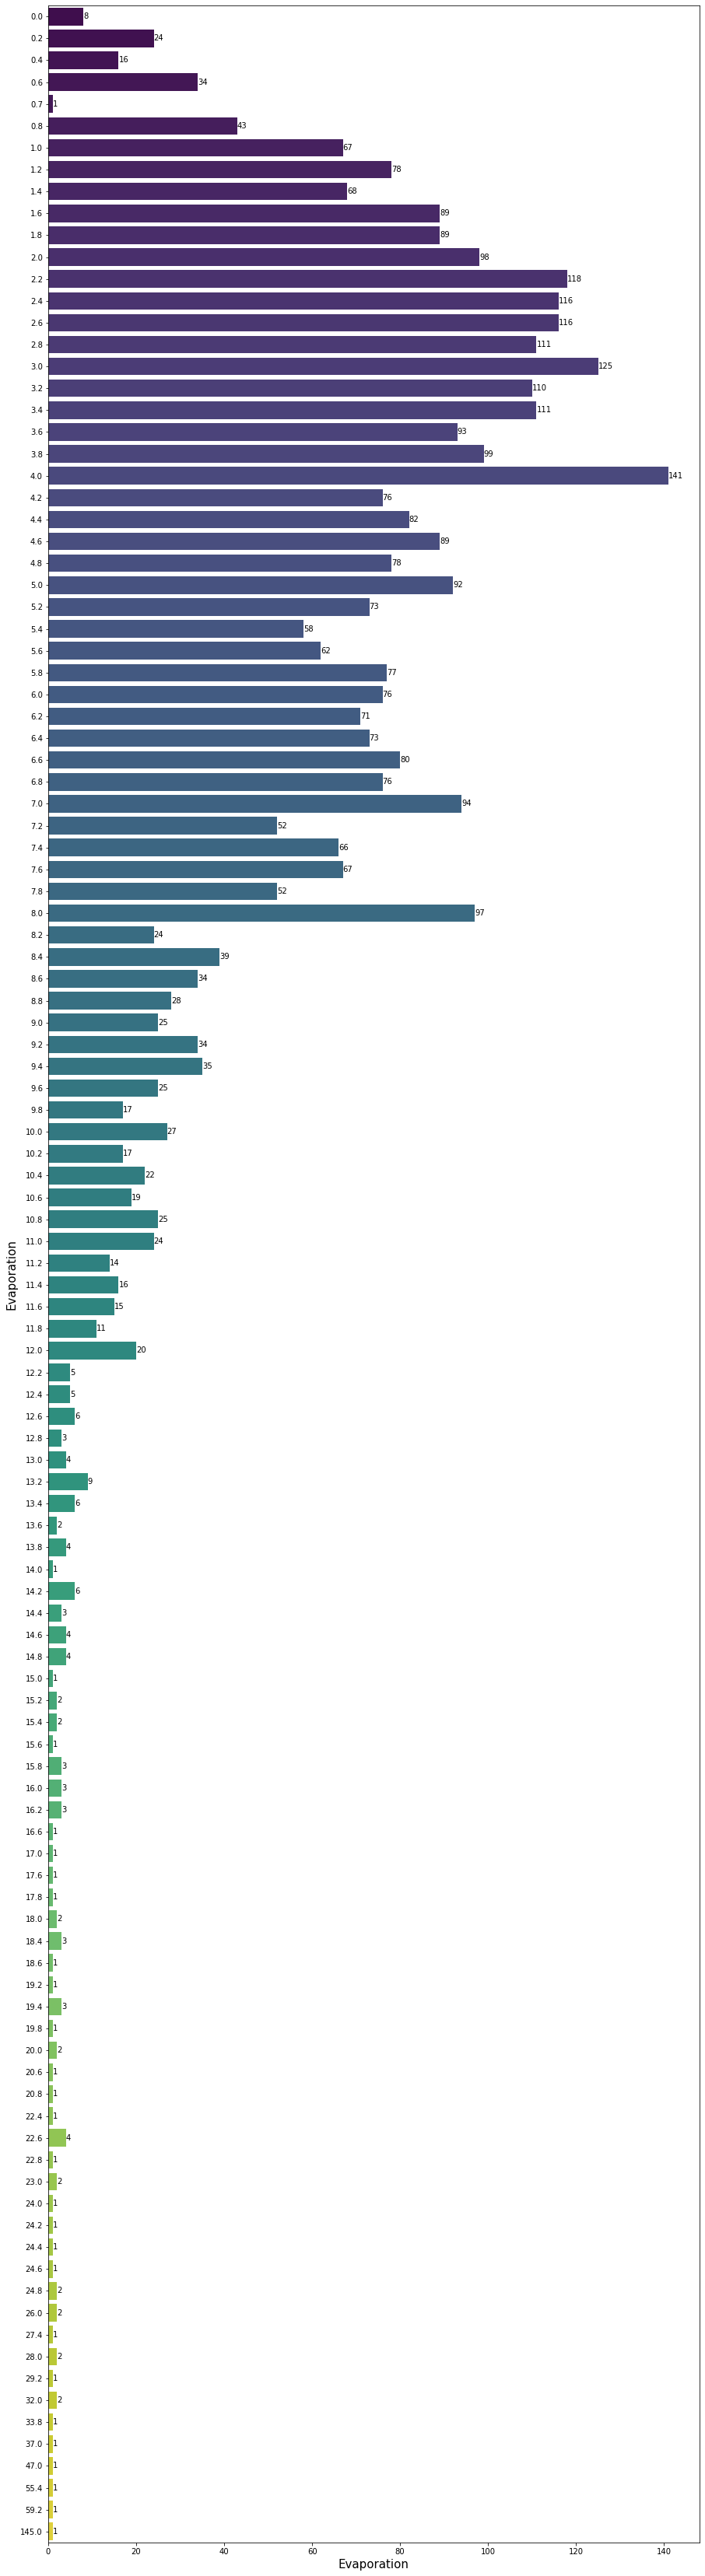

In [256]:
# Visualizing feature 'Evaporation' with countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=weather['Evaporation'],palette="viridis")
plt.xlabel('Evaporation',fontsize = 15)
plt.yticks(fontsize=10)
plt.ylabel('Evaporation',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

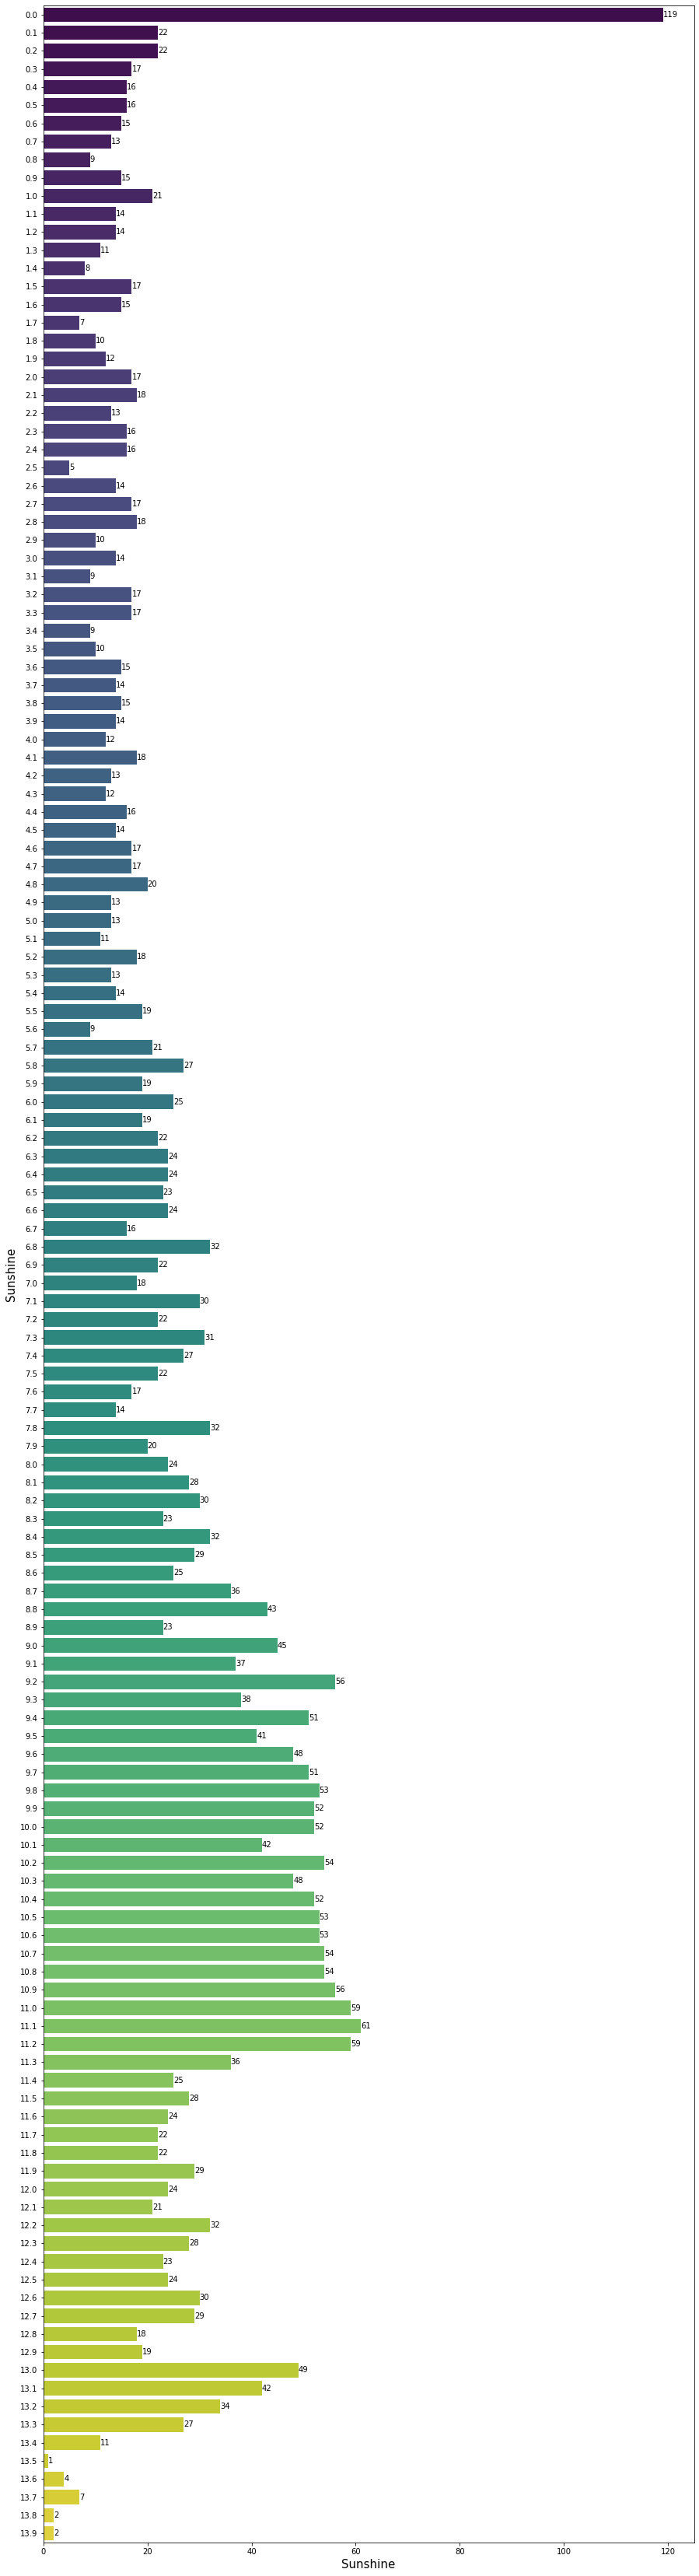

In [257]:
# Visualizing feature 'Sunshine' with countplot

plt.figure(figsize=(15,60))
ab = sns.countplot(y=weather['Sunshine'],palette="viridis")
plt.xlabel('Sunshine',fontsize = 15)
plt.yticks(fontsize=10)
plt.ylabel('Sunshine',fontsize=15)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

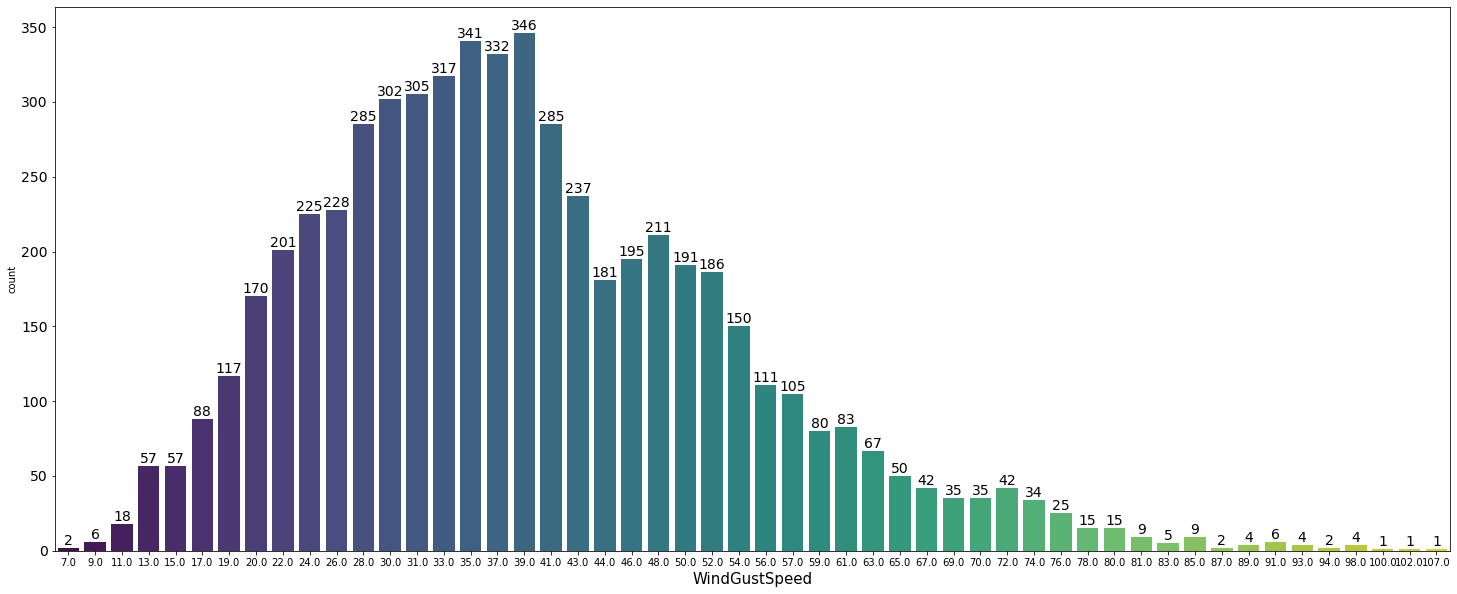

In [258]:
# Visualizing feature 'WindGustSpeed' with countplot

plt.figure(figsize=(25,10))
ab = sns.countplot(x=weather['WindGustSpeed'],palette="viridis")
plt.xlabel('WindGustSpeed',fontsize = 15)
plt.yticks(fontsize=14)

for i in ab.containers:
    ab.bar_label(i,fontsize=14)

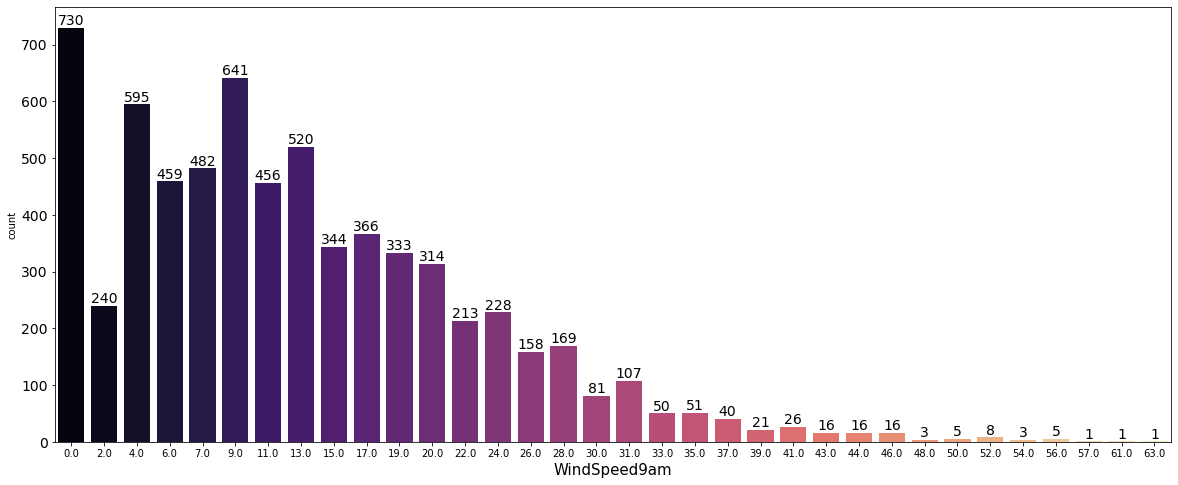

In [259]:
# Visualizing feature 'WindSpeed9am' with countplot

plt.figure(figsize=(20,8))
ab = sns.countplot(x=weather['WindSpeed9am'],palette="magma")
plt.xlabel('WindSpeed9am',fontsize = 15)
plt.yticks(fontsize=14)

for i in ab.containers:
    ab.bar_label(i,fontsize=14)

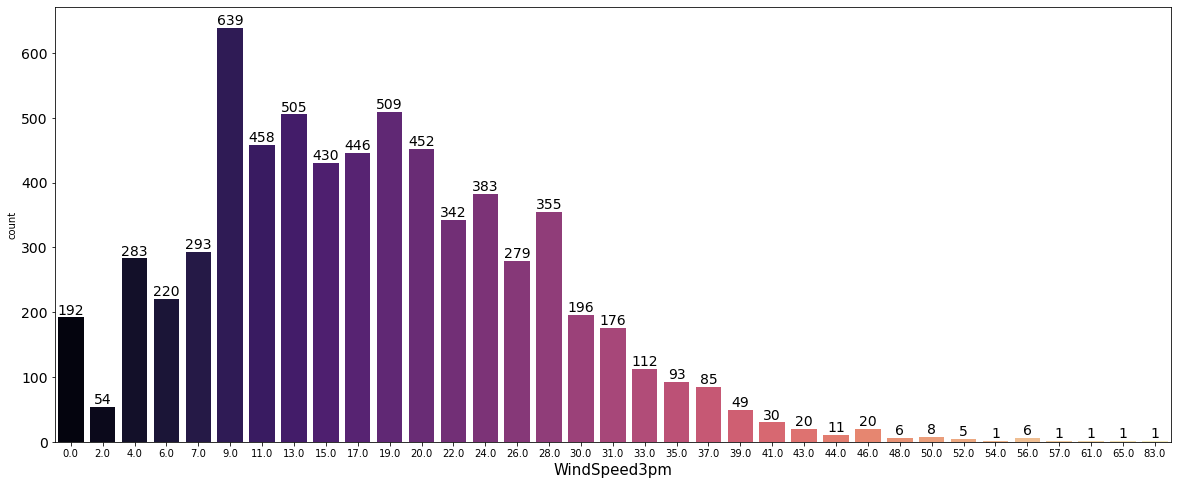

In [260]:
# Visualizing feature 'WindSpeed3pm' with countplot

plt.figure(figsize=(20,8))
ab = sns.countplot(x=weather['WindSpeed3pm'],palette="magma")
plt.xlabel('WindSpeed3pm',fontsize = 15)
plt.yticks(fontsize=14)

for i in ab.containers:
    ab.bar_label(i,fontsize=14)

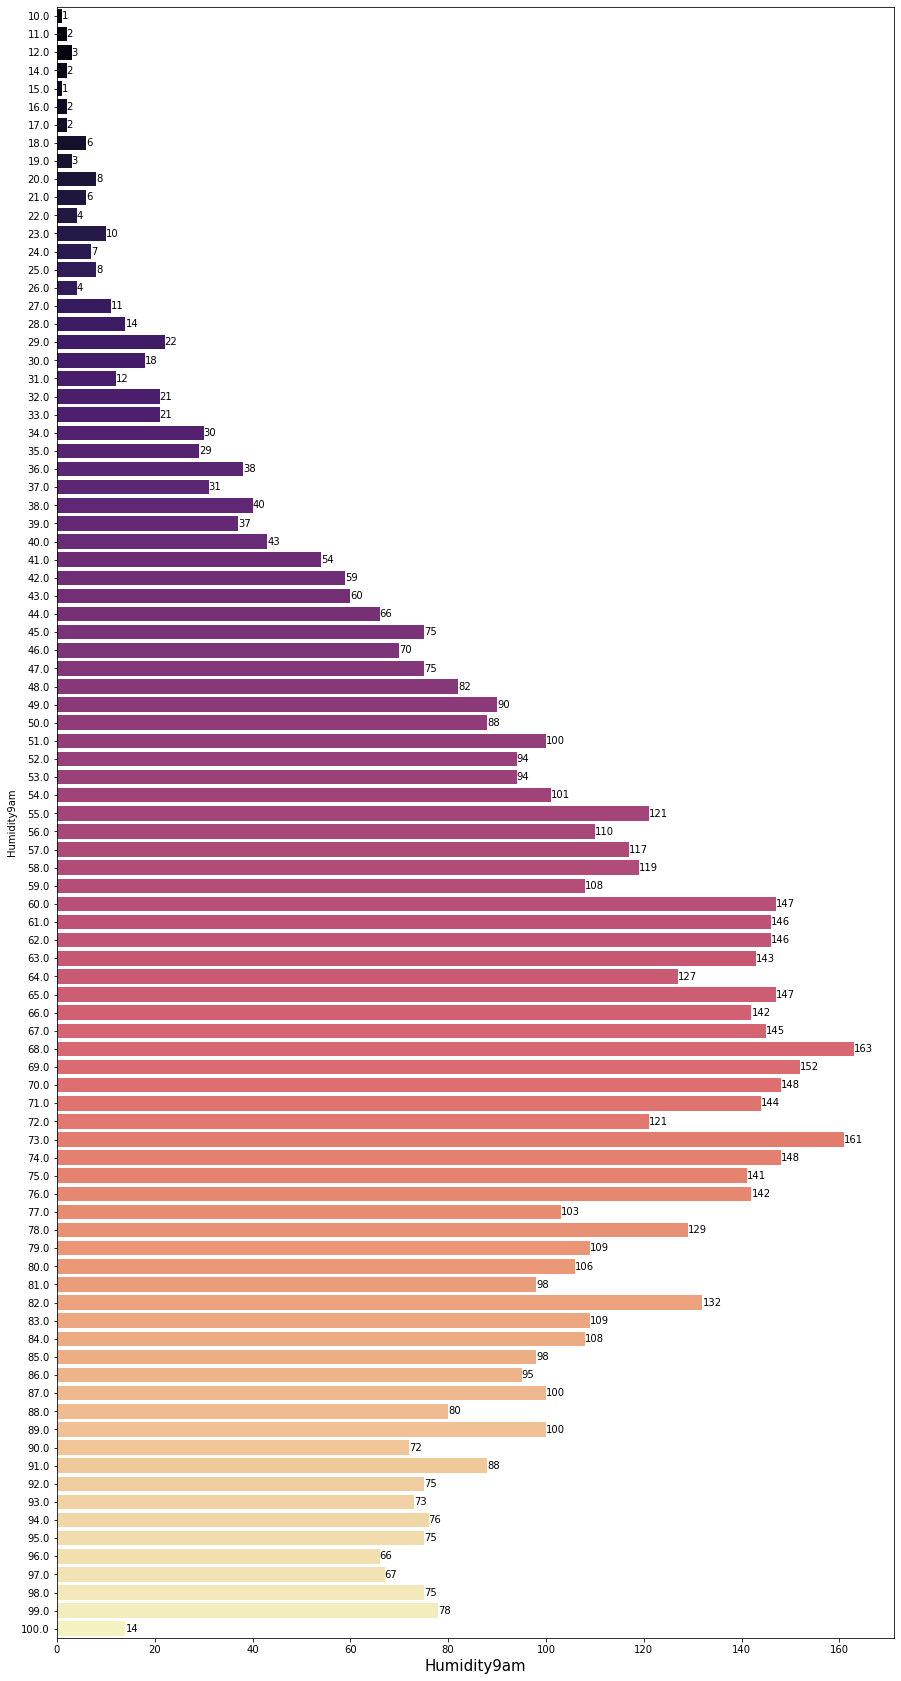

In [261]:
# Visualizing feature 'Humidity9am' with countplot

plt.figure(figsize=(15,30))
ab = sns.countplot(y=weather['Humidity9am'],palette="magma")
plt.xlabel('Humidity9am',fontsize = 15)
plt.yticks(fontsize=10)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

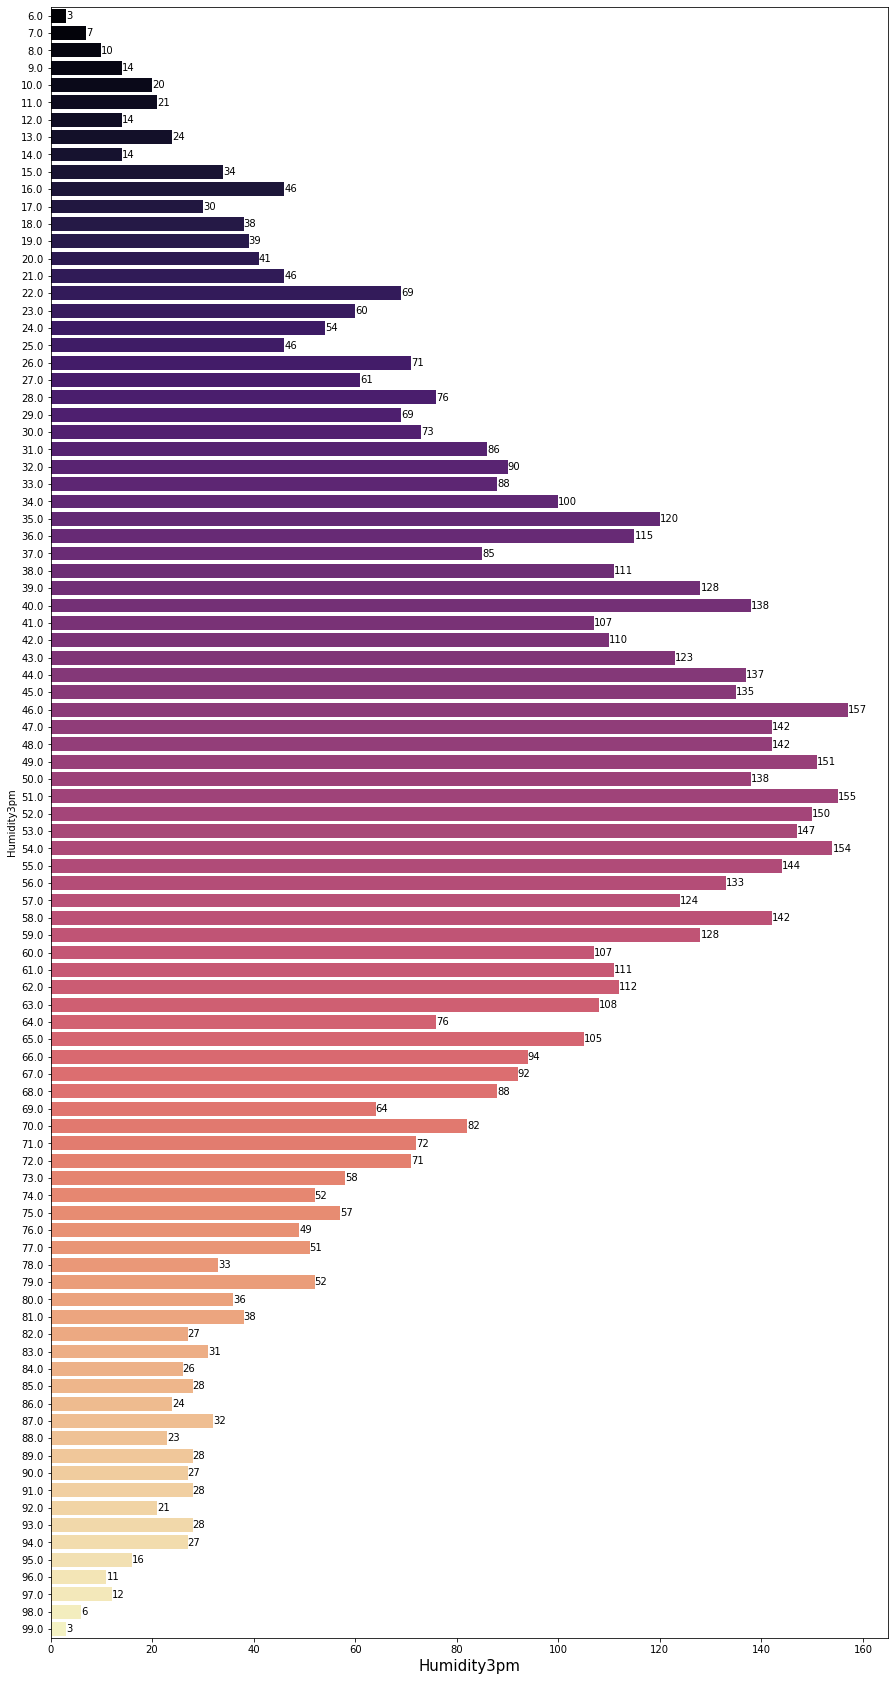

In [262]:
# Visualizing feature 'Humidity3pm' with countplot

plt.figure(figsize=(15,30))
ab = sns.countplot(y=weather['Humidity3pm'],palette="magma")
plt.xlabel('Humidity3pm',fontsize = 15)
plt.yticks(fontsize=10)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

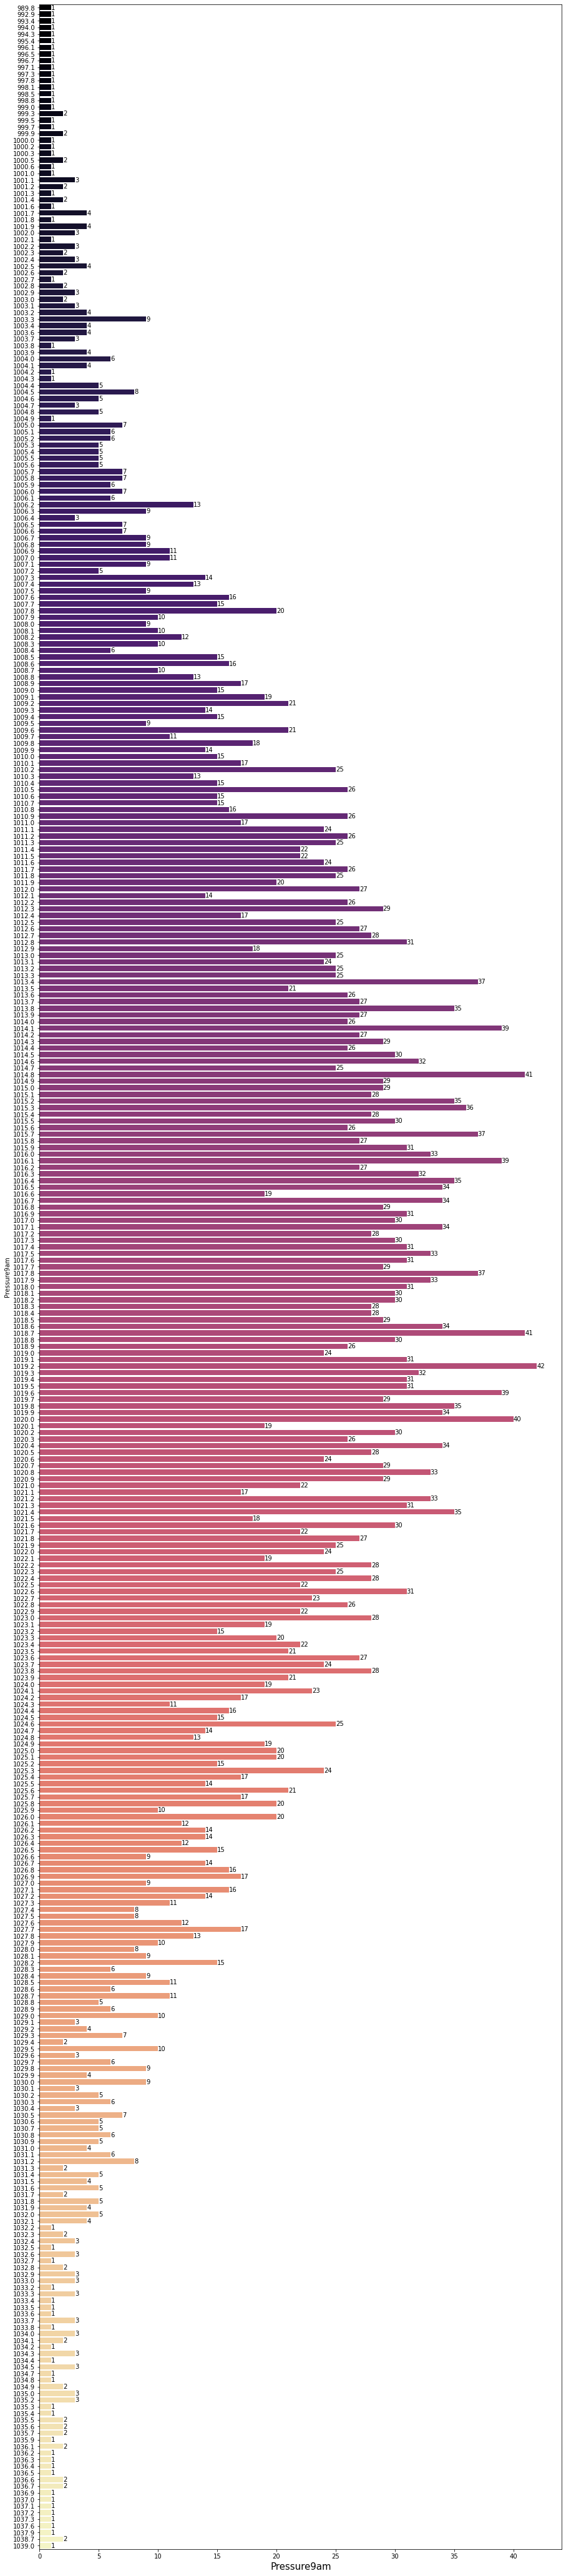

In [263]:
# Visualizing feature 'Pressure9am' with countplot

plt.figure(figsize=(15,75))
ab = sns.countplot(y=weather['Pressure9am'],palette="magma")
plt.xlabel('Pressure9am',fontsize = 15)
plt.yticks(fontsize=10)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

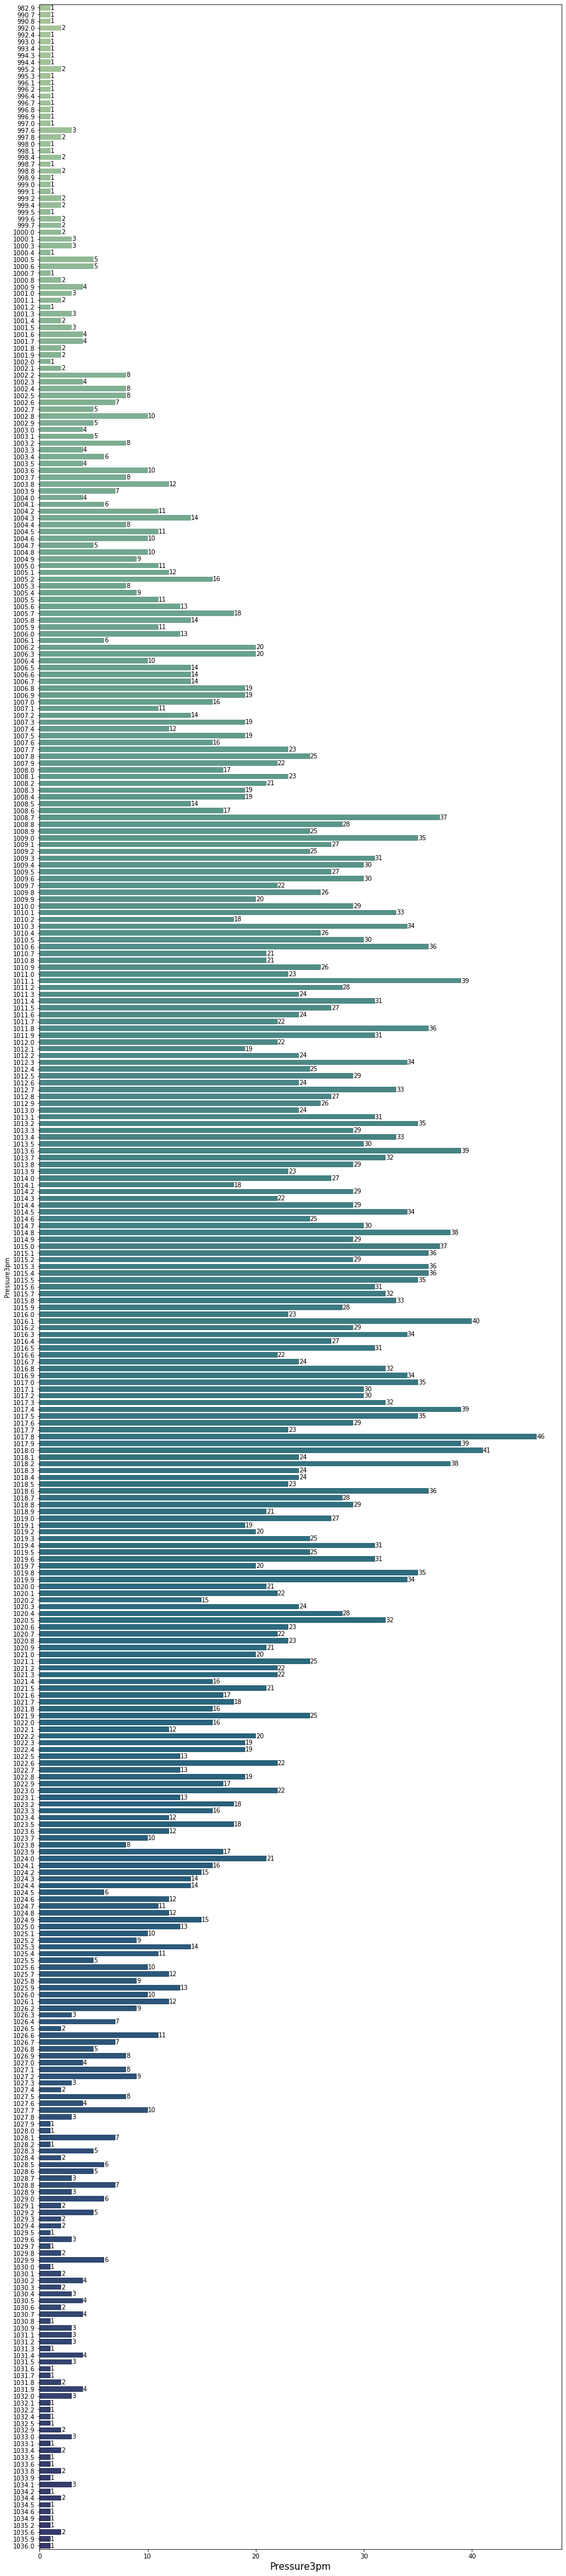

In [264]:
# Visualizing feature 'Pressure3pm' with countplot

plt.figure(figsize=(15,75))
ab = sns.countplot(y=weather['Pressure3pm'],palette="crest")
plt.xlabel('Pressure3pm',fontsize = 15)
plt.yticks(fontsize=10)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

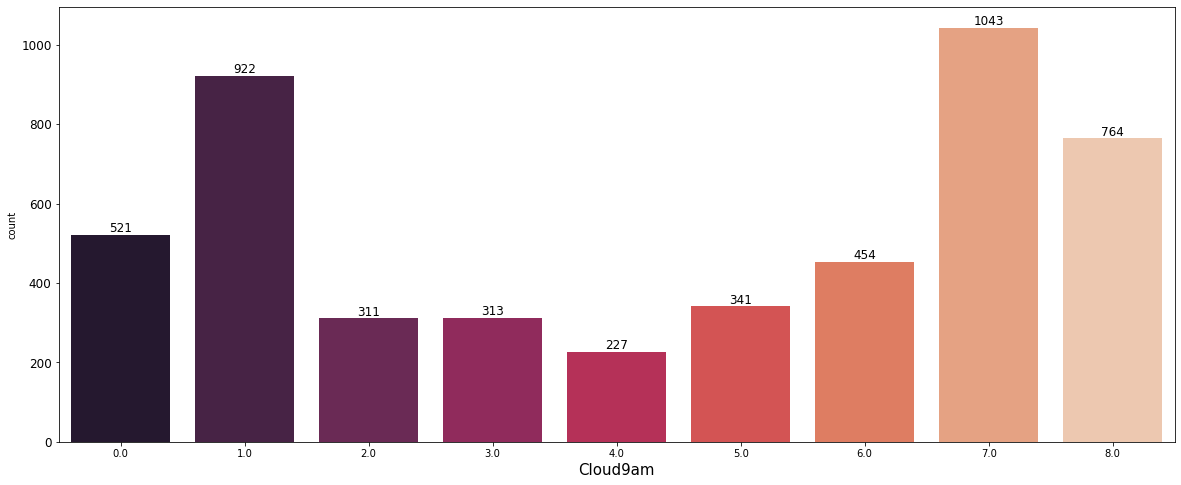

In [265]:
# Visualizing feature 'Cloud9am' with countplot

plt.figure(figsize=(20,8))
ab = sns.countplot(x=weather['Cloud9am'],palette="rocket")
plt.xlabel('Cloud9am',fontsize = 15)
plt.yticks(fontsize=12)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

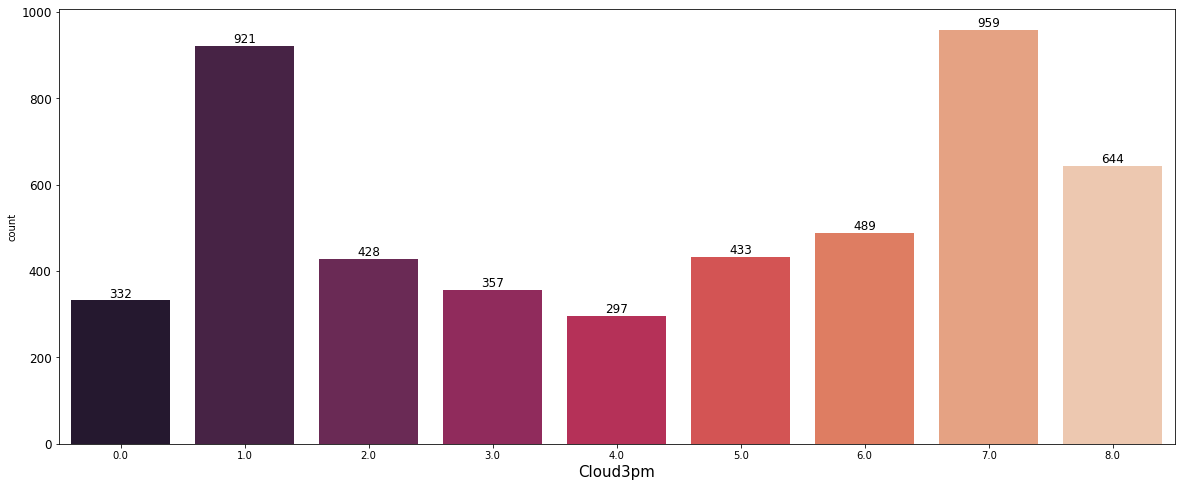

In [266]:
# Visualizing feature 'Cloud3pm' with countplot

plt.figure(figsize=(20,8))
ab = sns.countplot(x=weather['Cloud3pm'],palette="rocket")
plt.xlabel('Cloud3pm',fontsize = 15)
plt.yticks(fontsize=12)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

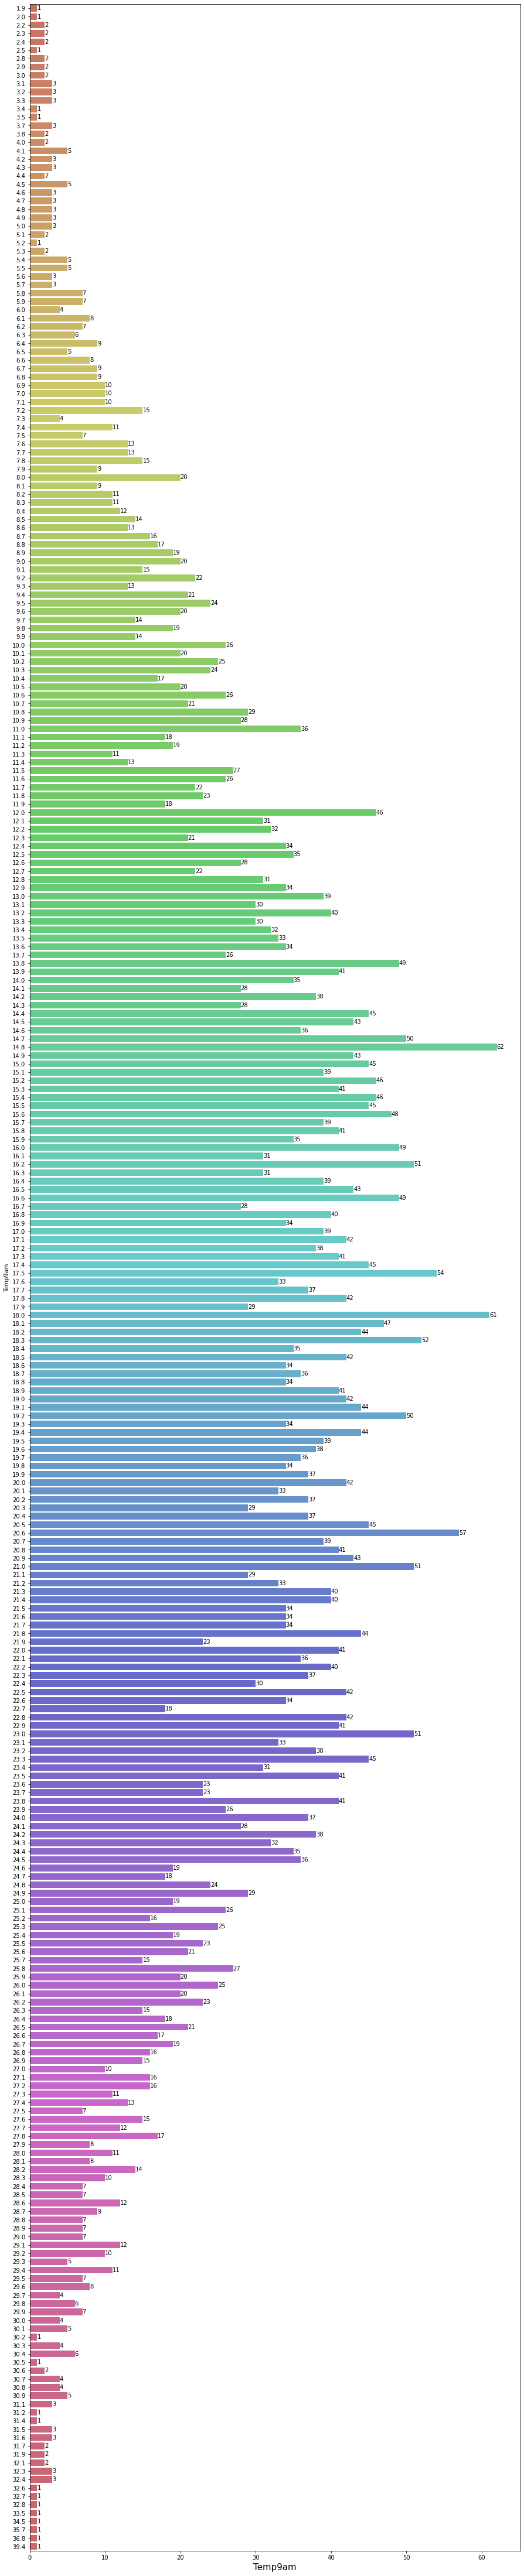

In [267]:
# Visualizing feature 'Temp9am' with countplot

plt.figure(figsize=(15,80))
ab = sns.countplot(y=weather['Temp9am'],palette="hls")
plt.xlabel('Temp9am',fontsize = 15)
plt.yticks(fontsize=10)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

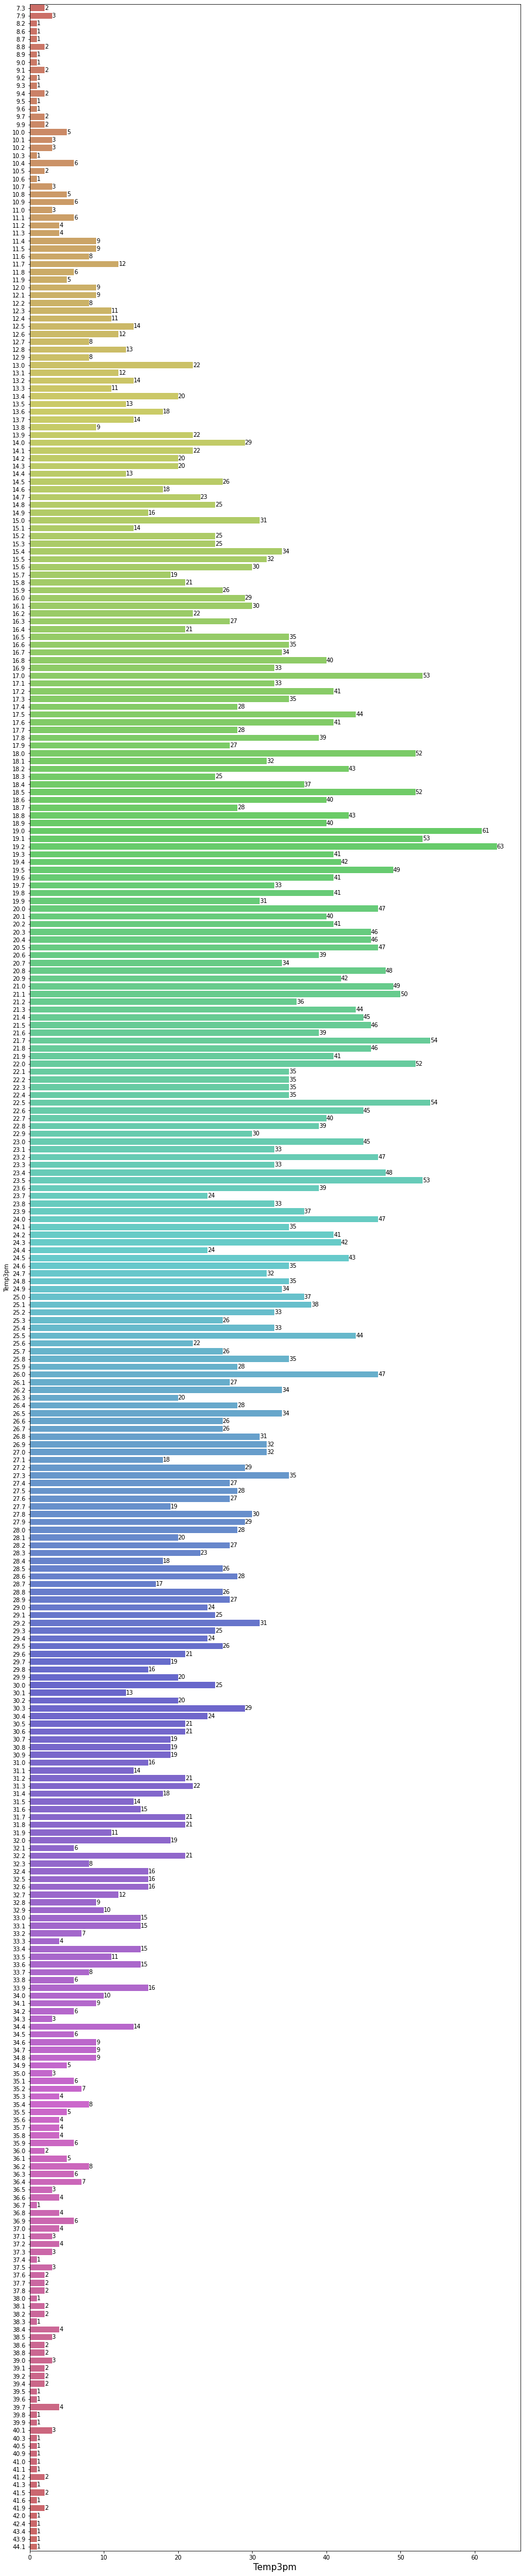

In [268]:
# Visualizing feature 'Temp3pm' with countplot

plt.figure(figsize=(15,80))
ab = sns.countplot(y=weather['Temp3pm'],palette="hls")
plt.xlabel('Temp3pm',fontsize = 15)
plt.yticks(fontsize=10)

for i in ab.containers:
    ab.bar_label(i,fontsize=10)

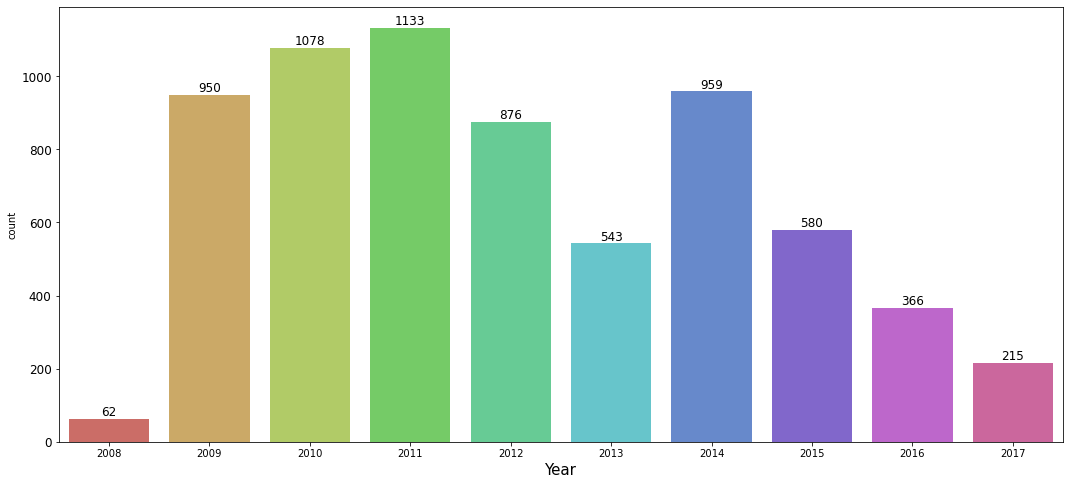

In [269]:
# Visualizing feature 'Year' with countplot

plt.figure(figsize=(18,8))
ab = sns.countplot(x=weather['Year'],palette="hls")
plt.xlabel('Year',fontsize = 15)
plt.yticks(fontsize=12)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

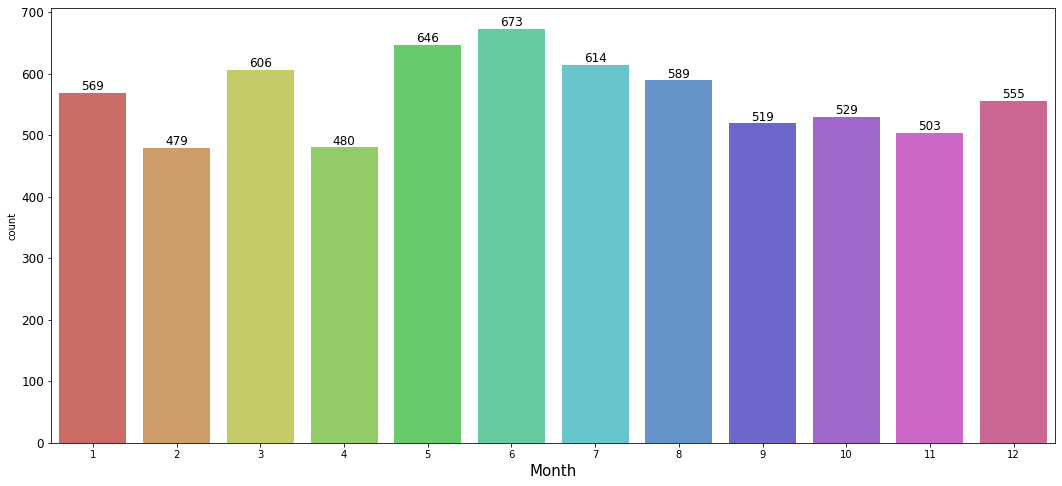

In [270]:
# Visualizing feature 'Month' with countplot

plt.figure(figsize=(18,8))
ab = sns.countplot(x=weather['Month'],palette="hls")
plt.xlabel('Month',fontsize = 15)
plt.yticks(fontsize=12)

for i in ab.containers:
    ab.bar_label(i,fontsize=12)

### Observations

Min Temp of 12.0 Celsius is recorded 74 times and Max Temp of 19.0 Celsius is recorded 87 times from 2008 to 2017

5299 times Rainfall was recorded with 0 mm(No Rainfall) and 0.2 mm Rainfall was recorded 406 times

From 2008 to 2017, we can observe Rainfall over 100 mm was recorded 11 times and highest Rainfall was recorded with 371 mm

Maximum Evaporation 4.0 mm was recorded 180 times and 3.0 mm was recorded 163 times 

166 times 0 hours of bright sunshine in a day was recorded which is the maximum count in the feature Sunshine 

Bright sunshine is recorded mostly between 8.4 to 11.3 hours a day 

WindGustSpeed of 39 km/h was recorded 441 times which is the maximum count followed by 35 km/h 435 times and 37 km/h 422 times

Wind Speed at 9am is mostly below 13 km/h and maximum count which was recorded at 9am was 9 km/h by 803 times

Wind Speed at 3pm is mostly between 9km/h to 28 km/h and maximum count which was recorded at 3pm was 9 km/h with 724 times

Humidity level at 9am is mostly between 49% to 91% and maximum percent was recorded at 73% by 205 times and 62% by 202 times

Humidity level at 3pm is mostly between 31% to 70% and maximum percent was recorded at 55% by 195 times and 51,41 percent by 194 times

Pressure at 9am (Atmospheric Pressure) is mostly between  1013.4 to 1021.4 hpa and maximum was recorded at 1014.8 hpa by 58 times, 1019.2 hpa by 55 times, 1016.1 hpa by 54 times and 1019.6 hpa by 53 times

Pressure at 3pm (Atmospheric Pressure) is mostly between  1008.7 to 1020.5 hpa and maximum was recorded at 1017.8 hpa by 60 times, 1018 hpa by 57 times and 1017.9, 1019.8 hpa by 53 times 

Fraction of sky obscured by cloud mostly at 9am is 7.0 with 1418 occurrences, followed by 1.0 - 1038 occurrences and 8.0 - 1015   occurrences

Fraction of sky obscured by cloud mostly at 3pm is 7.0 with 1294 occurrences, followed by 1.0 - 1077 occurrences and 8.0 - 863  occurrences

Temperature at 9am reaches maximum at 14.8 degree Celsius with 77 occurrences followed by 18.0 C – 73 occurrences, 18.3 C – 71 occurrences and we can observe Temperature is mostly between 11.0 to 24.5  degree Celsius
  
Temperature at 3pm reaches maximum at 19.2 degree Celsius with 78 occurrences followed by 22.5 C – 77 occurrences, 19.0 C – 75 occurrences and 18.5 C, 21.7 C  – 72 occurrences and we can observe Temperature is mostly between 16.5 to 26.0 degree Celsius

Weather report was maximum documented in the year 2011 with 1468 times, followed by 2010 with 1443 and 2009 with 1238 times

From 2008 to 2017 weather reports are maximum recorded during 2nd quarter of the year followed by 1st , 4th and 3rd quarter of the year with June and May has the highest count

## Bivariate and Multivariate Analysis

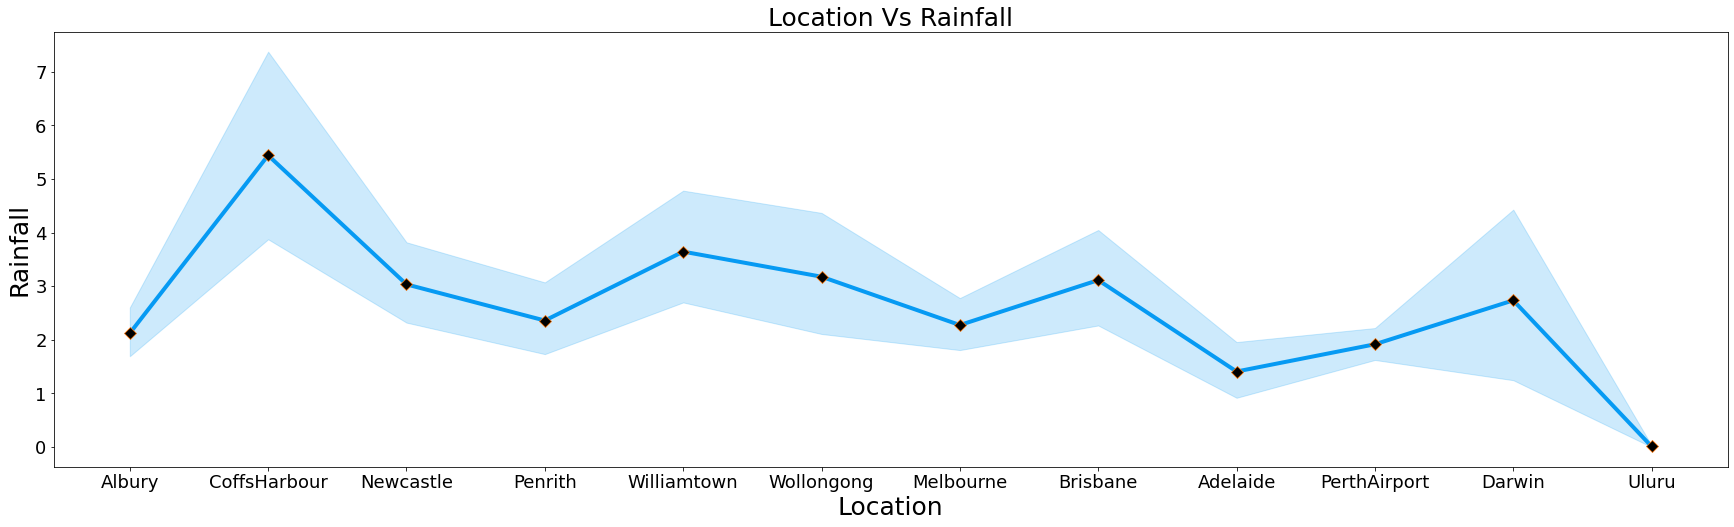

In [271]:
# Comparing Location Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='Location',y='Rainfall',color="#069af3",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Location',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Location Vs Rainfall',fontsize=25)
plt.show()

### Observation

When we compare Location Vs Rainfall, we can observe CoffsHarbour has recorded highest rainfall from 2008 to 2017,
followed by Williamtown and Wollongong

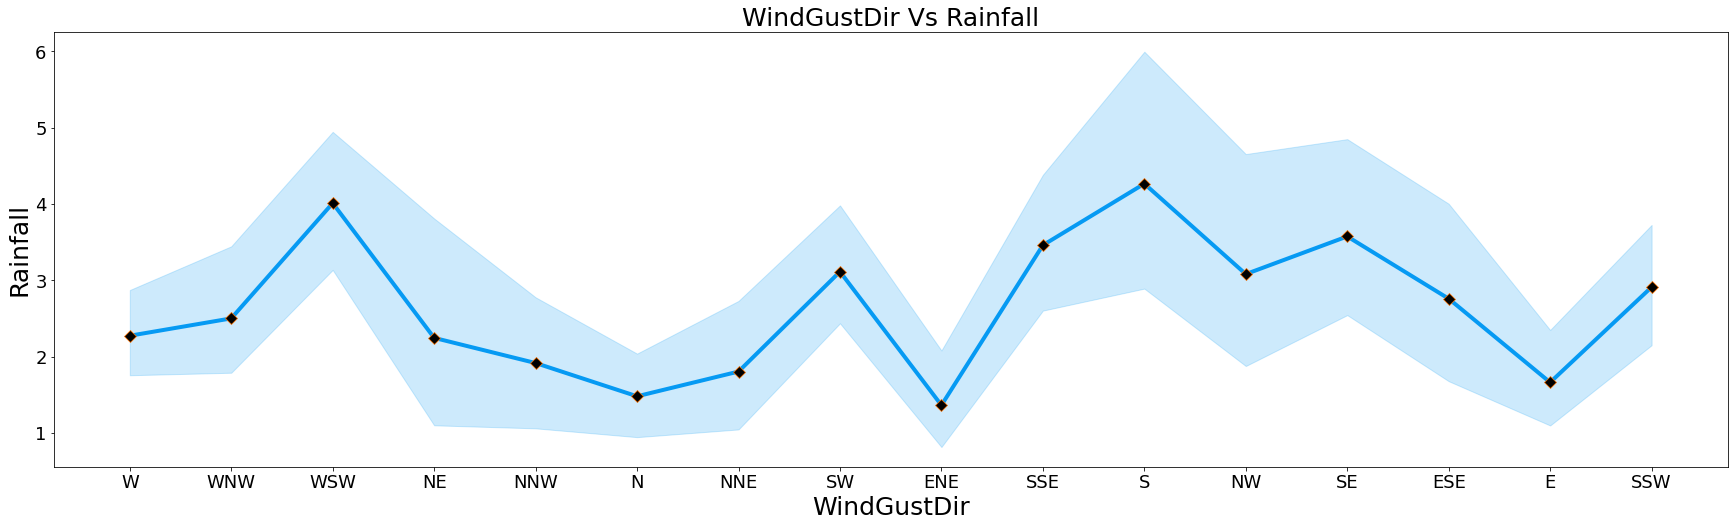

In [272]:
# Comparing WindGustDir Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='WindGustDir',y='Rainfall',color="#069af3",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('WindGustDir',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('WindGustDir Vs Rainfall',fontsize=25)
plt.show()

### Observations

Above Lineplot shows

Highest rainfall has been recorded when Wind Gust Direction is towards S - South, followed by WSW - West Southwest, SSE
South Southeast and SE - Southeast

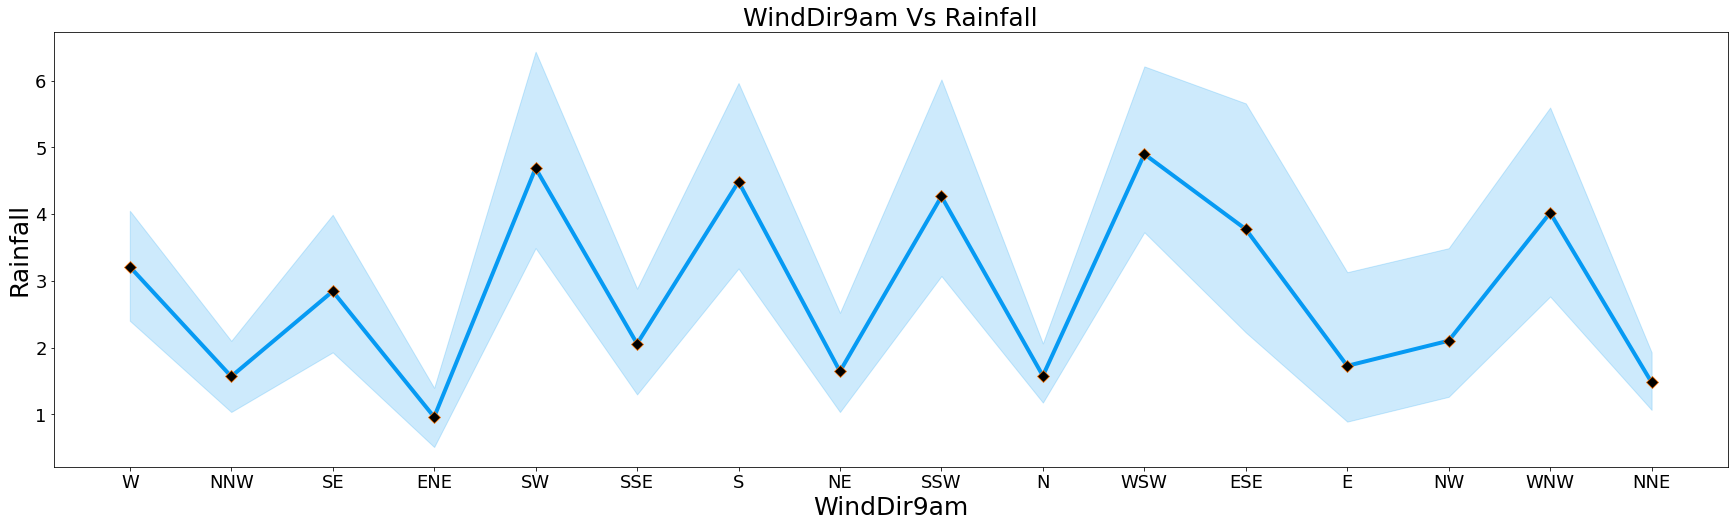

In [273]:
# Comparing WindDir9am Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='WindDir9am',y='Rainfall',color="#069af3",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('WindDir9am',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('WindDir9am Vs Rainfall',fontsize=25)
plt.show()

### Observations

When we compare WindDir9am vs Rainfall, we can observe Rainfall was recorded high when wind direction is towards 
WSW - West-Southwest, followed by SW- Southwest and S - South

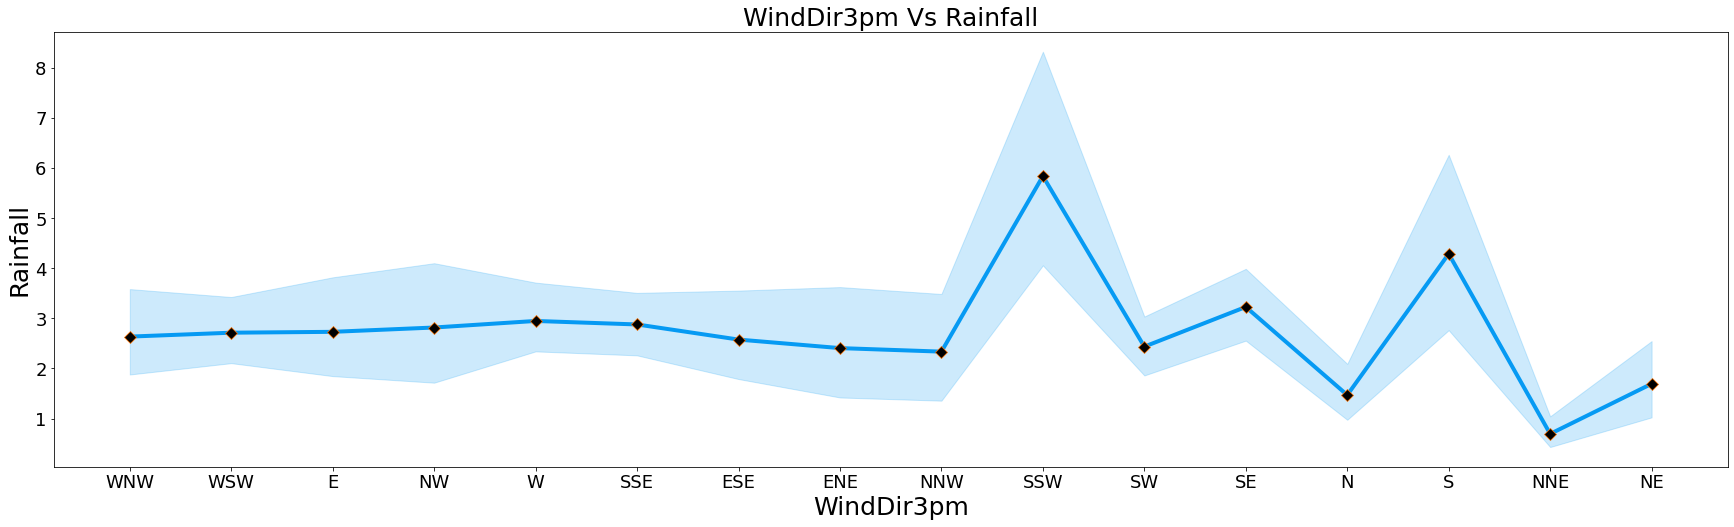

In [274]:
# Comparing WindDir3pm Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='WindDir3pm',y='Rainfall',color="#069af3",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('WindDir3pm',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('WindDir3pm Vs Rainfall',fontsize=25)
plt.show()

### Observations

When we compare WindDir3pm vs Rainfall, we can observe Rainfall was recorded high when wind direction is towards
SSW - South-Southwest, S - South and SE - Southeast

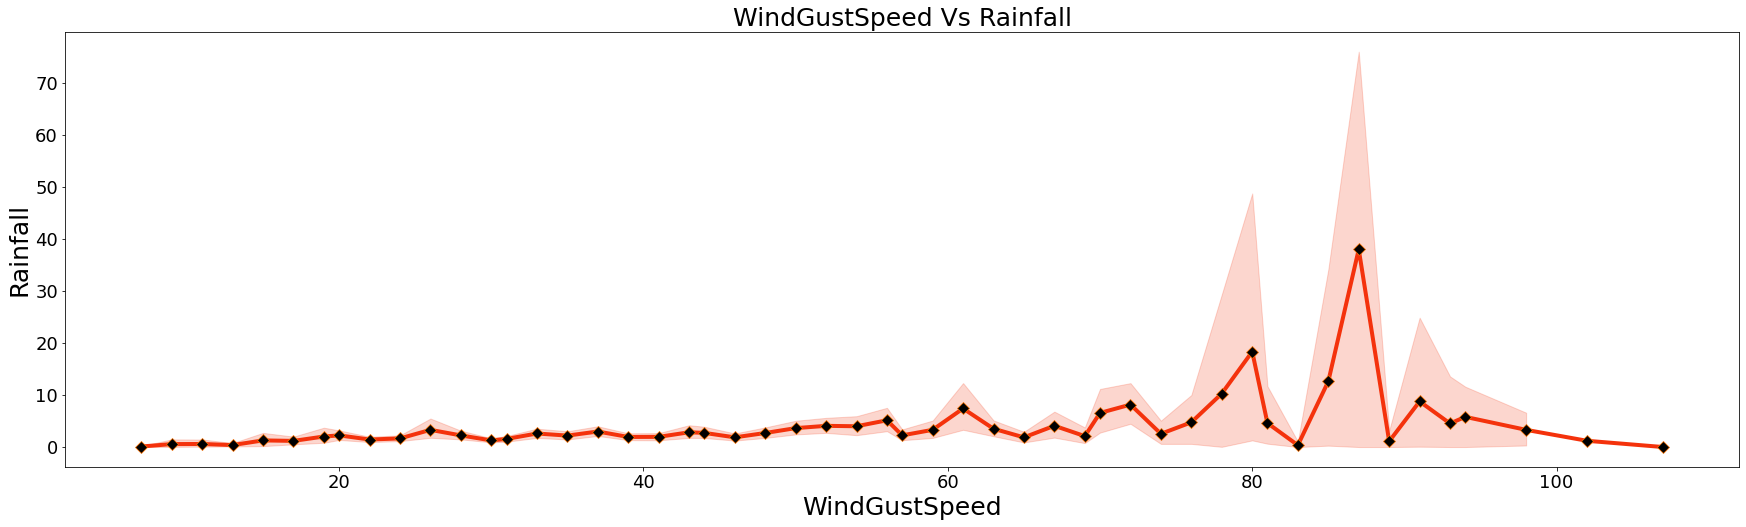

In [275]:
# Comparing WindGustSpeed Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='WindGustSpeed',y='Rainfall',color="#f4320c",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('WindGustSpeed',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('WindGustSpeed Vs Rainfall',fontsize=25)
plt.show()

### Observations

Rainfall in mm is increased when WindGustSpeed increases, also we can observe Rainfall is high when WindGustSpeed is
between 50km/h to 100km/h

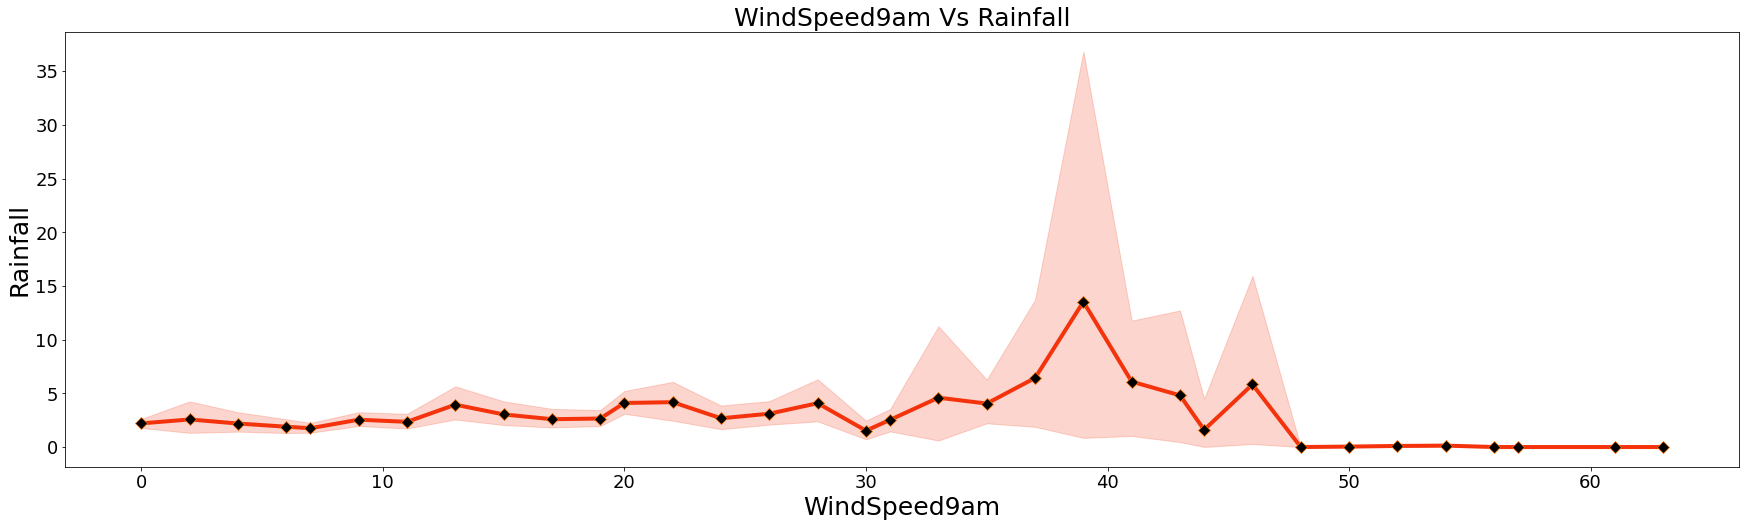

In [276]:
# Comparing WindSpeed9am Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='WindSpeed9am',y='Rainfall',color="#f4320c",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('WindSpeed9am',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('WindSpeed9am Vs Rainfall',fontsize=25)
plt.show()

### Observations

When we compare WindSpeed9am Vs Rainfall

Rainfall is high when WindSpeed9am is mostly between 10km/h to 50km/h

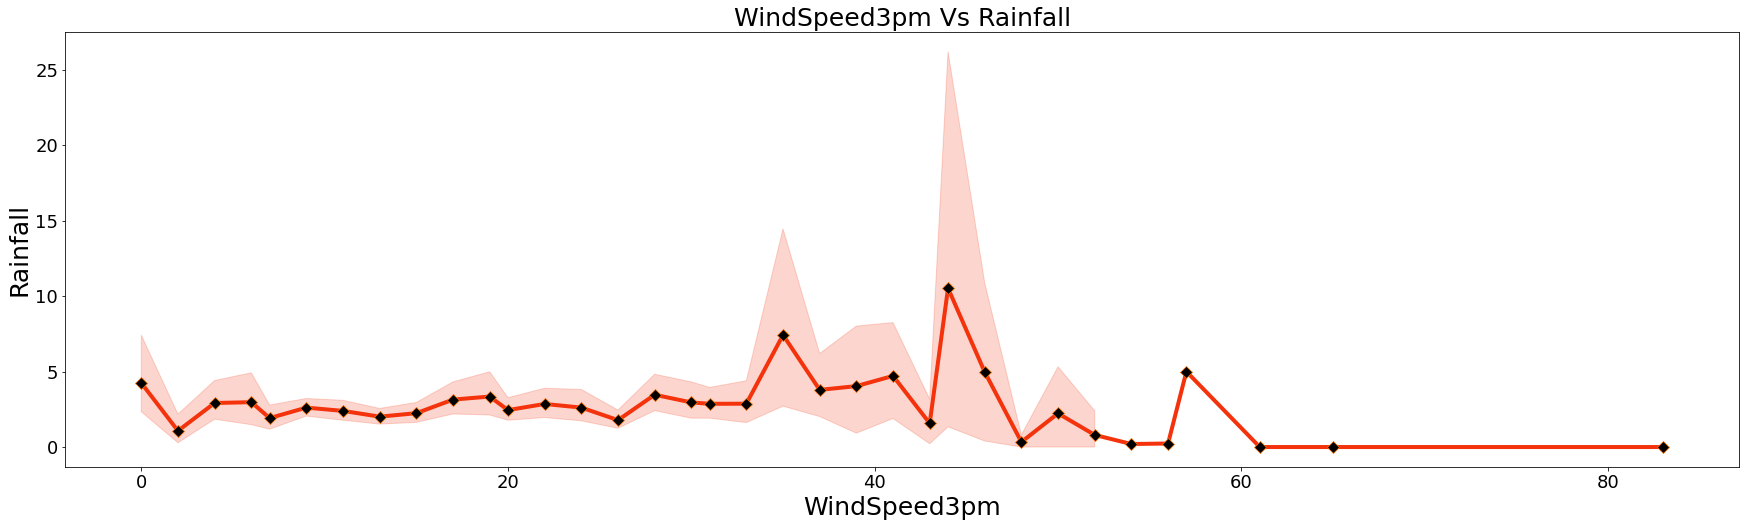

In [277]:
# Comparing WindSpeed3pm Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='WindSpeed3pm',y='Rainfall',color="#f4320c",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('WindSpeed3pm',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('WindSpeed3pm Vs Rainfall',fontsize=25)
plt.show()

### Observations

When we compare WindSpeed3pm Vs Rainfall

Rainfall is high when WindSpeed3pm is mostly between 5km/h to 60km/h

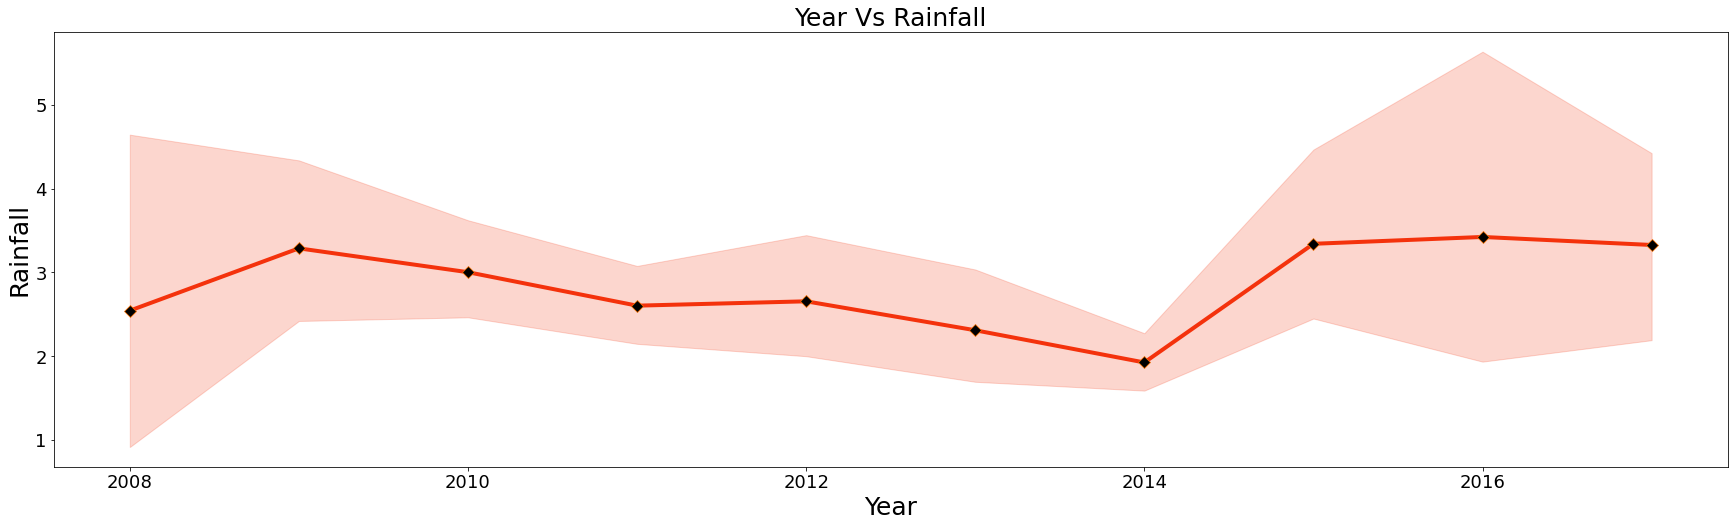

In [278]:
# Comparing Year Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='Year',y='Rainfall',color="#f4320c",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Year',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Year Vs Rainfall',fontsize=25)
plt.show()

### Observations

From the year 2008 to 2017

We can observe Rainfall is maximum registered in the year 2016, followed by 2015 and 2009

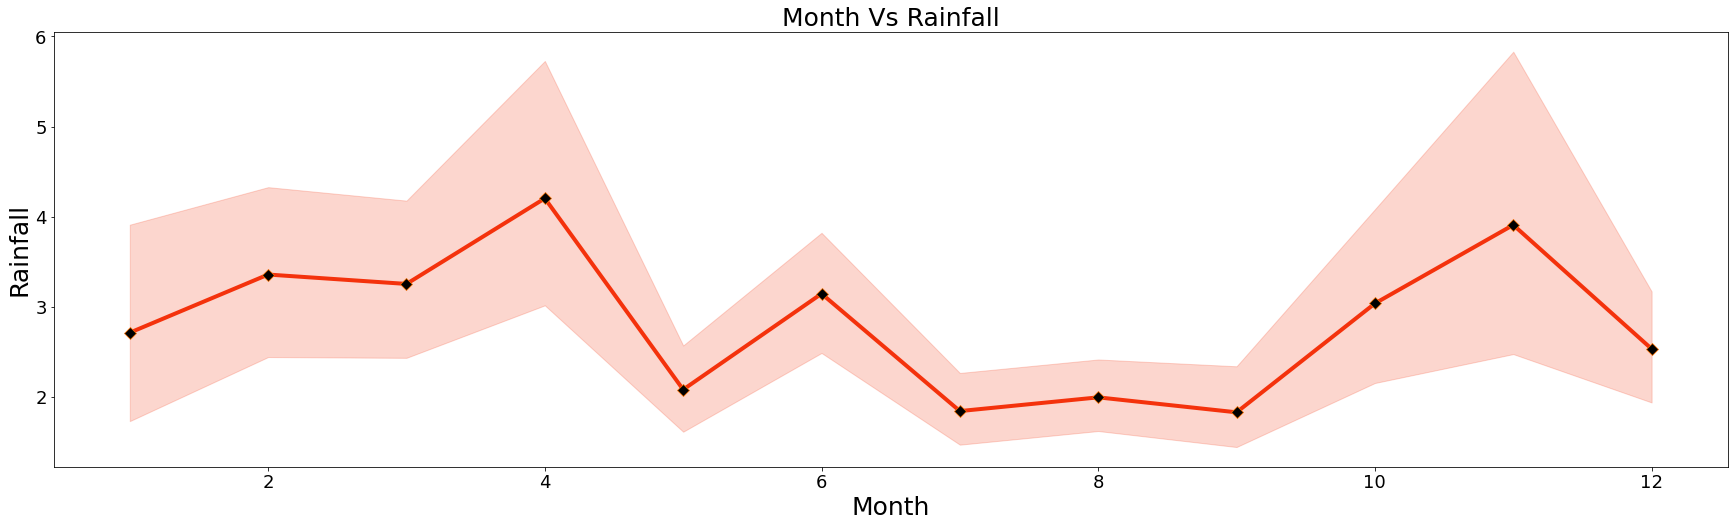

In [279]:
# Comparing Month Vs Rainfall by Lineplot

plt.figure(figsize=(30,8))
wr = sns.lineplot(data =weather,x='Month',y='Rainfall',color="#f4320c",
            linestyle = 'solid',linewidth=4,marker="D",markersize=8,markerfacecolor="k",markeredgecolor="#f97306")
plt.xlabel('Month',fontsize=25)
plt.xticks(fontsize=18)
plt.ylabel('Rainfall',fontsize=25)
plt.yticks(fontsize=18)
plt.title('Month Vs Rainfall',fontsize=25)
plt.show()

### Observations

Rainfall is registered high in the month of April, followed by November and February

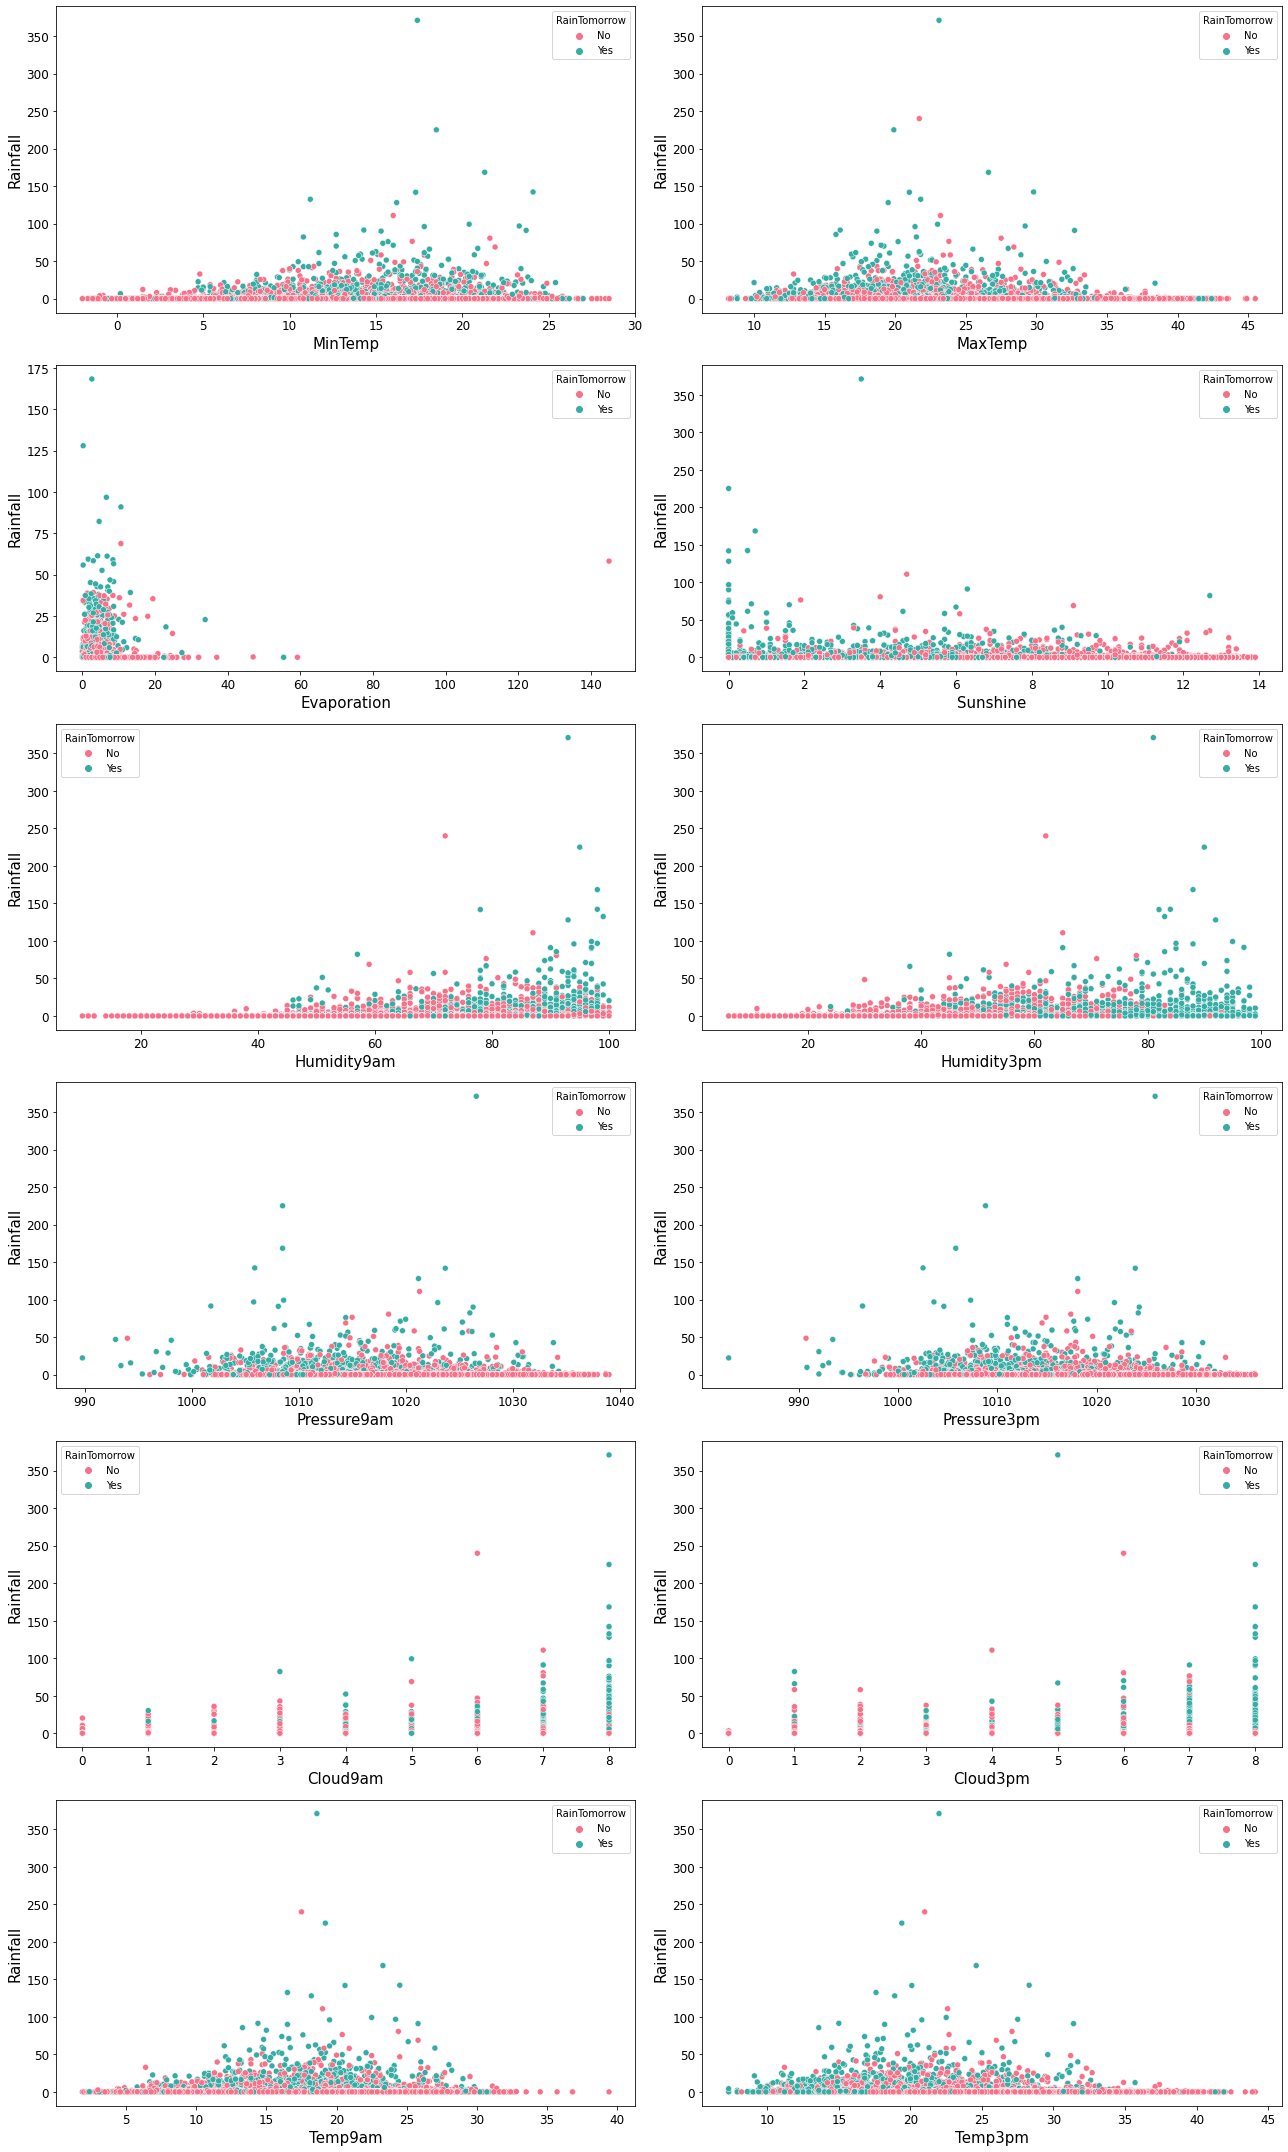

In [280]:
# Comparing Numerial features vs Rainfall vs RainTomorrow by scatterplot

weather_col=['MinTemp', 'MaxTemp','Evaporation', 'Sunshine','Humidity9am', 'Humidity3pm','Pressure9am', 'Pressure3pm',
             'Cloud9am', 'Cloud3pm', 'Temp9am','Temp3pm']

plt.figure(figsize=(18,30))
plot_num = 1

for i in weather_col:
    if plot_num <= 12:
        st=plt.subplot(6,2,plot_num)
        sns.scatterplot(data=weather, x=weather[i], y="Rainfall",hue='RainTomorrow',palette='husl')
        plt.xlabel(i,fontsize=15)
        plt.xticks(fontsize=12)
        plt.yticks(fontsize=12)
        plt.ylabel('Rainfall',fontsize=15)
    plot_num += 1
plt.tight_layout()

### Observations

Chances of Rain Tomorrow is high, when Min Temp is between 5 to 25 and Rainfall in mm is high

Chances of Rain Tomorrow is high, when Max Temp is between 10 to 35 and Rainfall in mm is high 

When Evaporation is below 20, Rainfall the next day and Rainfall in mm is high 

Sunshine is mostly below 6 hours when there is Rainfall the next day

Humidity at 9am and 3pm are mostly between 70 to 100, when there is Rainfall the next day

Pressure at 9am and 3pm are mostly between 1000 to 1030, when there is Rainfall the next day and Rainfall in mm is also high

Fraction of sky obscured by cloud at 9am and 3pm are mostly between 5 to 8

Chances of Rain Tomorrow is high, when Temp(9am and 3pm) is between 10 to 30 and Rainfall in mm is high 

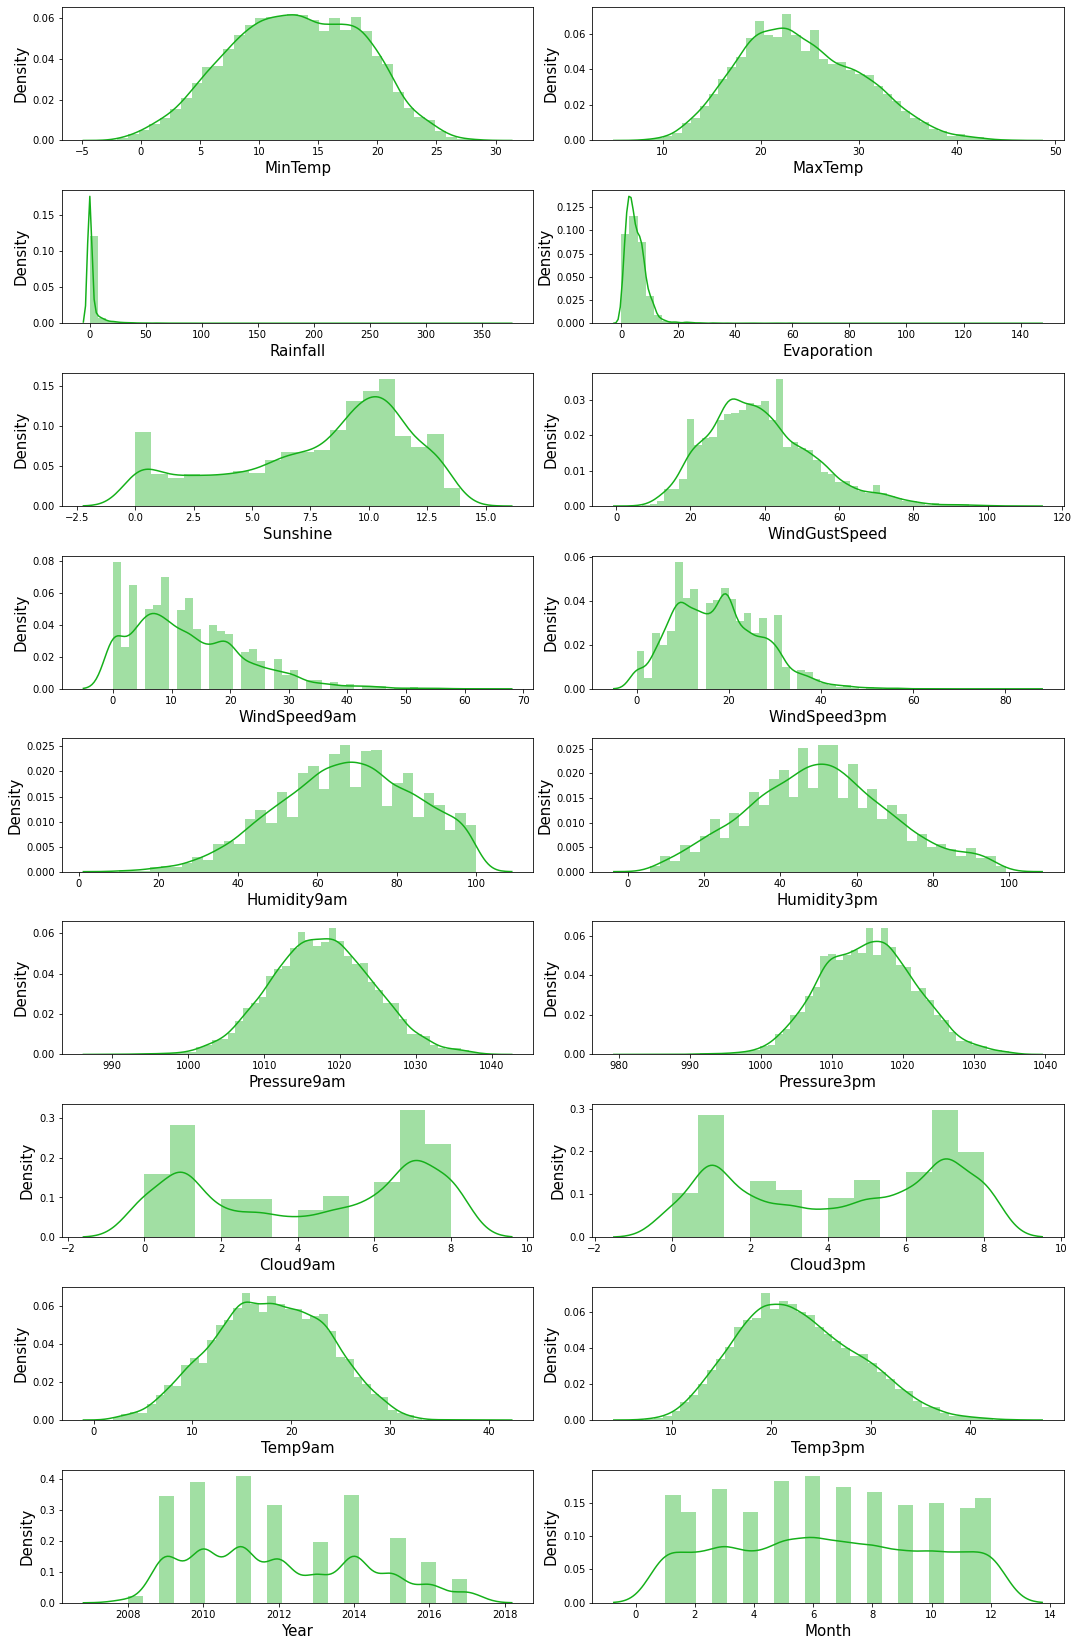

In [281]:
# Visualizing the dataset with distribution plot to check the distribution

plt.figure(figsize=(15,25))
plot_number=1
for i in weather_num:
    if plot_number <=19:
        ax=plt.subplot(10,2,plot_number)
        sns.distplot(weather[i],color='#15b01a')
        plt.xlabel(i,fontsize=15)
        plt.ylabel('Density',fontsize=15)
    plot_number+=1
plt.tight_layout()

In [282]:
# Checking skewness to replace null values by Mean,Median and most_frequent

weather.skew()

MinTemp          -0.083271
MaxTemp           0.326215
Rainfall         13.510350
Evaporation      10.216570
Sunshine         -0.637137
WindGustSpeed     0.724065
WindSpeed9am      0.952569
WindSpeed3pm      0.545718
Humidity9am      -0.255152
Humidity3pm       0.149786
Pressure9am       0.019836
Pressure3pm       0.038601
Cloud9am         -0.183033
Cloud3pm         -0.137486
Temp9am          -0.047034
Temp3pm           0.345725
Year              0.354481
Month             0.021988
dtype: float64

### Observations

Above distribution plot shows skewness present in features Evaporation, Rainfall, Sunshine, WindGustSpeed, WindSpeed9am and WindSpeed3pm

## Replacing Null values

In [283]:
# Replacing Null values for numerical columns with mean

from sklearn.impute import SimpleImputer

imp = SimpleImputer(missing_values=np.NaN,strategy="mean")
weather['MinTemp']=imp.fit_transform(weather['MinTemp'].values.reshape(-1,1))
weather['MaxTemp']=imp.fit_transform(weather['MaxTemp'].values.reshape(-1,1))
weather['Cloud9am']=imp.fit_transform(weather['Cloud9am'].values.reshape(-1,1))
weather['Cloud3pm']=imp.fit_transform(weather['Cloud3pm'].values.reshape(-1,1))
weather['WindSpeed3pm']=imp.fit_transform(weather['WindSpeed3pm'].values.reshape(-1,1))
weather['Humidity9am']=imp.fit_transform(weather['Humidity9am'].values.reshape(-1,1))
weather['Humidity3pm']=imp.fit_transform(weather['Humidity3pm'].values.reshape(-1,1))
weather['Pressure9am']=imp.fit_transform(weather['Pressure9am'].values.reshape(-1,1))
weather['Pressure3pm']=imp.fit_transform(weather['Pressure3pm'].values.reshape(-1,1))
weather['Temp9am']=imp.fit_transform(weather['Temp9am'].values.reshape(-1,1))
weather['Temp3pm']=imp.fit_transform(weather['Temp3pm'].values.reshape(-1,1))

In [284]:
imp = SimpleImputer(missing_values=np.NaN,strategy="median")
weather['Evaporation']=imp.fit_transform(weather['Evaporation'].values.reshape(-1,1))
weather['Rainfall']=imp.fit_transform(weather['Rainfall'].values.reshape(-1,1))
weather['Sunshine']=imp.fit_transform(weather['Sunshine'].values.reshape(-1,1))
weather['WindGustSpeed']=imp.fit_transform(weather['WindGustSpeed'].values.reshape(-1,1))
weather['WindSpeed9am']=imp.fit_transform(weather['WindSpeed9am'].values.reshape(-1,1))

In [285]:
imp = SimpleImputer(missing_values=np.NaN,strategy="most_frequent")
weather['WindGustDir']=imp.fit_transform(weather['WindGustDir'].values.reshape(-1,1))
weather['WindDir9am']=imp.fit_transform(weather['WindDir9am'].values.reshape(-1,1))
weather['WindDir3pm']=imp.fit_transform(weather['WindDir3pm'].values.reshape(-1,1))
weather['RainTomorrow']=imp.fit_transform(weather['RainTomorrow'].values.reshape(-1,1))
weather['RainToday']=imp.fit_transform(weather['RainToday'].values.reshape(-1,1))

<AxesSubplot:>

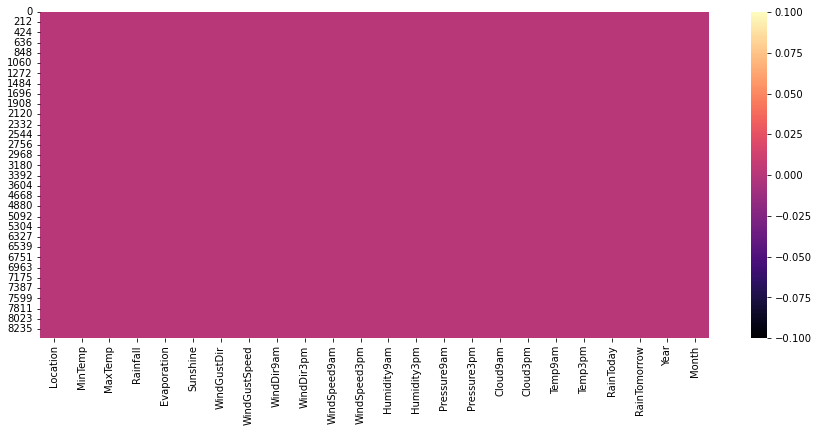

In [286]:
# Checking null values in heatmap

plt.figure(figsize=(15,6))
sns.heatmap(weather.isnull(),cmap='magma')

### Observations

Based on skewness present in the data, null values have been replaced with Simple Imputer 

Features with skewness above +/- 0.5 have been replaced with 'Median' and below with 'Mean'
Categorical features are replaced with 'most-frequent'

Above heatmap shows null values are not present in the dataset

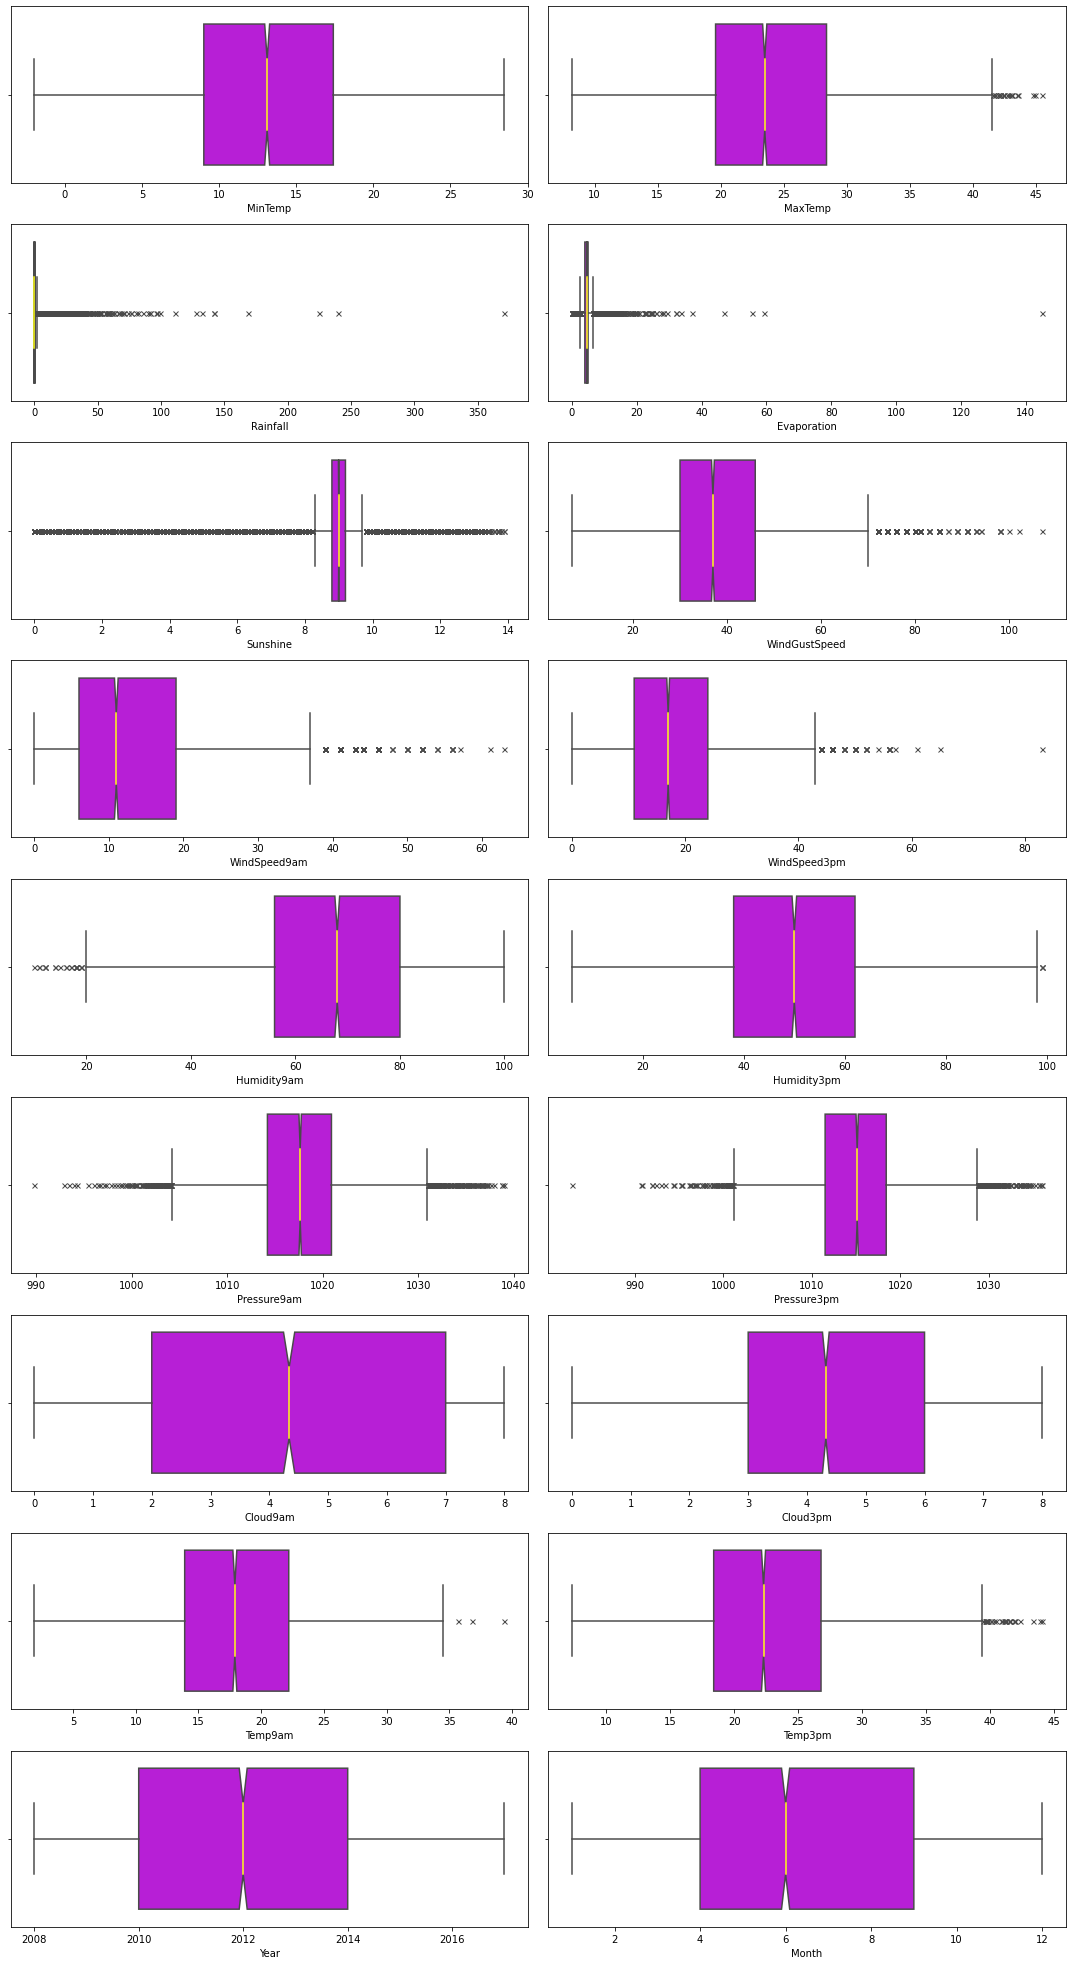

In [287]:
# Visualizing the dataset with Boxplot to check outliers

plt.figure(figsize=(15,30))
st = 1
for i in weather_num:
    if st <=19:
        sub = plt.subplot(10,2,st)
        sns.boxplot(weather[i],color='#cb00f5',notch=True,
                    medianprops={"color": "#ffff14"},flierprops={"marker": "x"})
        plt.xlabel(i,fontsize=10)
    st+=1
plt.tight_layout()

### Observations

Above boxplot shows outliers present in the features Max Temp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,  WindSpeed3pm,
Humidity9am, Humidity3pm,  Pressure9am,  Pressure3pm, Temp9am, Temp3pm

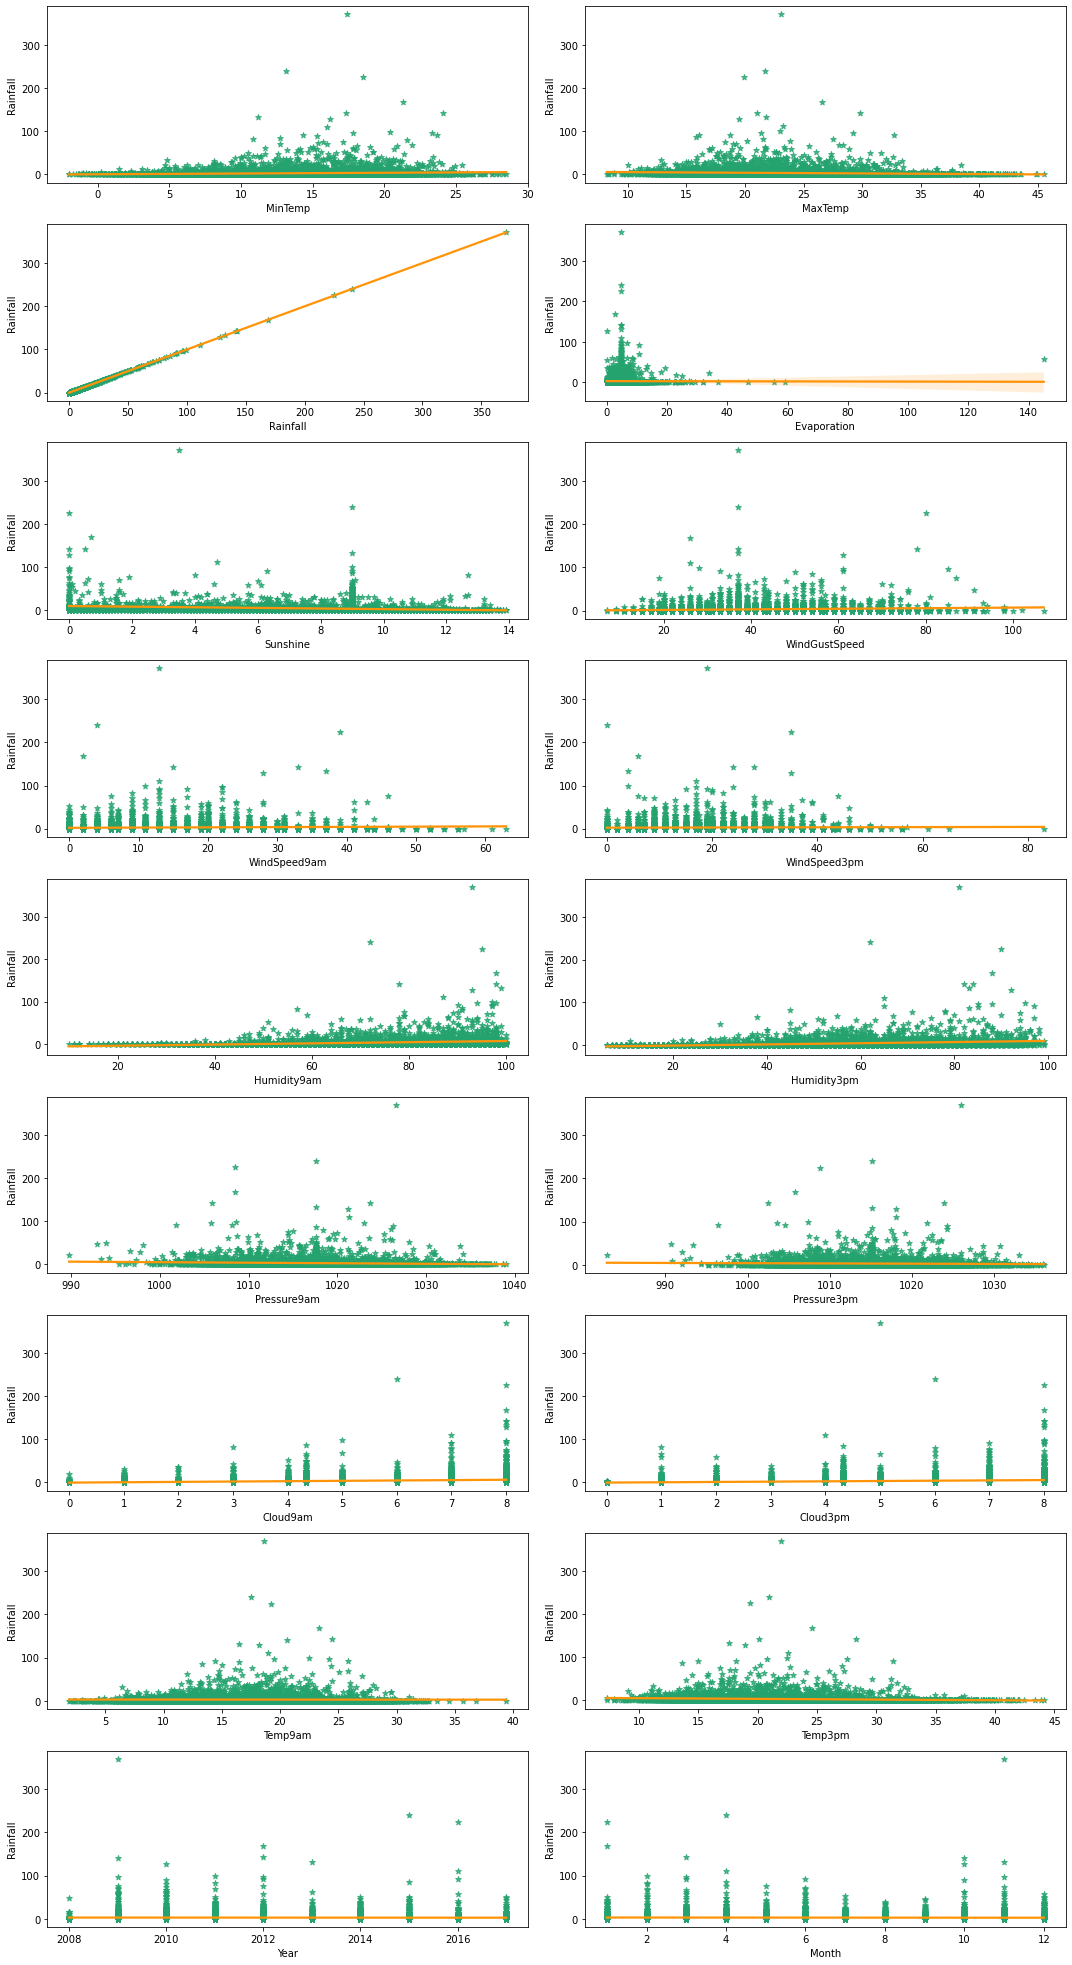

In [288]:
# Visualizing the dataset with regplot with target variable Rainfall

plt.figure(figsize=(15,30))
plot_number=1
for i in weather_num:
    if plot_number <=19:
        ax=plt.subplot(10,2,plot_number)
        sns.regplot(x=weather[i],y=weather['Rainfall'],scatter_kws={"color": "#25a36f"}, 
                    line_kws={"color": "#ff9408"},marker='*')
        plt.xlabel(i,fontsize=10)
    plot_number+=1
plt.tight_layout()

### Observations

Above regplot shows that there is no significant linear relationship between features and target variable 'Rainfall'

## Data Feature Selection and Engineering

### Label Encoding

In [289]:
# Label encoding categorical columns

from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
for i in weather.columns:
    if (weather[i].dtypes=='object'):
        weather[i]=le.fit_transform(weather[i].values.reshape(-1,1))

In [290]:
weather.sample(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  \
653          1      5.5     13.6       0.0          4.6       9.0   
7986         8     14.5     27.8       0.0         10.2      13.1   
3354        10     15.4     23.4      15.0          4.6       9.0   
1794         6     16.2     30.2       0.0          4.6       9.0   
1544         6      9.0     21.7       0.2          4.6       9.0   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Pressure9am  \
653            15           43.0          13          14  ...  1015.200000   
7986           13           44.0           9          12  ...  1012.700000   
3354           10           54.0          10           9  ...  1026.500000   
1794            0           37.0           4           9  ...  1017.626311   
1544            0           37.0           7          12  ...  1017.626311   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  RainToday  \
653   1015.600000  4.336806       7.0      9.5     13.4          0   
7986  1010.000000  0.000000       0.0     22.3     26.3          0   
3354  1024.800000  8.000000       1.0     21.1     21.7          1   
1794  1015.119923  2.000000       6.0     19.9     30.0          0   
1544  1015.119923  0.000000       5.0     15.5     20.8          0   

      RainTomorrow  Year  Month  
653              0  2010      9  
7986             0  2014      1  
3354             1  2017      4  
1794             0  2014      3  
1544             0  2013      7  

[5 rows x 24 columns]

### Observations

Encoded Categorical columns to numerical by Label Encoder

## Describe - Statistic Summary

In [291]:
# Checking the datset with describe function

weather.describe().T

count         mean        std     min      25%          50%  \
Location       6762.0     5.323721   3.099455     0.0     2.25     6.000000   
MinTemp        6762.0    13.109145   5.540667    -2.0     9.00    13.109145   
MaxTemp        6762.0    24.098345   6.130123     8.2    19.60    23.500000   
Rainfall       6762.0     2.723410  10.490138     0.0     0.00     0.000000   
Evaporation    6762.0     4.998980   3.361770     0.0     4.00     4.600000   
Sunshine       6762.0     8.421665   2.789228     0.0     8.80     9.000000   
WindGustDir    6762.0     6.610470   5.233746     0.0     1.00     7.000000   
WindGustSpeed  6762.0    38.702159  13.393977     7.0    30.00    37.000000   
WindDir9am     6762.0     7.013310   4.550702     0.0     3.00     7.000000   
WindDir3pm     6762.0     7.842798   4.486894     0.0     4.00     9.000000   
WindSpeed9am   6762.0    12.765602   9.789075     0.0     6.00    11.000000   
WindSpeed3pm   6762.0    17.571150   9.548634     0.0    11.00    17.000000   
Humidity9am    6762.0    67.506559  17.182700    10.0    56.00    68.000000   
Humidity3pm    6762.0    50.467147  18.498341     6.0    38.00    50.000000   
Pressure9am    6762.0  1017.626311   6.027914   989.8  1014.20  1017.626311   
Pressure3pm    6762.0  1015.119923   5.967638   982.9  1011.50  1015.119923   
Cloud9am       6762.0     4.336806   2.474649     0.0     2.00     4.336806   
Cloud3pm       6762.0     4.320988   2.323276     0.0     3.00     4.320988   
Temp9am        6762.0    17.895038   5.722411     1.9    13.90    17.900000   
Temp3pm        6762.0    22.708561   5.971845     7.3    18.40    22.300000   
RainToday      6762.0     0.232476   0.422442     0.0     0.00     0.000000   
RainTomorrow   6762.0     0.232476   0.422442     0.0     0.00     0.000000   
Year           6762.0  2012.052203   2.301057  2008.0  2010.00  2012.000000   
Month          6762.0     6.462141   3.377471     1.0     4.00     6.000000   

                  75%     max  
Location          8.0    11.0  
MinTemp          17.4    28.5  
MaxTemp          28.4    45.5  
Rainfall          0.8   371.0  
Evaporation       5.0   145.0  
Sunshine          9.2    13.9  
WindGustDir      12.0    15.0  
WindGustSpeed    46.0   107.0  
WindDir9am       11.0    15.0  
WindDir3pm       12.0    15.0  
WindSpeed9am     19.0    63.0  
WindSpeed3pm     24.0    83.0  
Humidity9am      80.0   100.0  
Humidity3pm      62.0    99.0  
Pressure9am    1020.9  1039.0  
Pressure3pm    1018.4  1036.0  
Cloud9am          7.0     8.0  
Cloud3pm          6.0     8.0  
Temp9am          22.2    39.4  
Temp3pm          26.8    44.1  
RainToday         0.0     1.0  
RainTomorrow      0.0     1.0  
Year           2014.0  2017.0  
Month             9.0    12.0

### Observations

Count is same across all the columns stating no missing values

Difference between 75% to max are high in columns MinTemp, Max Temp, Rainfall, Evaporation, Sunshine, WindGustSpeed, WindSpeed9am,  WindSpeed3pm, Humidity9am, Humidity3pm,  Pressure9am,  Pressure3pm, Temp9am and Temp3pm which indicates presence of outliers

## Correlation Analysis

<AxesSubplot:>

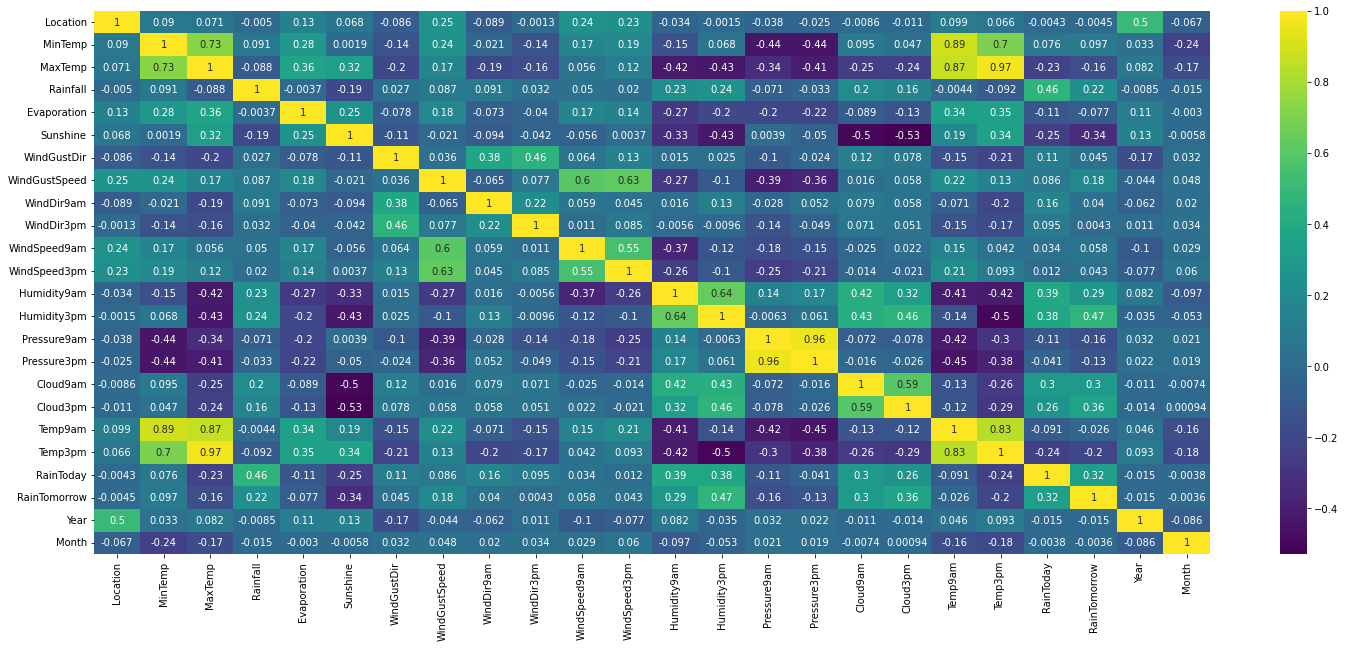

In [292]:
# Checking Correlation of the dataset with Heatmap

plt.figure(figsize=(25,10))
sns.heatmap(weather.corr(),annot=True,cmap='viridis')

<function matplotlib.pyplot.show(close=None, block=None)>

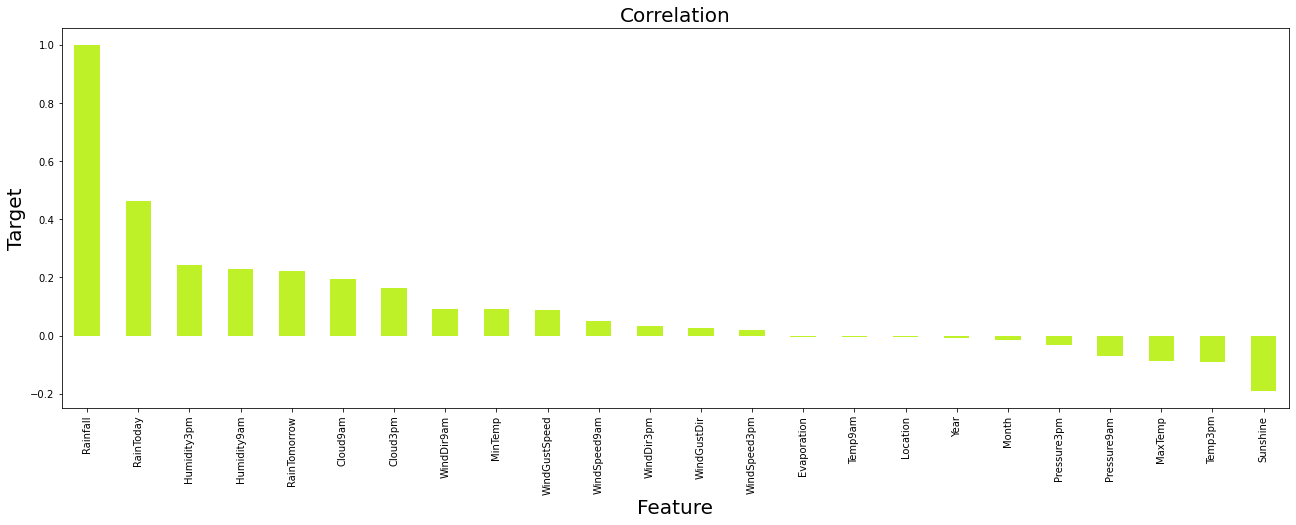

In [293]:
# Checking Correlation of the input attributes with the Target variable 'Rainfall' by Bar Plot

plt.figure(figsize=(22,7))
weather.corr()['Rainfall'].sort_values(ascending=False).plot(kind='bar',color='#bff128')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

<function matplotlib.pyplot.show(close=None, block=None)>

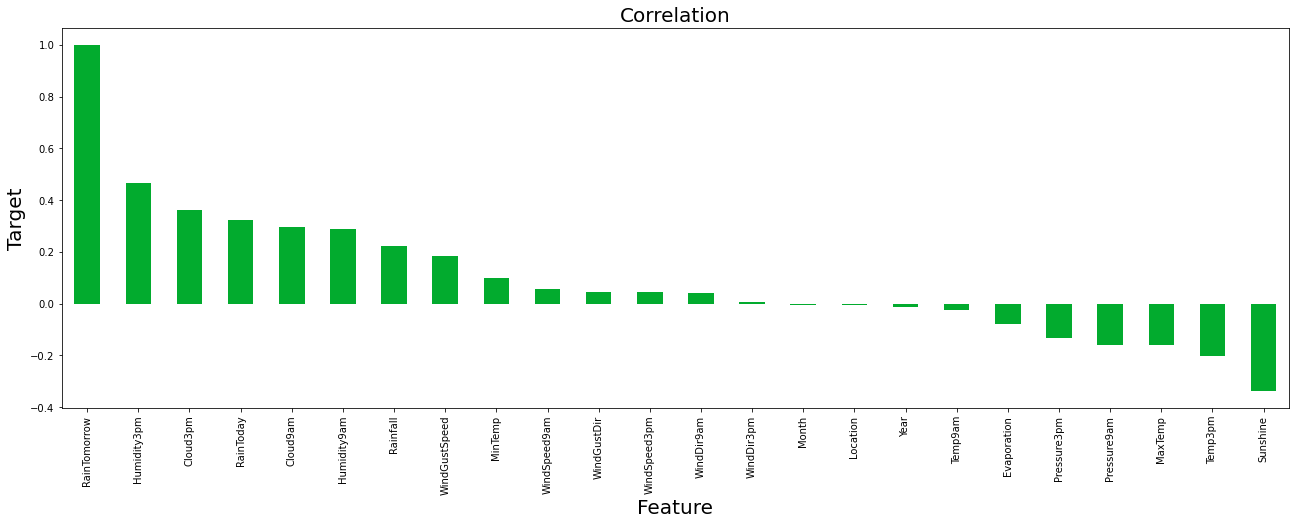

In [294]:
# Checking Correlation of the input attributes with the Target variable 'RainTomorrow' by Bar Plot

plt.figure(figsize=(22,7))
weather.corr()['RainTomorrow'].sort_values(ascending=False).plot(kind='bar',color='#02ab2e')
plt.xlabel('Feature',fontsize=20)
plt.ylabel('Target',fontsize=20)
plt.title('Correlation',fontsize=20)
plt.show

In [295]:
weather.corr()['Rainfall'].sort_values()

Sunshine        -0.190464
Temp3pm         -0.091943
MaxTemp         -0.087743
Pressure9am     -0.071065
Pressure3pm     -0.032678
Month           -0.015187
Year            -0.008516
Location        -0.004972
Temp9am         -0.004354
Evaporation     -0.003746
WindSpeed3pm     0.020333
WindGustDir      0.026811
WindDir3pm       0.031770
WindSpeed9am     0.050206
WindGustSpeed    0.086519
MinTemp          0.090924
WindDir9am       0.091260
Cloud3pm         0.162120
Cloud9am         0.195071
RainTomorrow     0.223599
Humidity9am      0.227964
Humidity3pm      0.242971
RainToday        0.461817
Rainfall         1.000000
Name: Rainfall, dtype: float64

In [296]:
weather.corr()['RainTomorrow'].sort_values()

Sunshine        -0.337550
Temp3pm         -0.202987
MaxTemp         -0.160318
Pressure9am     -0.159103
Pressure3pm     -0.131759
Evaporation     -0.077340
Temp9am         -0.025788
Year            -0.014769
Location        -0.004506
Month           -0.003575
WindDir3pm       0.004301
WindDir9am       0.040399
WindSpeed3pm     0.043409
WindGustDir      0.045179
WindSpeed9am     0.057780
MinTemp          0.097146
WindGustSpeed    0.184400
Rainfall         0.223599
Humidity9am      0.287774
Cloud9am         0.297967
RainToday        0.323691
Cloud3pm         0.360511
Humidity3pm      0.466835
RainTomorrow     1.000000
Name: RainTomorrow, dtype: float64

### Observations

Sunshine, Temp3pm, MaxTemp, Pressure9am, Pressure3pm, Month, Year, Location, Temp9am and Evaporation are negatively correlated
with target variable Rainfall

WindSpeed3pm, WindGustDir, WindDir3pm, WindSpeed9am, WindGustSpeed, MinTemp, WindDir9am, Cloud3pm, Cloud9am, RainTomorrow,
Humidity9am, Humidity3pm and RainToday are positively correlated with target variable Rainfall 

Sunshine, Temp3pm, MaxTemp, Pressure9am, Pressure3pm, Evaporation, Temp9am, Year, Location and Month are negatively correlated
with target variable RainTomorrow

WindDir3pm, WindDir9am, WindSpeed3pm, WindGustDir, WindSpeed9am, MinTemp, WindGustSpeed, Rainfall, Humidity9am,
Cloud9am, RainToday, Cloud3pm and Humidity3pm are positively correlated with target variable RainTomorrow

Moreover Max Temp is negatively correlated with  Humidity9am, Humidity3pm,  Pressure9am,  Pressure3pm

Min Temp  is negatively correlated with  Pressure9am and Pressure3pm

Sunshine is negatively correlated with Cloud3pm and Cloud9am

## Outliers Treatment with Z score

In [297]:
# Removing outliers using Z score

from scipy.stats import zscore

col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
     'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Year','Month']
z1 = weather[col]
z1.head()

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.6       9.0           44.0   
1      7.4     25.1       0.0          4.6       9.0           44.0   
2     12.9     25.7       0.0          4.6       9.0           46.0   
3      9.2     28.0       0.0          4.6       9.0           24.0   
4     17.5     32.3       1.0          4.6       9.0           41.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   
3          11.0           9.0         45.0         16.0       1017.6   
4           7.0          20.0         82.0         33.0       1010.8   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  
0       1007.1  8.000000  4.320988     16.9     21.8  2008     12  
1       1007.8  4.336806  4.320988     17.2     24.3  2008     12  
2       1008.7  4.336806  2.000000     21.0     23.2  2008     12  
3       1012.8  4.336806  4.320988     18.1     26.5  2008     12  
4       1006.0  7.000000  8.000000     17.8     29.7  2008     12

In [298]:
z = np.abs(zscore(z1))
threshold = 3
print(np.where(z>3))

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
        381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
        568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
        770,  795,  796,  797,  802,  928,  928,  928,  935,  941,  949,
        978,  979,  979,  980,  980,  980,  980,  981, 1007, 1008, 1008,
       1009, 1010, 1011, 1115, 1138, 1138, 1148, 1148, 1149, 1150, 1151,
       1189, 1202, 1202, 1203, 1237, 1241, 1264, 1264, 1265, 1265, 1356,
       1357, 1386, 1411, 1412, 1413, 1465, 1466, 1479, 1479, 1480, 1480,
       1481, 1486, 1513, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
       1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108,
       2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500,
       2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835, 2837,
       2849, 2849, 2855, 2859, 2863, 2869, 2877, 2

In [299]:
weather_new = weather[(z<3).all(axis=1)]

In [300]:
weather.shape

(6762, 24)

In [301]:
weather_new.shape

(6305, 24)

In [302]:
# Checking the dataloss

dataloss = (6762-6305)/6762*100
dataloss

6.758355516119491

### Observations

After applying z score to remove outliers, data loss is at 6.75% which is in acceptable range

## Skewness

In [303]:
# Checking Skewness 

weather_new.skew()

Location        -0.005041
MinTemp         -0.073120
MaxTemp          0.261039
Rainfall         3.572436
Evaporation      1.136753
Sunshine        -1.358828
WindGustDir      0.109246
WindGustSpeed    0.544830
WindDir9am       0.214975
WindDir3pm      -0.128511
WindSpeed9am     0.680216
WindSpeed3pm     0.339786
Humidity9am     -0.224089
Humidity3pm      0.138110
Pressure9am      0.064634
Pressure3pm      0.086202
Cloud9am        -0.190400
Cloud3pm        -0.138218
Temp9am         -0.074991
Temp3pm          0.283877
RainToday        1.371384
RainTomorrow     1.383878
Year             0.338266
Month            0.030646
dtype: float64

In [304]:
weather_new['Evaporation'] = np.sqrt(weather_new['Evaporation'])

In [305]:
weather_new['WindSpeed9am'] = np.sqrt(weather_new['WindSpeed9am'])

In [306]:
# Removing skewness using power transform 

from sklearn.preprocessing import PowerTransformer 

skew =['Sunshine','Rainfall']

pt = PowerTransformer(method='yeo-johnson',standardize=False)
weather_new[skew] = pt.fit_transform(weather_new[skew].values)

In [307]:
# Checking Skewness 

weather_new.skew()

Location        -0.005041
MinTemp         -0.073120
MaxTemp          0.261039
Rainfall         1.089584
Evaporation     -0.027412
Sunshine        -0.097213
WindGustDir      0.109246
WindGustSpeed    0.544830
WindDir9am       0.214975
WindDir3pm      -0.128511
WindSpeed9am    -0.480000
WindSpeed3pm     0.339786
Humidity9am     -0.224089
Humidity3pm      0.138110
Pressure9am      0.064634
Pressure3pm      0.086202
Cloud9am        -0.190400
Cloud3pm        -0.138218
Temp9am         -0.074991
Temp3pm          0.283877
RainToday        1.371384
RainTomorrow     1.383878
Year             0.338266
Month            0.030646
dtype: float64

### Observations

Skewness is high in features Evaporation, Sunshine, WindSpeed9am and Rainfall

Applied 'sqrt' to reduce skewness in features Evaporation and WindSpeed9am 

Applying 'sqrt' to Sunshine reduces the value to NaN, hence applied PowerTransformer(method='yeo-johnson') to feature Sunshine

For Rainfall as it is the target variable, tried not to apply transformation methods but the performance of the Model
is very poor, hence applied PowerTransformer(method='yeo-johnson') to reduce skewness and performance improved

## Variance Inflation Factor

In [308]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x = weather_new.drop("Rainfall",axis=1)
x.sample(5)

Location  MinTemp  MaxTemp  Evaporation   Sunshine  WindGustDir  \
2322         6     11.5     27.2     2.144761  53.031739            0   
7758         8      1.6     16.4     1.000000  56.354520            9   
1767         6     20.8     30.9     2.144761  53.031739            0   
434          1     23.0     34.0     2.144761  53.031739            6   
306          1      8.5     13.5     2.144761  53.031739           10   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure9am  \
2322           37.0           7           9      3.000000  ...  1017.626311   
7758           39.0          11           9      3.000000  ...  1029.300000   
1767           37.0           4           4      2.000000  ...  1017.626311   
434            37.0           2           2      2.645751  ...  1020.800000   
306            31.0           2           2      4.123106  ...  1014.000000   

      Pressure3pm  Cloud9am  Cloud3pm  Temp9am    Temp3pm  RainToday  \
2322  1015.119923       3.0  4.320988     17.2  22.708561          0   
7758  1028.300000       1.0  2.000000      8.0  15.700000          1   
1767  1015.119923       1.0  8.000000     24.5  29.000000          0   
434   1017.800000       7.0  7.000000     25.9  33.800000          0   
306   1015.100000       7.0  7.000000      9.6  13.000000          1   

      RainTomorrow  Year  Month  
2322             1  2015      8  
7758             0  2013      5  
1767             1  2014      2  
434              0  2010      2  
306              1  2009     10  

[5 rows x 23 columns]

In [309]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

       VIF Factor       Features
0        4.568615       Location
1       59.189969        MinTemp
2      445.531678        MaxTemp
3       33.720730    Evaporation
4       13.265355       Sunshine
5        3.948433    WindGustDir
6       24.020033  WindGustSpeed
7        4.587185     WindDir9am
8        5.763073     WindDir3pm
9        9.887847   WindSpeed9am
10       8.958625   WindSpeed3pm
11      68.642182    Humidity9am
12      48.047468    Humidity3pm
13  643430.262628    Pressure9am
14  629054.484433    Pressure3pm
15       7.747341       Cloud9am
16       8.164803       Cloud3pm
17     190.204603        Temp9am
18     520.261149        Temp3pm
19       1.774686      RainToday
20       1.835005   RainTomorrow
21   49033.309603           Year
22       5.377205          Month


In [310]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m = ['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Humidity9am',
     'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Year']

st = StandardScaler()
x[m] = st.fit_transform(x[m].values)
x.sample(5)

Location   MinTemp   MaxTemp  Evaporation  Sunshine  WindGustDir  \
6540         2  1.321951  0.928207    -0.177867  1.158814            9   
1160         3  1.015257  0.047555     0.626499 -1.602674           12   
1713         6  1.754930  0.396493     0.013868  0.025501            0   
1372         3 -0.770781 -0.567240    -2.287578 -0.211458           12   
212          1 -0.842945 -1.796829     0.013868  0.025501            7   

      WindGustSpeed  WindDir9am  WindDir3pm  WindSpeed9am  ...  Pressure9am  \
6540      -0.968958          10           0      3.000000  ...    -0.645383   
1160      -0.968958          10           1      3.872983  ...    -0.890991   
1713      -0.067546           9           9      4.690416  ...    -0.026745   
1372      -0.395332          13          10      4.358899  ...     0.038813   
212        1.161653           3           7      4.472136  ...    -1.978687   

      Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  RainToday  \
6540    -0.769145       2.0       1.0  1.486125  0.896993          0   
1160    -0.627595       1.0       8.0  0.784315  0.043796          0   
1713    -0.022482       6.0       6.0  1.205401  0.385075          0   
1372    -0.043700       1.0       2.0 -0.005222 -0.604635          0   
212     -1.777690       8.0       5.0 -1.461478 -1.645535          1   

      RainTomorrow      Year  Month  
6540             0 -0.026698      3  
1160             0 -1.334956     11  
1713             0  0.409388     12  
1372             0 -0.898870      6  
212              1 -1.334956      7  

[5 rows x 23 columns]

In [311]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor       Features
0     5.803799       Location
1     9.130177        MinTemp
2    26.146218        MaxTemp
3     1.727838    Evaporation
4     1.943240       Sunshine
5     4.043765    WindGustDir
6     1.950079  WindGustSpeed
7     4.393702     WindDir9am
8     5.219241     WindDir3pm
9     9.320834   WindSpeed9am
10    8.192224   WindSpeed3pm
11    4.061254    Humidity9am
12    5.522925    Humidity3pm
13   19.687928    Pressure9am
14   19.091939    Pressure3pm
15    7.408209       Cloud9am
16    7.356539       Cloud3pm
17   17.587688        Temp9am
18   32.015269        Temp3pm
19    1.773058      RainToday
20    1.817956   RainTomorrow
21    1.543182           Year
22    4.658106          Month


In [312]:
x.drop(['Temp3pm'],axis=1,inplace=True)

In [313]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor       Features
0     5.791096       Location
1     9.087004        MinTemp
2     9.375760        MaxTemp
3     1.727838    Evaporation
4     1.936528       Sunshine
5     4.029679    WindGustDir
6     1.927651  WindGustSpeed
7     4.393246     WindDir9am
8     5.218262     WindDir3pm
9     9.306285   WindSpeed9am
10    8.190819   WindSpeed3pm
11    3.612229    Humidity9am
12    3.859862    Humidity3pm
13   19.161603    Pressure9am
14   18.637041    Pressure3pm
15    7.381217       Cloud9am
16    7.345799       Cloud3pm
17   16.405049        Temp9am
18    1.772393      RainToday
19    1.817746   RainTomorrow
20    1.542948           Year
21    4.627952          Month


In [314]:
x.drop(['Pressure9am'],axis=1,inplace=True)

In [315]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor       Features
0     5.787848       Location
1     8.965850        MinTemp
2     8.918208        MaxTemp
3     1.710787    Evaporation
4     1.910902       Sunshine
5     3.986980    WindGustDir
6     1.860373  WindGustSpeed
7     4.344491     WindDir9am
8     5.038368     WindDir3pm
9     9.164589   WindSpeed9am
10    8.187520   WindSpeed3pm
11    3.612020    Humidity9am
12    3.859553    Humidity3pm
13    1.459746    Pressure3pm
14    7.357574       Cloud9am
15    7.343799       Cloud3pm
16   16.350570        Temp9am
17    1.750588      RainToday
18    1.805512   RainTomorrow
19    1.542887           Year
20    4.580930          Month


In [316]:
x.drop(['Temp9am'],axis=1,inplace=True)

In [317]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x.values,i) for i in range(len(x.columns))]
vif['Features'] = x.columns
print(vif)

    VIF Factor       Features
0     5.783479       Location
1     4.728468        MinTemp
2     5.310907        MaxTemp
3     1.704490    Evaporation
4     1.904768       Sunshine
5     3.979120    WindGustDir
6     1.826956  WindGustSpeed
7     4.342868     WindDir9am
8     5.035050     WindDir3pm
9     9.073432   WindSpeed9am
10    8.001070   WindSpeed3pm
11    2.522332    Humidity9am
12    3.069434    Humidity3pm
13    1.456664    Pressure3pm
14    7.255093       Cloud9am
15    7.316657       Cloud3pm
16    1.746626      RainToday
17    1.804535   RainTomorrow
18    1.537042           Year
19    4.533103          Month


### Observations

VIF is high in features 'MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm' and 'Year'

Applied standard scaler method to standardize the features, but VIF is still high in features 'Temp3pm', 'Pressure9am',
'Temp9am', 'MaxTemp' and 'Pressure3pm'

Dropped features 'Temp3pm', 'Pressure9am' and 'Temp9am' one by one to reduce VIF 

# Regression Model Evaluation -- Prediction:Rainfall

In [318]:
# Checking the dimension of the data for train, test

x.shape

(6305, 20)

In [319]:
# Splitting the target variable for train, test

y= weather_new['Rainfall']
y.shape

(6305,)

In [320]:
# Importing required Libraries

from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error,r2_score
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.model_selection import cross_val_score

## Finding Random State

In [321]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30,random_state=i)
    rf = RandomForestRegressor()
    rf.fit(x_train,y_train)
    predrf = rf.predict(x_test)
    acc = r2_score(y_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max r2 score is ", maxAcc*100, "on Random state", maxRS)

Max r2 score is  89.00673046663361 on Random state 91


## Train and Test Split

In [322]:
# Training the Model with .30 as test size and random state at 91

x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=.30, random_state=91)

## Model Selection

In [323]:
from sklearn.linear_model import Lasso,Ridge
from sklearn.ensemble import RandomForestRegressor
from sklearn.svm import SVR
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import BaggingRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.ensemble import ExtraTreesRegressor
from sklearn.svm import SVR
from sklearn.model_selection import GridSearchCV

## Lasso

In [324]:
ls = Lasso()

ls.fit(x_train,y_train)
ls.score(x_train,y_train)
print(ls.score(x_train,y_train)*100)
ls_predict=ls.predict(x_test)
cr1 = cross_val_score(ls,x,y, cv=5)

print('MSE:',mean_squared_error(ls_predict,y_test))
print('MAE:',mean_absolute_error(ls_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ls_predict)))
print('r2_score:',r2_score(ls_predict,y_test)*100)
print('CV score of Lasso Regression:',cr1.mean()*100)

0.0
MSE: 0.046723034659627495
MAE: 0.18591802741223898
RMSE: 0.21615511712570556
r2_score: -6.064996652109943e+33
CV score of Lasso Regression: -0.8747230747949608


## Ridge

In [325]:
rd = Ridge()

rd.fit(x_train,y_train)
rd.score(x_train,y_train)
print(rd.score(x_train,y_train)*100)
rd_predict=rd.predict(x_test)
cr2 = cross_val_score(rd,x,y, cv=5)

print('MSE:',mean_squared_error(rd_predict,y_test))
print('MAE:',mean_absolute_error(rd_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, rd_predict)))
print('r2_score:',r2_score(rd_predict,y_test)*100)
print('CV score of Ridge Regression:',cr2.mean()*100)

87.04813064329797
MSE: 0.005183702855972432
MAE: 0.046427242226874985
RMSE: 0.07199793647023803
r2_score: 87.35163812519741
CV score of Ridge Regression: 87.34331826877542


## Linear Regression

In [326]:
LR=LinearRegression()

LR.fit(x_train,y_train)
LR.score(x_train,y_train)
print(LR.score(x_train,y_train)*100)
LR_predict=LR.predict(x_test)
cr3 = cross_val_score(LR,x,y, cv=5)

print('MSE:',mean_squared_error(LR_predict,y_test))
print('MAE:',mean_absolute_error(LR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, LR_predict)))
print('r2_score:',r2_score(LR_predict,y_test)*100)
print('CV score of Linear Regression:',cr3.mean()*100)

86.88987952782949
MSE: 0.00524733599629758
MAE: 0.04609725192385828
RMSE: 0.07243849802624003
r2_score: 87.14950054914307
CV score of Linear Regression: 87.20724518937469


## RandomForestRegressor

In [327]:
RFR = RandomForestRegressor()

RFR.fit(x_train,y_train)
RFR.score(x_train,y_train)
print(RFR.score(x_train,y_train)*100)
RFR_predict=RFR.predict(x_test)
cr4 = cross_val_score(LR,x,y, cv=5)

print('MSE:',mean_squared_error(RFR_predict,y_test))
print('MAE:',mean_absolute_error(RFR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, RFR_predict)))
print('r2_score:',r2_score(RFR_predict,y_test)*100)
print('CV score of Random Forest Regressor:',cr4.mean()*100)

98.10617256246768
MSE: 0.005167687138698792
MAE: 0.04496687216116437
RMSE: 0.07188662698095379
r2_score: 87.19568513349718
CV score of Random Forest Regressor: 87.20724518937469


## ExtraTreesRegressor

In [328]:
ET = ExtraTreesRegressor()
ET.fit(x_train,y_train)
print(ET.score(x_train,y_train)*100)
ET_predict = ET.predict(x_test)
cr5 = cross_val_score(ET,x,y,cv=5)

print('MSE:',mean_squared_error(ET_predict,y_test))
print('MAE:',mean_absolute_error(ET_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ET_predict)))
print('r2_score:',r2_score(ET_predict,y_test)*100)
print('CV score of Extra Trees Regressor:',cr5.mean()*100)

100.0
MSE: 0.005300188413469126
MAE: 0.0451229525174134
RMSE: 0.07280239291032353
r2_score: 86.87364456408835
CV score of Extra Trees Regressor: 86.70734254661984


## DecisionTreeRegressor

In [329]:
DT = DecisionTreeRegressor()

DT.fit(x_train,y_train)
DT.score(x_train,y_train)
print(DT.score(x_train,y_train)*100)
DT_predict=DT.predict(x_test)
cr6 = cross_val_score(DT,x,y, cv=5)

print('MSE:',mean_squared_error(DT_predict,y_test))
print('MAE:',mean_absolute_error(DT_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, DT_predict)))
print('r2_score:',r2_score(DT_predict,y_test)*100)
print('CV score of DecisionTree Regressor:',cr6.mean()*100)

100.0
MSE: 0.01048532766181131
MAE: 0.0475206334358997
RMSE: 0.10239788895192767
r2_score: 77.30237797454107
CV score of DecisionTree Regressor: 72.00486955832085


## KNeighborsRegressor

In [330]:
KNN = KNeighborsRegressor()
KNN.fit(x_train,y_train)
print(KNN.score(x_train,y_train)*100)
KNN_predict = KNN.predict(x_test)
cr7 = cross_val_score(KNN,x,y,cv=5)

print('MSE:',mean_squared_error(KNN_predict,y_test))
print('MAE:',mean_absolute_error(KNN_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, KNN_predict)))
print('r2_score:',r2_score(KNN_predict,y_test)*100)
print('CV score of K Neighbors Regressor:',cr7.mean()*100)

43.9474179500486
MSE: 0.03792144220280827
MAE: 0.13861269410524593
RMSE: 0.19473428615117644
r2_score: -154.78659864388175
CV score of K Neighbors Regressor: 6.96754976112376


## GradientBoostingRegressor

In [331]:
GB = GradientBoostingRegressor()
GB.fit(x_train,y_train)
print(GB.score(x_train,y_train)*100)
GB_predict = GB.predict(x_test)
cr8 = cross_val_score(GB,x,y,cv=5)

print('MSE:',mean_squared_error(GB_predict,y_test))
print('MAE:',mean_absolute_error(GB_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, GB_predict)))
print('r2_score:',r2_score(GB_predict,y_test)*100)
print('CV score of Gradient Boosting Regressor:',cr8.mean()*100)

89.08524882530794
MSE: 0.0050751789844794195
MAE: 0.043496157465764004
RMSE: 0.07124029045757337
r2_score: 87.73898096982072
CV score of Gradient Boosting Regressor: 87.20506290722597


## BaggingRegressor

In [332]:
BR = BaggingRegressor()
BR.fit(x_train,y_train)
print(BR.score(x_train,y_train)*100)
BR_predict = BR.predict(x_test)
cr9 = cross_val_score(BR,x,y,cv=5)

print('MSE:',mean_squared_error(BR_predict,y_test))
print('MAE:',mean_absolute_error(BR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, BR_predict)))
print('r2_score:',r2_score(BR_predict,y_test)*100)
print('CV score of Bagging Regressor:',cr9.mean()*100)

97.23308448237752
MSE: 0.005579248449369436
MAE: 0.04545715915709236
RMSE: 0.07469436691859324
r2_score: 86.35263317148106
CV score of Bagging Regressor: 84.80302377326632


## AdaBoostRegressor

In [333]:
ABR = AdaBoostRegressor()
ABR.fit(x_train,y_train)
print(ABR.score(x_train,y_train)*100)
ABR_predict = ABR.predict(x_test)
cr10 = cross_val_score(ABR,x,y,cv=5)

print('MSE:',mean_squared_error(ABR_predict,y_test))
print('MAE:',mean_absolute_error(ABR_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, ABR_predict)))
print('r2_score:',r2_score(ABR_predict,y_test)*100)
print('CV score of Ada Boost Regressor:',cr10.mean()*100)

84.77617686089303
MSE: 0.006420987676072434
MAE: 0.06375812834232025
RMSE: 0.08013106561173658
r2_score: 81.93317596053518
CV score of Ada Boost Regressor: 84.57739554509125


## SVM

In [334]:
SV = SVR()

SV.fit(x_train,y_train)
print(SV.score(x_train,y_train)*100)
SV_predict = SV.predict(x_test)
cr11 = cross_val_score(SV,x,y,cv=5)

print('MSE:',mean_squared_error(SV_predict,y_test))
print('MAE:',mean_absolute_error(SV_predict,y_test))
print("RMSE:",np.sqrt(mean_squared_error(y_test, SV_predict)))
print('r2_score:',r2_score(SV_predict,y_test)*100)
print('CV score of SVR:',cr11.mean()*100)

77.56694638225989
MSE: 0.009925751302693932
MAE: 0.09254218180449014
RMSE: 0.09962806483463348
r2_score: 53.26456579655685
CV score of SVR: 76.47820855987513


### Observations

Based on Model performance we can observe Gradient Boosting Regressor, Ridge, Linear Regression
are performing well with very less differene to each other

Proceeding to Hyper Parameter tuning to find the best fit model

## Hyper Parameter Tuning

### Hyper Parameter Tuning GradientBoostingRegressor

In [335]:
# Hyper Parameter Tuning for GradientBoostingRegressor

grid_params={'loss': ['squared_error', 'absolute_error', 'huber','quantile'],
              "n_estimators": [100,150,200],'criterion': ['friedman_mse', 'squared_error'],
              'min_samples_leaf': [1, 2],
              "min_samples_split" : [2,4,5,6]}
            
            
gs = GridSearchCV(GradientBoostingRegressor(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=GradientBoostingRegressor(),
             param_grid={'criterion': ['friedman_mse', 'squared_error'],
                         'loss': ['squared_error', 'absolute_error', 'huber',
                                  'quantile'],
                         'min_samples_leaf': [1, 2],
                         'min_samples_split': [2, 4, 5, 6],
                         'n_estimators': [100, 150, 200]})
Best Score 0.8704223933164915
Best Params {'criterion': 'friedman_mse', 'loss': 'squared_error', 'min_samples_leaf': 1, 'min_samples_split': 6, 'n_estimators': 100}


In [336]:
# Tuning GradientBoostingRegressor with parameters

Final_Model1 = GradientBoostingRegressor(n_estimators =100, criterion = 'friedman_mse',loss='squared_error',
                                         min_samples_leaf=1, min_samples_split=6)                                                                    

Final_Model1.fit(x_train,y_train)
pred1 = Final_Model1.predict(x_test)
scores = r2_score(y_test,pred1)
cr_v1 = cross_val_score(Final_Model1,x,y,cv=5)

print('MSE:',mean_squared_error(pred1,y_test))
print('MAE:',mean_absolute_error(pred1,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred1,y_test)))
print('r2_score:',r2_score(pred1,y_test)*100)
print('CV score of GradientBoostingRegressor:',cr_v1.mean()*100)

MSE: 0.005052886432718704
MAE: 0.043254044654329
RMSE: 0.07108365798633821
r2_score: 87.80670686907197
CV score of GradientBoostingRegressor: 87.27327936159938


### Hyper Parameter Tuning Linear Regression

In [337]:
# Hyper Parameter Tuning for Linear Regression

grid_params={'copy_X':['True','False','bool'],'fit_intercept':['True','False','bool'],'n_jobs':[1,2],
             'positive':['True','False','bool']}
            
            
gs = GridSearchCV(LinearRegression(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=LinearRegression(),
             param_grid={'copy_X': ['True', 'False', 'bool'],
                         'fit_intercept': ['True', 'False', 'bool'],
                         'n_jobs': [1, 2],
                         'positive': ['True', 'False', 'bool']})
Best Score 0.8679516096226043
Best Params {'copy_X': 'True', 'fit_intercept': 'True', 'n_jobs': 1, 'positive': 'True'}


In [338]:
# Tuning LinearRegression with parameters

Final_Model2 = LinearRegression(copy_X =True, fit_intercept = True,n_jobs=1,positive=True)
                                                                                                            
Final_Model2.fit(x_train,y_train)
pred2 = Final_Model2.predict(x_test)
scores = r2_score(y_test,pred2)
cr_v2 = cross_val_score(Final_Model2,x,y,cv=5)

print('MSE:',mean_squared_error(pred2,y_test))
print('MAE:',mean_absolute_error(pred2,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred2,y_test)))
print('r2_score:',r2_score(pred2,y_test)*100)
print('CV score of LinearRegression:',cr_v2.mean()*100)

MSE: 0.00524733599629758
MAE: 0.04609725192385828
RMSE: 0.07243849802624003
r2_score: 87.14950054914307
CV score of LinearRegression: 87.20724518937469


### Hyper Parameter Tuning Ridge

In [339]:
# Hyper Parameter Tuning for Ridge

grid_params={'alpha': [0.001,0.01, 0.1, 1, 10, 100],'fit_intercept':['True','bool'],'max_iter':[1000,1500,2000,2500],
             'solver':['auto', 'svd', 'cholesky', 'lsq', 'sparse_cg', 'sag', 'saga', 'lbfgs'],}
            
            
gs = GridSearchCV(Ridge(),param_grid=grid_params)

g_res = gs.fit(x_train,y_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=Ridge(),
             param_grid={'alpha': [0.001, 0.01, 0.1, 1, 10, 100],
                         'fit_intercept': ['True', 'bool'],
                         'max_iter': [1000, 1500, 2000, 2500],
                         'solver': ['auto', 'svd', 'cholesky', 'lsq',
                                    'sparse_cg', 'sag', 'saga', 'lbfgs']})
Best Score 0.8691733984342138
Best Params {'alpha': 0.001, 'fit_intercept': 'bool', 'max_iter': 2500, 'solver': 'sag'}


In [341]:
# Tuning Ridge with parameters

Final_Model3 = Ridge(alpha= 0.001,fit_intercept='bool',max_iter=2500,solver='sag')
                                                                                                            
Final_Model3.fit(x_train,y_train)
pred3 = Final_Model3.predict(x_test)
scores = r2_score(y_test,pred3)
cr_v3 = cross_val_score(Final_Model3,x,y,cv=5)

print('MSE:',mean_squared_error(pred3,y_test))
print('MAE:',mean_absolute_error(pred3,y_test))
print("RMSE:",np.sqrt(mean_squared_error(pred3,y_test)))
print('r2_score:',r2_score(pred3,y_test)*100)
print('CV score of Ridge:',cr_v3.mean()*100)

MSE: 0.00518183029339666
MAE: 0.04633722293417939
RMSE: 0.07198493101612767
r2_score: 87.34557711226539
CV score of Ridge: 87.3355132003834


## Saving the Final model - GradientBoostingRegressor

In [342]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model1,"Rainfall_Weather_Forecating_Reg.pkl")

['Rainfall_Weather_Forecating_Reg.pkl']

## Predicting the Model

In [343]:
# Loading the saved model

Model=joblib.load("Rainfall_Weather_Forecating_Reg.pkl")

#Prediction
prediction = Model.predict(x_test)
prediction

array([ 0.08527227,  0.5265962 , -0.00370946, ...,  0.01636024,
        0.49574723,  0.00729775])

In [344]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x_test)[:],y_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0      0.085272  0.314801
1      0.526596  0.541285
2     -0.003709 -0.000000
3      0.497913  0.537528
4      0.023183 -0.000000
5      0.025843 -0.000000
6      0.014801 -0.000000
7      0.499280  0.508600
8      0.040149 -0.000000
9      0.043631 -0.000000
10     0.014556 -0.000000
11     0.073333 -0.000000
12     0.003003 -0.000000
13     0.002692 -0.000000
14     0.003377 -0.000000
15    -0.002041 -0.000000
16     0.504051  0.497534
17     0.036382 -0.000000
18     0.022381 -0.000000
19     0.006062 -0.000000
20     0.017383 -0.000000
21    -0.004904 -0.000000
22     0.044653 -0.000000
23     0.040118 -0.000000
24     0.523791  0.513889
25     0.055245 -0.000000
26     0.529674  0.540247
27     0.489099  0.450290
28     0.005960 -0.000000
29     0.021368 -0.000000
30     0.027206 -0.000000
31     0.513955  0.472045
32     0.031456 -0.000000
33     0.027986 -0.000000
34    -0.002613 -0.000000
35     0.500850  0.539070
36     0.094721  0.087433
37     0.041209  0.154933
38     0.049035 -0.000000
39     0.019143 -0.000000
40    -0.000429 -0.000000
41     0.028550 -0.000000
42     0.014810 -0.000000
43     0.003295 -0.000000
44     0.041145 -0.000000
45     0.067848 -0.000000
46     0.021836  0.314801
47     0.008422 -0.000000
48     0.021683 -0.000000
49     0.512515  0.533491
50     0.512196  0.531287
51     0.509039  0.541353
52     0.032369 -0.000000
53     0.110788 -0.000000
54     0.018551 -0.000000
55     0.489913  0.497534
56     0.000552 -0.000000
57     0.528638  0.541353
58     0.495248  0.472045
59     0.070646  0.087433
60     0.500236  0.416487
61     0.007031 -0.000000
62     0.009366 -0.000000
63     0.043528  0.154933
64     0.519183  0.542149
65     0.037086 -0.000000
66     0.022523  0.392012
67     0.084766  0.392012
68     0.517305  0.416487
69     0.033222 -0.000000
70     0.008587 -0.000000
71     0.095408 -0.000000
72     0.024576 -0.000000
73     0.004927 -0.000000
74     0.030143 -0.000000
75     0.488539  0.531899
76     0.009798 -0.000000
77     0.525825  0.534791
78     0.005993 -0.000000
79     0.010708 -0.000000
80     0.020527 -0.000000
81     0.019605 -0.000000
82     0.489603  0.462268
83     0.518992  0.543229
84     0.506879  0.501749
85     0.523641  0.539514
86     0.005272 -0.000000
87     0.488976  0.462268
88     0.063357 -0.000000
89     0.026637 -0.000000
90     0.075471  0.250976
91     0.017616 -0.000000
92     0.002998 -0.000000
93     0.053125  0.154933
94     0.067457 -0.000000
95     0.467620  0.416487
96     0.050414 -0.000000
97     0.046558  0.087433
98     0.029085 -0.000000
99     0.077815 -0.000000
100    0.041229 -0.000000
101    0.049908 -0.000000
102    0.102808  0.154933
103    0.079650 -0.000000
104    0.029399 -0.000000
105    0.505646  0.486908
106    0.506352  0.533953
107    0.026406 -0.000000
108    0.498521  0.450290
109    0.650529  0.542608
110    0.061191 -0.000000
111   -0.000862 -0.000000
112    0.505283  0.508600
113    0.020931 -0.000000
114    0.501989  0.508600
115    0.007998 -0.000000
116    0.036469 -0.000000
117    0.126375  0.359471
118    0.515826  0.536766
119    0.003245 -0.000000
120    0.093887 -0.000000
121    0.009355 -0.000000
122    0.046331 -0.000000
123   -0.003044 -0.000000
124    0.057038  0.250976
125    0.013490 -0.000000
126    0.046484 -0.000000
127    0.060609 -0.000000
128    0.038657  0.154933
129    0.017824 -0.000000
130    0.071401 -0.000000
131    0.047448 -0.000000
132    0.022733 -0.000000
133    0.007503 -0.000000
134    0.504523  0.529917
135    0.526237  0.536766
136    0.038627 -0.000000
137    0.119747 -0.000000
138    0.053574 -0.000000
139    0.045423 -0.000000
140    0.026980 -0.000000
141    0.040414 -0.000000
142    0.092551 -0.000000
143    0.028093 -0.000000
144    0.507337  0.524152
145    0.052664  0.392012
146    0.077089  0.154933
147    0.005229 -0.000000
148    0.523121  0.536766
149    0.034662  0.359471
150    0.040867 -0.000000
151    0.031569 -0.000000
152    0.027581 -0.000000
15

## Conclusion For Regression Model

There was no much improvement in Hyper Parameter Tuning

Concluding GradientBoostingRegressor as the best fit model for Regression based on r2_score 88% vs CV_Score 87% with MSE: 0.005052886432718704, 
MAE: 0.043254044654329 and RMSE: 0.07108365798633821 which is better than other Model.

# Classification Model Evaluation

## Data Selection Feature Engineering

In [616]:
# Removing outliers using Z score

from scipy.stats import zscore

col=['MinTemp','MaxTemp','Rainfall','Evaporation','Sunshine','WindGustSpeed','WindSpeed9am','WindSpeed3pm','Humidity9am',
     'Humidity3pm','Pressure9am','Pressure3pm','Cloud9am','Cloud3pm','Temp9am','Temp3pm','Year','Month']
z2 = weather[col]
z2.head(3)

MinTemp  MaxTemp  Rainfall  Evaporation  Sunshine  WindGustSpeed  \
0     13.4     22.9       0.6          4.6       9.0           44.0   
1      7.4     25.1       0.0          4.6       9.0           44.0   
2     12.9     25.7       0.0          4.6       9.0           46.0   

   WindSpeed9am  WindSpeed3pm  Humidity9am  Humidity3pm  Pressure9am  \
0          20.0          24.0         71.0         22.0       1007.7   
1           4.0          22.0         44.0         25.0       1010.6   
2          19.0          26.0         38.0         30.0       1007.6   

   Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  Year  Month  
0       1007.1  8.000000  4.320988     16.9     21.8  2008     12  
1       1007.8  4.336806  4.320988     17.2     24.3  2008     12  
2       1008.7  4.336806  2.000000     21.0     23.2  2008     12

In [617]:
z3 = np.abs(zscore(z2))
threshold = 3
print(np.where(z3>3))

(array([   8,   12,   12,   44,   44,   52,   52,   60,   60,   61,   61,
         62,   62,   62,   67,   68,   68,  123,  267,  271,  296,  381,
        381,  405,  406,  407,  431,  462,  466,  466,  563,  567,  568,
        568,  569,  602,  602,  603,  683,  683,  699,  713,  748,  748,
        770,  795,  796,  797,  802,  928,  928,  928,  935,  941,  949,
        978,  979,  979,  980,  980,  980,  980,  981, 1007, 1008, 1008,
       1009, 1010, 1011, 1115, 1138, 1138, 1148, 1148, 1149, 1150, 1151,
       1189, 1202, 1202, 1203, 1237, 1241, 1264, 1264, 1265, 1265, 1356,
       1357, 1386, 1411, 1412, 1413, 1465, 1466, 1479, 1479, 1480, 1480,
       1481, 1486, 1513, 1513, 1535, 1587, 1644, 1661, 1665, 1673, 1680,
       1774, 1819, 1873, 1898, 1903, 1945, 2016, 2028, 2043, 2074, 2108,
       2116, 2186, 2201, 2219, 2219, 2230, 2231, 2265, 2429, 2488, 2500,
       2505, 2527, 2527, 2541, 2593, 2676, 2677, 2735, 2827, 2835, 2837,
       2849, 2849, 2855, 2859, 2863, 2869, 2877, 2

In [618]:
weather_new3 = weather[(z3<3).all(axis=1)]

In [619]:
weather.shape

(6762, 24)

In [620]:
weather_new3.shape

(6305, 24)

In [621]:
# Data loss

data_loss = (6762-6305)/6762*100
data_loss

6.758355516119491

### Observations

After applying Zscore Data loss is at 6.75%, which is in acceptable range

## Skewness

In [622]:
# Checking skewness

weather_new3.skew()

Location        -0.005041
MinTemp         -0.073120
MaxTemp          0.261039
Rainfall         3.572436
Evaporation      1.136753
Sunshine        -1.358828
WindGustDir      0.109246
WindGustSpeed    0.544830
WindDir9am       0.214975
WindDir3pm      -0.128511
WindSpeed9am     0.680216
WindSpeed3pm     0.339786
Humidity9am     -0.224089
Humidity3pm      0.138110
Pressure9am      0.064634
Pressure3pm      0.086202
Cloud9am        -0.190400
Cloud3pm        -0.138218
Temp9am         -0.074991
Temp3pm          0.283877
RainToday        1.371384
RainTomorrow     1.383878
Year             0.338266
Month            0.030646
dtype: float64

In [623]:
# Applying sqrt method to the feature Rainfall

weather_new3['Rainfall'] = np.sqrt(weather_new3['Rainfall'])

In [624]:
# Removing skewness using power transform

from sklearn.preprocessing import PowerTransformer 

skew2 =['Sunshine','Rainfall','Evaporation','WindSpeed9am']

pt = PowerTransformer(method='yeo-johnson',standardize=False)
weather_new3[skew2] = pt.fit_transform(weather_new3[skew2].values)

In [625]:
# Applying cbrt method to the feature Rainfall

weather_new3['Rainfall'] = np.cbrt(weather_new3['Rainfall'])

In [626]:
# Checking skewness

weather_new3.skew()

Location        -0.005041
MinTemp         -0.073120
MaxTemp          0.261039
Rainfall         0.767191
Evaporation      0.059545
Sunshine        -0.097213
WindGustDir      0.109246
WindGustSpeed    0.544830
WindDir9am       0.214975
WindDir3pm      -0.128511
WindSpeed9am    -0.132272
WindSpeed3pm     0.339786
Humidity9am     -0.224089
Humidity3pm      0.138110
Pressure9am      0.064634
Pressure3pm      0.086202
Cloud9am        -0.190400
Cloud3pm        -0.138218
Temp9am         -0.074991
Temp3pm          0.283877
RainToday        1.371384
RainTomorrow     1.383878
Year             0.338266
Month            0.030646
dtype: float64

### Observations

Skewness is high in features Evaporation, Sunshine, WindSpeed9am and Rainfall

Applied PowerTransformer(method='yeo-johnson') to feature 'Sunshine','Rainfall','Evaporation','WindSpeed9am' 
to reduce skewness

For the column Rainfall applied multiple transformation methods PowerTransformer(method='yeo-johnson'), sqrt, cbrt and finally
skewness reduced to 0.7 and not reducing further, hence kept threshold to numerical features at +/-0.7

## Variance inflation factor

In [627]:
# Checking Variance inflation factor for the dataset 
 
from statsmodels.stats.outliers_influence import variance_inflation_factor

x2 = weather_new3.drop("RainTomorrow",axis=1)
x2.sample(5)

Location  MinTemp  MaxTemp  Rainfall  Evaporation   Sunshine  \
6158         2     23.1     29.7  0.624679     3.449570  69.411256   
3158        10      7.4     18.9 -0.000000     3.181959  53.031739   
105          1      8.8     21.9 -0.000000     2.441572  53.031739   
4635         5     15.8     26.1 -0.000000     3.069145  53.031739   
6909         0     16.4     23.7 -0.000000     2.441572  53.031739   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  \
6158            0           46.0           9           9  ...         44.0   
3158            0           37.0          14           9  ...         53.0   
105            13           39.0           8          14  ...         34.0   
4635           11           43.0          13          11  ...         56.0   
6909            8           43.0           8          10  ...         50.0   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm  Temp9am  Temp3pm  \
6158       1018.0       1016.1  5.000000  2.000000     25.5     29.1   
3158       1018.7       1016.5  4.336806  4.320988     14.7     17.0   
105        1013.3       1011.6  4.336806  6.000000     12.2     20.5   
4635       1010.5       1008.7  7.000000  2.000000     17.7     23.8   
6909       1012.1       1010.6  4.336806  4.320988     18.8     21.6   

      RainToday  Year  Month  
6158          0  2011      1  
3158          0  2016      9  
105           0  2009      3  
4635          0  2010      1  
6909          0  2014     12  

[5 rows x 23 columns]

In [628]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

       VIF Factor       Features
0        4.571976       Location
1       59.546927        MinTemp
2      446.150572        MaxTemp
3        4.521440       Rainfall
4       21.556462    Evaporation
5       13.154089       Sunshine
6        3.935168    WindGustDir
7       23.447779  WindGustSpeed
8        4.546519     WindDir9am
9        5.764876     WindDir3pm
10       8.498763   WindSpeed9am
11       8.939282   WindSpeed3pm
12      69.898272    Humidity9am
13      45.873999    Humidity3pm
14  640871.378207    Pressure9am
15  624412.484342    Pressure3pm
16       7.747762       Cloud9am
17       8.126455       Cloud3pm
18     190.750203        Temp9am
19     520.401972        Temp3pm
20       3.673380      RainToday
21   48909.950607           Year
22       5.378010          Month


In [629]:
# Applying Scaling method

from sklearn.preprocessing import StandardScaler

m2 = ['MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Humidity9am',
     'Humidity3pm','Pressure9am','Pressure3pm','Temp9am','Temp3pm','Year']

st = StandardScaler()
x2[m2] = st.fit_transform(x2[m2].values)
x2.sample(5)

Location   MinTemp   MaxTemp  Rainfall  Evaporation  Sunshine  \
3307        10  0.672482  1.742395 -0.000000     0.010453  0.025501   
7515         8 -1.203760 -0.999258  0.735006    -0.390970 -0.647609   
2416         7 -1.726943 -0.716784  0.624679     0.010453  0.025501   
2351         7 -0.283680 -0.417695 -0.000000     0.010453  0.025501   
7841         8 -1.348087 -0.317998 -0.000000    -0.607288  0.537304   

      WindGustDir  WindGustSpeed  WindDir9am  WindDir3pm  ...  Humidity3pm  \
3307            1       0.096347           7           2  ...    -0.611207   
7515           14       0.260240           5          14  ...     0.227319   
2416            3      -1.132851           3           4  ...    -0.443502   
2351            4      -1.460637           3           1  ...     0.786336   
7841            0      -0.641172           3           4  ...    -0.834814   

      Pressure9am  Pressure3pm  Cloud9am  Cloud3pm   Temp9am   Temp3pm  \
3307    -0.926078    -1.087633  4.336806  4.320988  0.907132  1.903766   
7515     0.617747     0.522500  4.000000  5.000000 -1.093028 -0.928850   
2416    -0.026745    -0.022482  4.336806  4.320988 -1.724657 -0.604635   
2351    -0.026745    -0.022482  4.336806  4.320988 -0.514034 -0.502251   
7841     2.231747     2.008777  1.000000  2.000000 -0.619306 -0.212164   

      RainToday      Year  Month  
3307          0  2.153732      2  
7515          1 -0.026698      8  
2416          0  0.845474      8  
2351          0  0.845474      5  
7841          0  0.409388      8  

[5 rows x 23 columns]

In [630]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor       Features
0     5.773390       Location
1     9.184128        MinTemp
2    26.177817        MaxTemp
3     4.497535       Rainfall
4     1.741566    Evaporation
5     1.935540       Sunshine
6     4.034281    WindGustDir
7     1.919034  WindGustSpeed
8     4.318528     WindDir9am
9     5.248905     WindDir3pm
10    8.144282   WindSpeed9am
11    8.131518   WindSpeed3pm
12    4.138107    Humidity9am
13    5.258929    Humidity3pm
14   19.490072    Pressure9am
15   18.842393    Pressure3pm
16    7.406835       Cloud9am
17    7.265998       Cloud3pm
18   17.629164        Temp9am
19   32.019470        Temp3pm
20    3.672069      RainToday
21    1.537281           Year
22    4.637558          Month


In [631]:
# Dropping the column Temp3pm

x2.drop(['Temp3pm'],axis=1,inplace=True)

In [632]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor       Features
0     5.761186       Location
1     9.142565        MinTemp
2     9.377553        MaxTemp
3     4.497519       Rainfall
4     1.741565    Evaporation
5     1.928942       Sunshine
6     4.020451    WindGustDir
7     1.896428  WindGustSpeed
8     4.318187     WindDir9am
9     5.247862     WindDir3pm
10    8.129159   WindSpeed9am
11    8.129913   WindSpeed3pm
12    3.685060    Humidity9am
13    3.608951    Humidity3pm
14   18.955404    Pressure9am
15   18.377921    Pressure3pm
16    7.379364       Cloud9am
17    7.256159       Cloud3pm
18   16.441221        Temp9am
19    3.671592      RainToday
20    1.537078           Year
21    4.608300          Month


In [633]:
# Dropping the column Pressure9am

x2.drop(['Pressure9am'],axis=1,inplace=True)

In [634]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor       Features
0     5.756453       Location
1     9.021220        MinTemp
2     8.896592        MaxTemp
3     4.495592       Rainfall
4     1.723303    Evaporation
5     1.904884       Sunshine
6     3.981409    WindGustDir
7     1.836372  WindGustSpeed
8     4.278788     WindDir9am
9     5.070500     WindDir3pm
10    8.032152   WindSpeed9am
11    8.128250   WindSpeed3pm
12    3.684934    Humidity9am
13    3.608455    Humidity3pm
14    1.454361    Pressure3pm
15    7.352104       Cloud9am
16    7.248911       Cloud3pm
17   16.381907        Temp9am
18    3.660828      RainToday
19    1.537023           Year
20    4.551850          Month


In [635]:
# Dropping the column Temp9am

x2.drop(['Temp9am'],axis=1,inplace=True)

In [636]:
# Checking VIF

vif = pd.DataFrame()
vif['VIF Factor'] = [variance_inflation_factor(x2.values,i) for i in range(len(x2.columns))]
vif['Features'] = x2.columns
print(vif)

    VIF Factor       Features
0     5.750989       Location
1     4.735497        MinTemp
2     5.333969        MaxTemp
3     4.495565       Rainfall
4     1.717081    Evaporation
5     1.898420       Sunshine
6     3.973839    WindGustDir
7     1.804454  WindGustSpeed
8     4.277557     WindDir9am
9     5.067074     WindDir3pm
10    7.930985   WindSpeed9am
11    7.933623   WindSpeed3pm
12    2.577591    Humidity9am
13    2.839298    Humidity3pm
14    1.451685    Pressure3pm
15    7.247977       Cloud9am
16    7.218866       Cloud3pm
17    3.657523      RainToday
18    1.531637           Year
19    4.506670          Month


### Observations

VIF is high in features 'MinTemp','MaxTemp','Evaporation','Sunshine','WindGustSpeed','Humidity9am','Humidity3pm',
'Pressure9am','Pressure3pm','Temp9am','Temp3pm' and 'Year'

Applied standard scaler method to standardize the features, but VIF is still high in features 'Temp3pm',
'Pressure9am', 'Temp9am', 'MaxTemp' and 'Pressure3pm'

Dropped features 'Temp3pm', 'Pressure9am' and 'Temp9am' one by one to reduce VIF

## Applying SMOTE Technique

In [639]:
#Splitting the features to x and y
    
x2.shape

(6305, 20)

In [640]:
y2 = weather_new3['RainTomorrow']
y2.shape

(6305,)

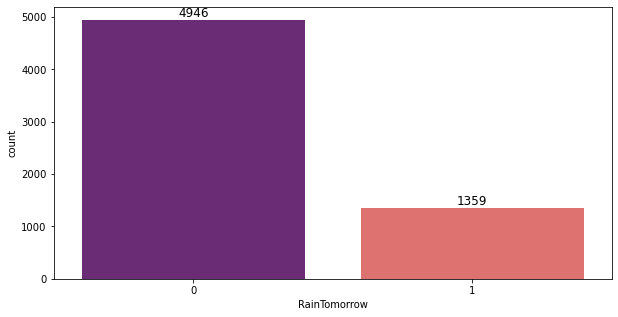

In [641]:
# Checking the count of feature 'RainTomorrow' 

plt.figure(figsize=(10,5))
ct = sns.countplot(y2,palette='magma')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

In [642]:
# Importing SMOTE from imblearn

from imblearn.over_sampling import SMOTE

In [643]:
# Applying SMOTE technique 

smt = SMOTE()

x3,y3 = smt.fit_resample(x2,y2)

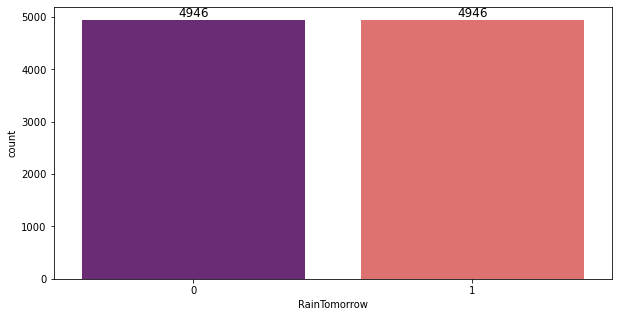

In [644]:
# Checking the count of feature 'RainTomorrow' after applying 'SMOTE'

plt.figure(figsize=(10,5))
ct = sns.countplot(y3,palette='magma')
for i in ct.containers:
    ct.bar_label(i,fontsize=12)

### Observations

Target variable RainTomorrow is imbalanced with 'No' - 4946 and 'Yes' 1359

Applied SMOTE technique to balance the target variable and above countplot shows target variable is balanced with equal
numbers

## Model Evaluation

In [645]:
# Checking the dimension of the data 

x3.shape

(9892, 20)

In [646]:
# Checking the dimension of the data 

y3.shape

(9892,)

In [647]:
# Importing required libraries

from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report

## Finding Random State

In [648]:
maxAcc = 0
maxRS = 0

for i in range(1,200):
    x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.30,random_state=i)
    rf = RandomForestClassifier()
    rf.fit(x3_train,y3_train)
    predrf = rf.predict(x3_test)
    acc = accuracy_score(y3_test,predrf)
    if acc > maxAcc:
        maxAcc = acc
        maxRS = i
print("Max Accuracy Score is",maxAcc*100,"on Random State",maxRS)

Max Accuracy Score is 90.66711590296495 on Random State 150


## Train and Test Split

In [649]:
# Training the Model with .30 as test size and random state at 150

x3_train,x3_test,y3_train,y3_test = train_test_split(x3,y3,test_size=.30, random_state=150)

In [650]:
# Importing Required libraries

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.tree import ExtraTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import GridSearchCV

## GaussianNB

In [651]:
GB = GaussianNB()
GB.fit(x3_train,y3_train)
print(GB.score(x3_train,y3_train))
GB_predict = GB.predict(x3_test)
cr1 = cross_val_score(GB,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GB_predict)*100)
print('CV score of GaussianNB:',cr1.mean()*100)
print(confusion_matrix(y3_test,GB_predict))
print(classification_report(y3_test,GB_predict))

0.7448006932409013
Accuracy Score: 76.51617250673854
CV score of GaussianNB: 72.01814195667247
[[1114  355]
 [ 342 1157]]
              precision    recall  f1-score   support

           0       0.77      0.76      0.76      1469
           1       0.77      0.77      0.77      1499

    accuracy                           0.77      2968
   macro avg       0.77      0.77      0.77      2968
weighted avg       0.77      0.77      0.77      2968



## LogisticRegression

In [652]:
LR = LogisticRegression()
LR.fit(x3_train,y3_train)
print(LR.score(x3_train,y3_train))
LR_predict = LR.predict(x3_test)
cr2 = cross_val_score(LR,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,LR_predict)*100)
print('CV score of LogisticRegression:',cr2.mean()*100)
print(confusion_matrix(y3_test,LR_predict))
print(classification_report(y3_test,LR_predict))

0.792316580011554
Accuracy Score: 79.81805929919138
CV score of LogisticRegression: 73.1105577215975
[[1191  278]
 [ 321 1178]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1469
           1       0.81      0.79      0.80      1499

    accuracy                           0.80      2968
   macro avg       0.80      0.80      0.80      2968
weighted avg       0.80      0.80      0.80      2968



## SVC

In [653]:
SV = SVC(probability=True)
SV.fit(x3_train,y3_train)
print(SV.score(x3_train,y3_train))
SV_predict = SV.predict(x3_test)
cr3 = cross_val_score(SV,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,SV_predict)*100)
print('CV score of SVC:',cr3.mean()*100)
print(confusion_matrix(y3_test,SV_predict))
print(classification_report(y3_test,SV_predict))

0.8112362796071635
Accuracy Score: 81.40161725067385
CV score of SVC: 71.61434700349628
[[1171  298]
 [ 254 1245]]
              precision    recall  f1-score   support

           0       0.82      0.80      0.81      1469
           1       0.81      0.83      0.82      1499

    accuracy                           0.81      2968
   macro avg       0.81      0.81      0.81      2968
weighted avg       0.81      0.81      0.81      2968



## RandomForestClassifier

In [654]:
RFC = RandomForestClassifier()
RFC.fit(x3_train,y3_train)
print(RFC.score(x3_train,y3_train))
RFC_predict = RFC.predict(x3_test)
cr4 = cross_val_score(RFC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,RFC_predict)*100)
print('CV score of RandomForestClassifier:',cr4.mean()*100)
print(confusion_matrix(y3_test,RFC_predict))
print(classification_report(y3_test,RFC_predict))

0.9998555748122473
Accuracy Score: 90.19541778975741
CV score of RandomForestClassifier: 70.73561577555229
[[1319  150]
 [ 141 1358]]
              precision    recall  f1-score   support

           0       0.90      0.90      0.90      1469
           1       0.90      0.91      0.90      1499

    accuracy                           0.90      2968
   macro avg       0.90      0.90      0.90      2968
weighted avg       0.90      0.90      0.90      2968



## ExtraTreeClassifier

In [655]:
ET = ExtraTreeClassifier()
ET.fit(x3_train,y3_train)
print(ET.score(x3_train,y3_train))
ET_predict = ET.predict(x3_test)
cr5 = cross_val_score(ET,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,ET_predict)*100)
print('CV score of ExtraTreeClassifier:',cr5.mean()*100)
print(confusion_matrix(y3_test,ET_predict))
print(classification_report(y3_test,ET_predict))

1.0
Accuracy Score: 80.25606469002695
CV score of ExtraTreeClassifier: 67.08609765530997
[[1156  313]
 [ 273 1226]]
              precision    recall  f1-score   support

           0       0.81      0.79      0.80      1469
           1       0.80      0.82      0.81      1499

    accuracy                           0.80      2968
   macro avg       0.80      0.80      0.80      2968
weighted avg       0.80      0.80      0.80      2968



## DecisionTreeClassifier

In [656]:
DTC = DecisionTreeClassifier()
DTC.fit(x3_train,y3_train)
print(DTC.score(x3_train,y3_train))
DTC_predict = DTC.predict(x3_test)
cr6 = cross_val_score(DTC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,DTC_predict)*100)
print('CV score of DecisionTreeClassifier:',cr6.mean()*100)
print(confusion_matrix(y3_test,DTC_predict))
print(classification_report(y3_test,DTC_predict))

1.0
Accuracy Score: 83.25471698113208
CV score of DecisionTreeClassifier: 68.85508659938453
[[1198  271]
 [ 226 1273]]
              precision    recall  f1-score   support

           0       0.84      0.82      0.83      1469
           1       0.82      0.85      0.84      1499

    accuracy                           0.83      2968
   macro avg       0.83      0.83      0.83      2968
weighted avg       0.83      0.83      0.83      2968



## KNeighborsClassifier

In [657]:
KNC = KNeighborsClassifier()
KNC.fit(x3_train,y3_train)
print(KNC.score(x3_train,y3_train))
KNC_predict = KNC.predict(x3_test)
cr7 = cross_val_score(KNC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,KNC_predict)*100)
print('CV score of KNeighborsClassifier:',cr7.mean()*100)
print(confusion_matrix(y3_test,KNC_predict))
print(classification_report(y3_test,KNC_predict))

0.8733391103408434
Accuracy Score: 83.92857142857143
CV score of KNeighborsClassifier: 69.734456484697
[[1076  393]
 [  84 1415]]
              precision    recall  f1-score   support

           0       0.93      0.73      0.82      1469
           1       0.78      0.94      0.86      1499

    accuracy                           0.84      2968
   macro avg       0.86      0.84      0.84      2968
weighted avg       0.85      0.84      0.84      2968



## GradientBoostingClassifier

In [658]:
GBC = GradientBoostingClassifier()
GBC.fit(x3_train,y3_train)
print(GBC.score(x3_train,y3_train))
GBC_predict = GBC.predict(x3_test)
cr8 = cross_val_score(GBC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,GBC_predict)*100)
print('CV score of GradientBoostingClassifier:',cr8.mean()*100)
print(confusion_matrix(y3_test,GBC_predict))
print(classification_report(y3_test,GBC_predict))

0.8791161178509532
Accuracy Score: 87.56738544474393
CV score of GradientBoostingClassifier: 64.97364388771689
[[1296  173]
 [ 196 1303]]
              precision    recall  f1-score   support

           0       0.87      0.88      0.88      1469
           1       0.88      0.87      0.88      1499

    accuracy                           0.88      2968
   macro avg       0.88      0.88      0.88      2968
weighted avg       0.88      0.88      0.88      2968



## AdaBoostClassifier

In [659]:
ABC = AdaBoostClassifier()
ABC.fit(x3_train,y3_train)
print(ABC.score(x3_train,y3_train))
ABC_predict = ABC.predict(x3_test)
cr9 = cross_val_score(ABC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,ABC_predict)*100)
print('CV score of AdaBoostClassifier:',cr9.mean()*100)
print(confusion_matrix(y3_test,ABC_predict))
print(classification_report(y3_test,ABC_predict))

0.8434430964760254
Accuracy Score: 85.5121293800539
CV score of AdaBoostClassifier: 64.89251396488201
[[1250  219]
 [ 211 1288]]
              precision    recall  f1-score   support

           0       0.86      0.85      0.85      1469
           1       0.85      0.86      0.86      1499

    accuracy                           0.86      2968
   macro avg       0.86      0.86      0.86      2968
weighted avg       0.86      0.86      0.86      2968



## BaggingClassifier

In [660]:
BC = BaggingClassifier()
BC.fit(x3_train,y3_train)
print(BC.score(x3_train,y3_train))
BC_predict = BC.predict(x3_test)
cr10 = cross_val_score(BC,x3,y3,cv=5)

    
print('Accuracy Score:',accuracy_score(y3_test,BC_predict)*100)
print('CV score of BaggingClassifier:',cr10.mean()*100)
print(confusion_matrix(y3_test,BC_predict))
print(classification_report(y3_test,BC_predict))

0.99263431542461
Accuracy Score: 88.67924528301887
CV score of BaggingClassifier: 69.09883912527444
[[1328  141]
 [ 195 1304]]
              precision    recall  f1-score   support

           0       0.87      0.90      0.89      1469
           1       0.90      0.87      0.89      1499

    accuracy                           0.89      2968
   macro avg       0.89      0.89      0.89      2968
weighted avg       0.89      0.89      0.89      2968



## AUC_ROC_CURVE - Area under the Curve Receiver Operating Characteristic

In [661]:
from sklearn.metrics import roc_curve
from sklearn.metrics import roc_auc_score

GaussianNB() 0.7650934523628413
LogisticRegression() 0.7983064271120616
RandomForestClassifier() 0.9019135062131277
ExtraTreeClassifier() 0.8024042349994165
DecisionTreeClassifier() 0.8323767921523357
KNeighborsClassifier() 0.8382168552577144
GradientBoostingClassifier() 0.8757394877728787
AdaBoostClassifier() 0.8550792427536215
BaggingClassifier() 0.8869648065808338
SVC(probability=True) 0.813847307326736


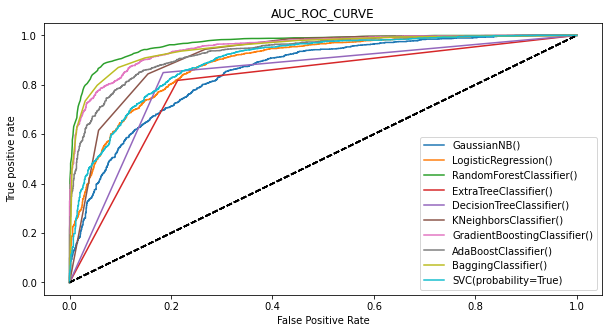

In [662]:
model = [GB,LR,RFC,ET,DTC,KNC,GBC,ABC,BC,SV]
auc=[]

plt.figure(figsize=(10,5))
for i in model:
    y_pred_prob = i.predict_proba(x3_test)[:,1]
    fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob,pos_label=True)
    plt.plot(fpr,tpr,label=i )
    plt.plot([0,1],[0,1],'k--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True positive rate')
    plt.title('AUC_ROC_CURVE')
    plt.legend()

for j in model:
    auc_score = roc_auc_score(y3_test,j.predict(x3_test))
    auc.append(auc_score)
    print(j,auc_score)

### Observations

Based on Model evaluation Random Forest Classifier, Support Vector Classifer and Logistic Regression are performing well 
based on their r2_score, CV score and AUC_ROC_Score

Proceeding to Hyper Parameter Tuning for the above mentioned model

## Hyper Parameter Tuning

### Hyper Parameter Tuning - RandomForestClassifier

In [663]:
grid_params={'n_estimators':[50,100,150,200],'criterion':['gini','entropy','log_loss'],
            'max_depth':[5,10,20,50],'min_samples_split':[2,4,5],'max_features':['sqrt','log2']}
             
        
gs = GridSearchCV(RandomForestClassifier(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=RandomForestClassifier(),
             param_grid={'criterion': ['gini', 'entropy', 'log_loss'],
                         'max_depth': [5, 10, 20, 50],
                         'max_features': ['sqrt', 'log2'],
                         'min_samples_split': [2, 4, 5],
                         'n_estimators': [50, 100, 150, 200]})
Best Score 0.8876365267836647
Best Params {'criterion': 'entropy', 'max_depth': 50, 'max_features': 'log2', 'min_samples_split': 5, 'n_estimators': 200}


In [664]:
# Applying parameters for RandomForestClassifier

Final_Model1 = RandomForestClassifier(criterion ='entropy',max_depth = 50,max_features ='log2',
                                      min_samples_split=5, n_estimators=200)
                                       
Final_Model1.fit(x3_train,y3_train)
pred1 = Final_Model1.predict(x3_test)
print(Final_Model1.score(x3_train,y3_train))
cr_v1= cross_val_score(Final_Model1,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred1)*100)
print('CV score of RandomForestClassifier:',cr_v1.mean()*100)
print(confusion_matrix(y3_test,pred1))
print(classification_report(y3_test,pred1))

0.9989890236857308
Accuracy_score 90.39757412398922
CV score of RandomForestClassifier: 71.01866872126999
[[1319  150]
 [ 135 1364]]
              precision    recall  f1-score   support

           0       0.91      0.90      0.90      1469
           1       0.90      0.91      0.91      1499

    accuracy                           0.90      2968
   macro avg       0.90      0.90      0.90      2968
weighted avg       0.90      0.90      0.90      2968



### Hyper Parameter Tuning - SVC

In [665]:
grid_params={'kernel':['linear','rbf'],'gamma':['scale','auto'],
            'C':[1.0,1.5],'class_weight':['balanced','None']}
             
        
gs = GridSearchCV(SVC(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=SVC(),
             param_grid={'C': [1.0, 1.5], 'class_weight': ['balanced', 'None'],
                         'gamma': ['scale', 'auto'],
                         'kernel': ['linear', 'rbf']})
Best Score 0.8902369524842971
Best Params {'C': 1.5, 'class_weight': 'balanced', 'gamma': 'auto', 'kernel': 'rbf'}


In [666]:
# Applying parameters for SVC

Final_Model2 = SVC(C =1.5,class_weight = 'balanced',gamma ='auto',kernel='rbf',probability=True)
                                       
Final_Model2.fit(x3_train,y3_train)
pred2 = Final_Model2.predict(x3_test)
print(Final_Model2.score(x3_train,y3_train))
cr_v2= cross_val_score(Final_Model2,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred2)*100)
print('CV score of SVC:',cr_v2.mean()*100)
print(confusion_matrix(y3_test,pred2))
print(classification_report(y3_test,pred2))

0.9901790872328134
Accuracy_score 92.75606469002695
CV score of SVC: 83.85691315945844
[[1315  154]
 [  61 1438]]
              precision    recall  f1-score   support

           0       0.96      0.90      0.92      1469
           1       0.90      0.96      0.93      1499

    accuracy                           0.93      2968
   macro avg       0.93      0.93      0.93      2968
weighted avg       0.93      0.93      0.93      2968



### Hyper Parameter Tuning - LogisticRegression

In [667]:
grid_params={'penalty':['l1','l2','elasticnet',None],
             'solver':['lbfgs','liblinear','newton-cg','newton-cholesky','sag','saga'],
            'C':[0.1,1.0,1.5,2.0],'class_weight':['balanced',None]}
             
        
gs = GridSearchCV(LogisticRegression(),param_grid=grid_params)

g_res = gs.fit(x3_train,y3_train)
print(g_res)
print('Best Score',g_res.best_score_)
print('Best Params',g_res.best_params_)

GridSearchCV(estimator=LogisticRegression(),
             param_grid={'C': [0.1, 1.0, 1.5, 2.0],
                         'class_weight': ['balanced', None],
                         'penalty': ['l1', 'l2', 'elasticnet', None],
                         'solver': ['lbfgs', 'liblinear', 'newton-cg',
                                    'newton-cholesky', 'sag', 'saga']})
Best Score 0.7911598255462114
Best Params {'C': 0.1, 'class_weight': None, 'penalty': 'l1', 'solver': 'liblinear'}


In [669]:
# Applying parameters for LogisticRegression

Final_Model3 = LogisticRegression(C=0.1,class_weight = None,penalty ='l1',
                                      solver='liblinear')
                                       
Final_Model3.fit(x3_train,y3_train)
pred3 = Final_Model3.predict(x3_test)
print(Final_Model3.score(x3_train,y3_train))
cr_v3= cross_val_score(Final_Model3,x3,y3,cv=5)

print('Accuracy_score',accuracy_score(y3_test,pred3)*100)
print('CV score of LogisticRegression:',cr_v3.mean()*100)
print(confusion_matrix(y3_test,pred3))
print(classification_report(y3_test,pred3))

0.792316580011554
Accuracy_score 79.71698113207547
CV score of LogisticRegression: 73.39355957472573
[[1187  282]
 [ 320 1179]]
              precision    recall  f1-score   support

           0       0.79      0.81      0.80      1469
           1       0.81      0.79      0.80      1499

    accuracy                           0.80      2968
   macro avg       0.80      0.80      0.80      2968
weighted avg       0.80      0.80      0.80      2968



## AUC_ROC_Curve_Final Model

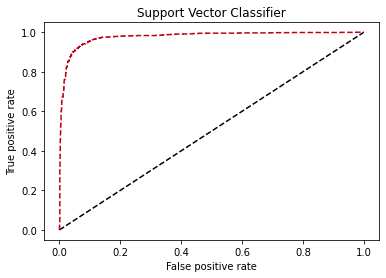

0.9272364921293116

In [679]:
# Checking roc_auc_score for SVC

y_pred_prob_SV = Final_Model2.predict_proba(x3_test)[:,1]
fpr,tpr,thresholds = roc_curve(y3_test,y_pred_prob_SV,pos_label=True)
plt.plot([0,1],[0,1],'k--')
plt.plot(fpr,tpr,label='SVC',linestyle='--',color='#be0119')
plt.xlabel('False positive rate')
plt.ylabel('True positive rate')
plt.title('Support Vector Classifier')
plt.show()
auc_score = roc_auc_score(y3_test,Final_Model2.predict(x3_test))
auc_score

## Saving the Final Model

In [680]:
# Saving the model using .pkl

import joblib

joblib.dump(Final_Model2,"Rainfall_Weather_Forecasting_Class.pkl")

['Rainfall_Weather_Forecasting_Class.pkl']

## Predicting the Model

In [681]:
# Loading the saved model

Model=joblib.load("Rainfall_Weather_Forecasting_Class.pkl")

#Prediction
prediction = Model.predict(x3_test)
prediction

array([0, 0, 0, ..., 0, 0, 1])

In [682]:
pd.set_option('display.max_rows',None)
pd.DataFrame([Model.predict(x3_test)[:],y3_test[:]],index=["Predicted","Original"]).T

Predicted  Original
0             0         0
1             0         1
2             0         0
3             0         0
4             0         0
5             0         0
6             0         1
7             1         1
8             1         1
9             0         0
10            0         0
11            1         1
12            1         1
13            0         0
14            1         1
15            0         0
16            1         1
17            0         1
18            1         1
19            1         1
20            0         0
21            0         0
22            1         1
23            0         0
24            0         0
25            1         1
26            0         0
27            1         1
28            1         1
29            0         0
30            1         1
31            0         0
32            0         0
33            1         1
34            1         1
35            1         1
36            0         0
37            0         0
38            1         1
39            0         0
40            0         0
41            0         0
42            0         0
43            1         1
44            1         1
45            1         1
46            1         1
47            1         1
48            1         1
49            0         0
50            1         1
51            1         1
52            1         1
53            0         0
54            1         1
55            0         0
56            1         1
57            1         1
58            1         1
59            1         1
60            0         0
61            0         0
62            1         1
63            0         0
64            1         1
65            0         0
66            0         0
67            0         0
68            1         0
69            0         0
70            1         0
71            0         0
72            0         0
73            1         1
74            1         1
75            0         0
76            0         0
77            1         1
78            0         0
79            0         0
80            1         1
81            1         1
82            0         0
83            0         0
84            0         0
85            1         1
86            0         0
87            1         1
88            1         0
89            1         1
90            1         1
91            1         1
92            1         1
93            0         0
94            1         1
95            1         1
96            0         0
97            0         0
98            0         1
99            0         0
100           0         0
101           0         0
102           1         1
103           1         1
104           1         1
105           1         1
106           1         1
107           0         0
108           1         1
109           0         0
110           1         1
111           0         0
112           1         1
113           0         0
114           0         0
115           0         0
116           0         0
117           1         1
118           0         0
119           0         0
120           1         0
121           1         1
122           0         0
123           0         0
124           1         1
125           0         1
126           1         0
127           0         0
128           0         0
129           0         0
130           1         1
131           1         1
132           0         0
133           1         1
134           0         0
135           1         1
136           0         0
137           0         0
138           1         1
139           1         1
140           1         0
141           1         1
142           1         1
143           1         0
144           0         0
145           0         0
146           1         1
147           0         0
148           1         1
149           1         0
150           1         1
151           0         0
152           0         0
15

## Conclusion for Classification model

Concluding Support Vector Classifier as the best fit model for Classification based on 
Accuracy_score 93% vs CV_Score 84% vs AUC_ROC_Score 92%  and below classification report which is better than other Model. 

                precision    recall  f1-score   support

           0       0.96      0.90      0.92      1469
           1       0.90      0.96      0.93      1499

    accuracy                           0.93      2968
    
    macroavg       0.93      0.93      0.93      2968
    
weighted avg       0.93      0.93      0.93      2968

# Final Conclusion

## Summary for Data Analysis

Dataset contains 8425 rows and 23 columns

From 2008 to 2017, we can observe Rainfall over 100 mm was recorded 11 times and highest Rainfall was recorded with 371 mm

Most of the occurrence is recorded as No Rainfall for Rain Today and Rain Tomorrow

Weather report was maximum documented in the year 2011 with 1468 occurrences, followed by 2010 with 1443 and 2009 with 1238 occurrences

From 2008 to 2017 weather reports are maximum recorded during 2nd quarter of the year followed by 1st , 4th and 3rd 
quarter of the year with June and May has the highest count

When we compare Location Vs Rainfall, we can observe CoffsHarbour has recorded highest rainfall from 2008 to 2017, 
followed by Williamtown and Wollongong

Rainfall in mm is increased when WindGustSpeed increases, also we can observe Rainfall is high when WindGustSpeed 
is between 50km/h to 100km/h 

We can observe Rainfall in mm is maximum registered in the year 2016, followed by 2015 and 2009

Rainfall is registered high in the month of April, followed by November and February

Humidity at 9am and 3pm are mostly between 70 to 100, when there is Rainfall the next day

Pressure at 9am and 3pm are mostly between 1000 to 1030, when there is Rainfall the next day and Rainfall in mm is also high

Chances of Rain Tomorrow is high, when Min Temp is between 5 to 25 and Max Temp is between 10 to 35 

## Summary for Model Evaluation

Data types present in the dataset are float64 – 16 and object – 7

1663 Duplicate rows were present in the dataset, which has been dropped

Splitted the feature 'Date' into 'Year', 'Month' and 'Day'

Null values present in the dataset were replaced by Mean, Median and Most_Frequent based on the skewness of the 
feature, which
helped in improving the performance of the Model

Outliers are handled by Zscore method and Encoded Categorical columns to numerical by Label Encoder
Tried applying One Hot Encoder but no significant changes in performance of the Model, hence kept Label encoder

Skewness was high in features Evaporation, Sunshine, WindSpeed9am and Rainfall

Used 'sqrt', 'cbrt' and PowerTransformer(method='yeo-johnson') to reduce skewness in features

For Rainfall as it is the target variable, tried not to apply transformation methods but the performance of 
the Model is very poor, hence applied PowerTransformer(method='yeo-johnson') to reduce skewness and performance improved

Applied standard scaler method to standardize the features, but VIF was still high in features 
'Temp3pm', 'Pressure9am', 'Temp9am', 'MaxTemp' and 'Pressure3pm'

Dropped features 'Temp3pm', 'Pressure9am' and 'Temp9am' one by one to reduce VIF

Before dropping the features tried PCA method but there was no much improvement, hence dropped those features
and performance of the Model improved

Based on Model evaluation and Hyper Parameter Tuning Gradient Boosting Regressor and Support Vector Classifier 
performed well

Concluded Gradient Boosting Regressor as the best fit model to predict 'Rainfall' based on r2_score 88% vs 
CV_Score 87% with MSE: 0.005052886432718704, MAE: 0.043254044654329 and RMSE: 0.07108365798633821 which is better 
than other Model for Regression
        
For Classification, Support Vector Classifier is the best fit model to predict 'RainTomorrow' based on 
Accuracy_score 93% vs CV_Score 84% vs AUC_ROC_Score 92% and below classification report which is better than other Model.

                precision    recall  f1-score   support

           0       0.96      0.90      0.92      1469
           1       0.90      0.96      0.93      1499

    accuracy                           0.93      2968

    macroavg       0.93      0.93      0.93      2968

    weighted avg   0.93      0.93      0.93      2968

Finally, when we compare Predicted Vs Original we can observe Gradient Boosting Regressor and Support Vector Classifier
are performing well with Rainfall Weather Forecasting Dataset and prediction is same with original

We can use the above model for production in prediciting Rainfall 

Thank you for Providing the opportunity to work on the Rainfall Weather Forecasting dataset